In [6]:
from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType
from pyspark.sql.types import LongType
from pyspark.sql.types import FloatType
from pyspark.rdd import RDD
from pyspark.sql.types import StringType
from pyspark.sql.functions import col
import pyspark.sql.functions as F
import csv
from datetime import datetime
from functools import reduce
import pandas as pd
import matplotlib.pyplot as plt
# local[*]: run Spark in local-mode(parallel computing) with as many working processors as logical cores on your machine
master = "local[*]"
# The `appName` field is a name to be shown on the Spark cluster UI page
app_name = "Big data Analysis of Road Crash Data"
# Setup configuration parameters for Spark
spark_conf = SparkConf().setMaster(master).setAppName(app_name)
# creating a SparkContext object 
spark = SparkSession.builder.config(conf=spark_conf).getOrCreate()
sc = spark.sparkContext
sc.setLogLevel('ERROR')

In [10]:
spark

# Uploading csv files to be read by Apache spark 

In [2]:
Accident_Information_df = spark.read.format('csv')\
            .option('header',True).option('escape','"')\
            .load('/Users/Asfandyar/Downloads/archive/Accident_Information.csv')
# changing the type of column("Year'") to interger type
Accident_Information_df = Accident_Information_df.withColumn('Year',F.col('Year').cast(IntegerType()))
#Accident_Information_df=Accident_Information_df.filter(Accident_Information_df.Year<2017)
Accident_Information_df.sort("Year").show(truncate=False)
Accident_Information_df
A2019 = spark.read.format('csv')\
            .option('header',True).option('escape','"')\
            .load('/Users/Asfandyar/Downloads/Road Safety Data - Accidents 2019.csv')
# changing the type of column("Year'") to interger type
A2019 = A2019.withColumn('Year',F.col('Year').cast(IntegerType()))
A2018 = spark.read.format('csv')\
            .option('header',True).option('escape','"')\
            .load('/Users/Asfandyar/Downloads/dftRoadSafetyData_Accidents_2018.csv')
# changing the type of column("Year'") to interger type
A2018 = A2018.withColumn('Year',F.col('Year').cast(IntegerType()))
#A2005 = spark.read.format('csv')\
#            .option('header',True).option('escape','"')\
#            .load('/Users/Asfandyar/Downloads/Stats19_Data_2005-2014/Accidents0514.csv')
#A2005=A2005.withColumn('year', concat(A2005.Accident_Index.substr(1, 4)))

# changing the type of column("Year'") to interger type
#A2005 = A2005.withColumn('Year',F.col('Year').cast(IntegerType())) 

A2018 = A2018.union(A2019)
#A2018 = A2018.union(A2005)

+--------------+--------------+---------------+--------------+---------------+-----------------+-------------------+----------+-----------+-------------------------------------------+----------------------------+-----------------------------------+---------+---------------------------+--------------------------+-------------------------+---------------------+----------------------+---------+-------------------------+--------------------+------------------+---------------------------------+---------------------------------------+-------------------+-----------------------+------------------+--------------------------+-----------+-----+-------------------+---------------------+----+----------+
|Accident_Index|1st_Road_Class|1st_Road_Number|2nd_Road_Class|2nd_Road_Number|Accident_Severity|Carriageway_Hazards|Date      |Day_of_Week|Did_Police_Officer_Attend_Scene_of_Accident|Junction_Control            |Junction_Detail                    |Latitude |Light_Conditions           |Local_Authori

In [3]:
from pyspark.sql.functions import col, when
valueWhenTrue1 ="M"
valueWhenTrue2 ="A"
valueWhenTrue3 = "A"
valueWhenTrue4 = "B"
valueWhenTrue5 = "C"
valueWhenTrue6 = "U"

A2018=A2018.withColumn(
    "Accident_Severity",
    when(
        col("Accident_Severity") == 1,
        "Fatal"
    ).
    when(
        col("Accident_Severity") == 2,
        "Serious"
    ).
    when(
        col("Accident_Severity") == 3,
        "Slight"
    ).otherwise(col("Accident_Severity")),
)
A2018=A2018.withColumn(
    "1st_Road_Class",
    when(
        col("1st_Road_Class") == 1,
        "M"
    ).otherwise(col("1st_Road_Class")),
)
A2018=A2018.withColumn(
    "1st_Road_Class",
    when(
        col("1st_Road_Class") == 2,
        "A"
    ).otherwise(col("1st_Road_Class")),
)
A2018=A2018.withColumn(
    "1st_Road_Class",
    when(
        col("1st_Road_Class") == 3,
        "A"
    ).otherwise(col("1st_Road_Class")),
)
A2018=A2018.withColumn(
    "1st_Road_Class",
    when(
        col("1st_Road_Class") == 4,
        "B"
    ).otherwise(col("1st_Road_Class")),
)
A2018=A2018.withColumn(
    "1st_Road_Class",
    when(
        col("1st_Road_Class") == 5,
        "C"
    ).otherwise(col("1st_Road_Class")),
)
A2018=A2018.withColumn(
    "1st_Road_Class",
    when(
        col("1st_Road_Class") == 6,
        "U"
    ).otherwise(col("1st_Road_Class")),
)
A2018=A2018.withColumn(
    "Day_of_Week",
    when(
        col("Day_of_Week") == 1,
        "Monday"
    ).
    when(
        col("Day_of_Week") == 2,
        "Tuesday"
    ).
    when(
        col("Day_of_Week") == 3,
        "Wednesday"
    ).
    when(
        col("Day_of_Week") == 4,
        "Thursday"
    ).
    when(
        col("Day_of_Week") == 5,
        "Friday"
    ).
    when(
        col("Day_of_Week") == 6,
        "Saturday"
    ).
    when(
        col("Day_of_Week") == 7,
        "Sunday"
    ).otherwise(col("Day_of_Week")),
)
A2018=A2018.withColumn(
    "Accident_Severity",
    when(
        col("Accident_Severity") == 1,
        "Fatal"
    ).
    when(
        col("Accident_Severity") == 2,
        "Serious"
    ).
    when(
        col("Accident_Severity") == 3,
        "Slight"
    ).otherwise(col("Accident_Severity")),
)

Accident_Information_df=Accident_Information_df.drop("InScotland")
Accident_Information20052019_df = Accident_Information_df.unionByName(A2018)

In [4]:
Accident_Information20052019_df.show()

+--------------+--------------+---------------+--------------+---------------+-----------------+-------------------+----------+-----------+-------------------------------------------+--------------------+--------------------+---------+--------------------+--------------------------+-------------------------+---------------------+----------------------+---------+-------------------------+--------------------+------------------+---------------------------------+---------------------------------------+-------------------+-----------------------+------------------+--------------------------+-----------+-----+-------------------+--------------------+----+
|Accident_Index|1st_Road_Class|1st_Road_Number|2nd_Road_Class|2nd_Road_Number|Accident_Severity|Carriageway_Hazards|      Date|Day_of_Week|Did_Police_Officer_Attend_Scene_of_Accident|    Junction_Control|     Junction_Detail| Latitude|    Light_Conditions|Local_Authority_(District)|Local_Authority_(Highway)|Location_Easting_OSGR|Location_N

In [5]:
YearAccident_df = Accident_Information20052019_df.groupby('Year').agg(F.count(Accident_Information20052019_df.Accident_Index).alias('Total accidents'))
YearAccident_df=YearAccident_df.sort("Year")
YearAccident_df.show()

+----+---------------+
|Year|Total accidents|
+----+---------------+
|2005|         198735|
|2006|         189161|
|2007|         182115|
|2008|         170591|
|2009|         163554|
|2010|         154414|
|2011|         151474|
|2012|         145571|
|2013|         138660|
|2014|         146322|
|2015|         140056|
|2016|         136621|
|2017|         129982|
|2018|         122635|
|2019|         117536|
+----+---------------+



In [ ]:
YearAccident_df_df=YearAccident_df.toPandas()
YearAccident_df_df

# Uploading data set of vechile miles traveled yearly


In [6]:
Billionvehiclemiles_df = spark.read.format('csv')\
            .option('header',True).option('escape','"')\
            .load('/Users/Asfandyar/Downloads/archive/Billionvehiclemiles.csv')
Billionvehiclemiles_df.show(3)
Billionvehiclemiles_df = Billionvehiclemiles_df.withColumn('Year',F.col('Year').cast(IntegerType()))
Billionvehiclemiles2005_df=Billionvehiclemiles_df.filter(Billionvehiclemiles_df.Year>2004)
Billionvehiclemiles20052017_df=Billionvehiclemiles2005_df.filter(Billionvehiclemiles2005_df.Year<2020)
#Billionvehiclemiles20052017_df.show()
Milesoveryear = Billionvehiclemiles20052017_df.groupby('Year','All motor vehicles').agg(F.count(Billionvehiclemiles20052017_df['All motor vehicles']).alias('All_motor vehicles'))
Milesoveryear=Milesoveryear.drop("All_motor vehicles")
Milesoveryear.sort(col('Year').desc()).show()


+----+--------------+---------------------------+----------------------+-----------+---------------+-------+------------------+-----------+
|Year|Cars and Taxis|Light Commercial,Vehicles 1|Heavy Goods Vehicles 2|Motorcycles|Buses & Coaches|Total 3|All motor vehicles|Pedal Cycle|
+----+--------------+---------------------------+----------------------+-----------+---------------+-------+------------------+-----------+
|1949|          12.6|                          4|                   7.8|        1.9|            2.5|    4.5|              28.9|       null|
|1950|          15.9|                        4.8|                     7|        2.7|            2.5|    5.3|                33|       null|
|1951|          18.2|                        5.1|                   7.3|        3.5|            2.6|    6.1|              36.7|       null|
+----+--------------+---------------------------+----------------------+-----------+---------------+-------+------------------+-----------+
only showing top 3 r

+----+------------------+
|Year|All motor vehicles|
+----+------------------+
|2019|             356.5|
|2018|             349.5|
|2017|             345.2|
|2016|             338.2|
|2015|             329.6|
|2014|             322.2|
|2013|             311.9|
|2012|               309|
|2011|             308.2|
|2010|             305.8|
|2009|             308.1|
|2008|               311|
|2007|             314.1|
|2006|             311.4|
|2005|             306.9|
+----+------------------+



In [8]:
YearAccident_df_df=YearAccident_df.toPandas()
Milesoveryear_df=Milesoveryear.toPandas()
Normalizedaccidents=pd.merge(YearAccident_df_df, Milesoveryear_df, on='Year')
Normalizedaccidents_sparkDF=spark.createDataFrame(Normalizedaccidents) 
Normalizedaccidents_sparkDF=Normalizedaccidents_sparkDF.withColumn('Accident_prob_overyear', Normalizedaccidents_sparkDF[1]/(Normalizedaccidents_sparkDF[2]*1000000000))

Normalizedaccidents_sparkDF.show()


+----+---------------+------------------+----------------------+
|Year|Total accidents|All motor vehicles|Accident_prob_overyear|
+----+---------------+------------------+----------------------+
|2005|         198735|             306.9|  6.475562072336266E-7|
|2006|         189161|             311.4|  6.074534360950545E-7|
|2007|         182115|             314.1|  5.797994269340974E-7|
|2008|         170591|               311|   5.48524115755627E-7|
|2009|         163554|             308.1|  5.308471275559883E-7|
|2010|         154414|             305.8|  5.049509483322433E-7|
|2011|         151474|             308.2|  4.914795587280987E-7|
|2012|         145571|               309|  4.711035598705501...|
|2013|         138660|             311.9|  4.445655658865020...|
|2014|         146322|             322.2|  4.541340782122905E-7|
|2015|         140056|             329.6|  4.249271844660194E-7|
|2016|         136621|             338.2|  4.039651094027203E-7|
|2017|         129982|   

In [9]:
Normalizedaccidents_sparkDFttest=Normalizedaccidents_sparkDF.toPandas()
Normalizedaccidents_sparkDFttest

Year  Total accidents All motor vehicles  Accident_prob_overyear
0   2005           198735              306.9            6.475562e-07
1   2006           189161              311.4            6.074534e-07
2   2007           182115              314.1            5.797994e-07
3   2008           170591                311            5.485241e-07
4   2009           163554              308.1            5.308471e-07
5   2010           154414              305.8            5.049509e-07
6   2011           151474              308.2            4.914796e-07
7   2012           145571                309            4.711036e-07
8   2013           138660              311.9            4.445656e-07
9   2014           146322              322.2            4.541341e-07
10  2015           140056              329.6            4.249272e-07
11  2016           136621              338.2            4.039651e-07
12  2017           129982              345.2            3.765411e-07
13  2018           122635              349.5            3.508870e-07
14  2019           117536              356.5            3.296942e-07

In [14]:
#Normalizedaccidents_sparkDFttest=Normalizedaccidents_sparkDFttest['Accident_prob_overyear']
mu=Normalizedaccidents_sparkDFttest.mean
Normalizedaccidents_sparkDFttest

0     6.475562e-07
1     6.074534e-07
2     5.797994e-07
3     5.485241e-07
4     5.308471e-07
5     5.049509e-07
6     4.914796e-07
7     4.711036e-07
8     4.445656e-07
9     4.541341e-07
10    4.249272e-07
11    4.039651e-07
12    3.765411e-07
13    3.508870e-07
14    3.296942e-07
Name: Accident_prob_overyear, dtype: float64

In [18]:
type(Normalizedaccidents_sparkDFttest[0])

numpy.float64

In [17]:
from scipy.stats import norm
from scipy import stats
#histogram and normal probability plot
sns.distplot(df1['age_of_driver'], fit=norm);
fig = plt.figure()
res = stats.probplot(df1['age_of_driver'], plot=plt)
plt.show()

TypeError: unsupported operand type(s) for -: 'float' and 'method'

In [11]:
A2018

accident_index  accident_year accident_reference  \
0        197901A11AD14           1979          01A11AD14   
1        197901A1BAW34           1979          01A1BAW34   
2        197901A1BFD77           1979          01A1BFD77   
3        197901A1BGC20           1979          01A1BGC20   
4        197901A1BGF95           1979          01A1BGF95   
...                ...            ...                ...   
8602819  2020991027064           2020          991027064   
8602820  2020991029573           2020          991029573   
8602821  2020991030297           2020          991030297   
8602822  2020991030900           2020          991030900   
8602823  2020991032575           2020          991032575   

         location_easting_osgr  location_northing_osgr  longitude   latitude  \
0                          NaN                     NaN        NaN        NaN   
1                     198460.0                894000.0        NaN        NaN   
2                     406380.0                307000.0        NaN        NaN   
3                     281680.0                440000.0        NaN        NaN   
4                     153960.0                795000.0        NaN        NaN   
...                        ...                     ...        ...        ...   
8602819               343034.0                731654.0  -2.926320  56.473539   
8602820               257963.0                658891.0  -4.267565  55.802353   
8602821               383664.0                810646.0  -2.271903  57.186317   
8602822               277161.0                674852.0  -3.968753  55.950940   
8602823               240402.0                681950.0  -4.561040  56.003843   

         police_force  accident_severity  number_of_vehicles  ...  \
0                   1                  3                   2  ...   
1                   1                  3                   1  ...   
2                   1                  3                   2  ...   
3                   1                  3                   2  ...   
4                   1                  2                   2  ...   
...               ...                ...                 ...  ...   
8602819            99                  2                   2  ...   
8602820            99                  3                   1  ...   
8602821            99                  2                   2  ...   
8602822            99                  3                   2  ...   
8602823            99                  3                   1  ...   

         pedestrian_crossing_physical_facilities light_conditions  \
0                                             -1                1   
1                                             -1                4   
2                                             -1                4   
3                                             -1                4   
4                                             -1                4   
...                                          ...              ...   
8602819                                        0                1   
8602820                                        0                1   
8602821                                        0                1   
8602822                                        0                1   
8602823                                        0                1   

         weather_conditions road_surface_conditions  \
0                         8                       1   
1                         8                       3   
2                         8                       3   
3                         8                       3   
4                         3                       3   
...                     ...                     ...   
8602819                   1                       1   
8602820                   1                       1   
8602821                   1                       1   
8602822                   1                       1   
8602823                   1                       1   

       

In [13]:
A2005

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[8602824 rows x 0 columns]

In [12]:
Accident_Information_df = pd.read_csv('/Users/Asfandyar/Downloads/dft-road-casualty-statistics-accident-1979-2020.csv')
# changing the type of column("Year'") to interger type
#Accident_Information_df = Accident_Information_df.withColumn('Year',F.col('Year').cast(IntegerType()))
#Accident_Information_df=Accident_Information_df.filter(Accident_Information_df.Year<2017)
#Accident_Information_df.sort("Year").show(truncate=False)
A2018 = Accident_Information_df



AttributeError: 'DataFrame' object has no attribute 'accident_year'

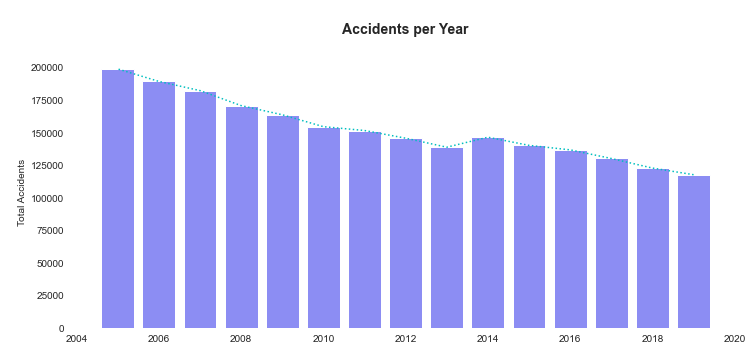

In [36]:
# We import the usuals.
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns
mask = (A2018['accident_year'] > 2004) & (A2018['accident_year'] <= 2019)

accidents=A2018.loc[mask]

# suppressmoccasin all warnings
import warnings
warnings.filterwarnings("ignore")
accidents['date']= pd.to_datetime(accidents['date'], format="%d/%m/%Y")
urban_rural_cmap = ['green','blue']
accidents.accident_severity.value_counts()
yearly_count = accidents['date'].dt.year.value_counts().sort_index(ascending=False)

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,5))

# plot
ax.bar(yearly_count.index, yearly_count.values, color='#8c8df3')
ax.plot(yearly_count, linestyle='dotted', color='c')
ax.set_title('\nAccidents per Year\n', fontsize=14, fontweight='bold')
ax.set(ylabel='\nTotal Accidents')

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);



In [ ]:
\multicolumn{3}{c}\textbf{

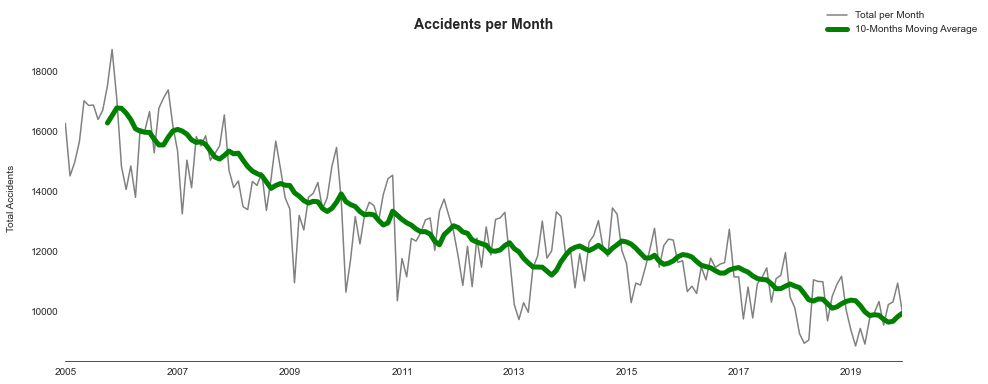

In [35]:
# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(15,6))

# plot
accidents.set_index('date').resample('M').size().plot(label='Total per Month', color='grey', ax=ax)
accidents.set_index('date').resample('M').size().rolling(window=10).mean()\
                           .plot(color='green', linewidth=5, label='10-Months Moving Average', ax=ax)

ax.set_title('Accidents per Month', fontsize=14, fontweight='bold')
ax.set(ylabel='Total Accidents\n', xlabel='')
ax.legend(bbox_to_anchor=(1.1, 1.1), frameon=False)

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=False);

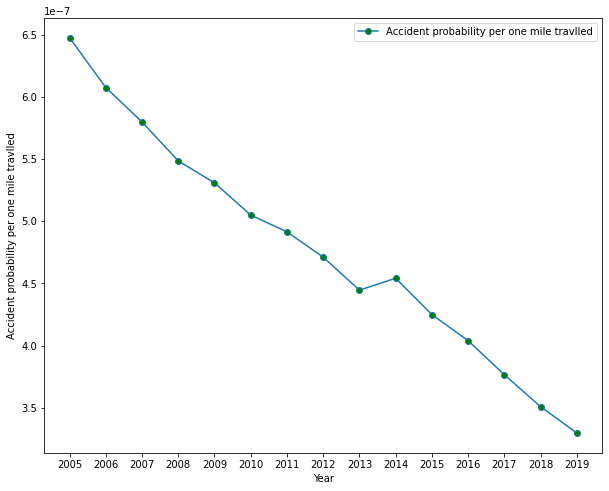

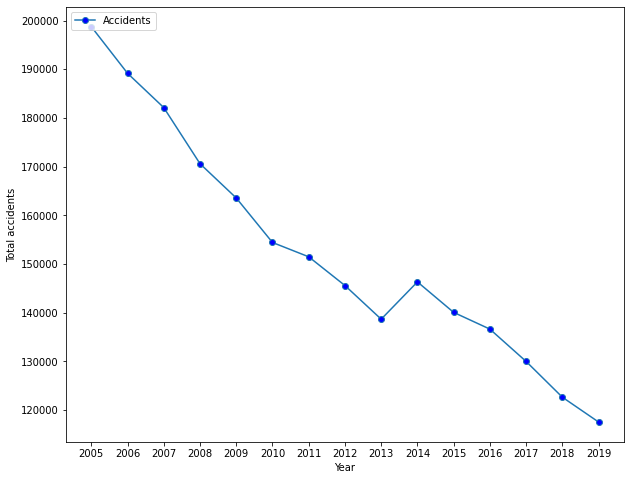

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
y_ans = [val for val in Normalizedaccidents_sparkDF.select('Accident_prob_overyear').collect()]
x_= [val for val in Normalizedaccidents_sparkDF.select('Year').collect()]
plt.plot(x_, y_ans,marker='o', markerfacecolor='green')
plt.ylabel('Accident probability per one mile travlled')
plt.xlabel('Year')
#plt.title('ASN values for time')
plt.legend(['Accident probability per one mile travlled'], loc='upper right')
plt.xticks(x_)
plt.show()
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
y_ans_val = [val for val in YearAccident_df.select('Total accidents').collect()]
x_ts = [val for val in YearAccident_df.select('Year').collect()]
#plt.xticks(x_ts)
plt.plot(x_ts, y_ans_val,marker='o', markerfacecolor='blue')
plt.ylabel('Total accidents')
plt.xlabel('Year')
#plt.title('ASN values for time')
plt.legend(['Accidents'], loc='upper left')
plt.xticks(x_ts)
plt.show()

In [12]:
Normalizedaccidents_sparkDF_df=Normalizedaccidents_sparkDF.toPandas()
Normalizedaccidents_sparkDF_df

Year  Total accidents All motor vehicles  Accident_prob_overyear
0   2005           198735              306.9              647.556207
1   2006           189161              311.4              607.453436
2   2007           182115              314.1              579.799427
3   2008           170591                311              548.524116
4   2009           163554              308.1              530.847128
5   2010           154414              305.8              504.950948
6   2011           151474              308.2              491.479559
7   2012           145571                309              471.103560
8   2013           138660              311.9              444.565566
9   2014           146322              322.2              454.134078
10  2015           140056              329.6              424.927184
11  2016           136621              338.2              403.965109
12  2017           129982              345.2              376.541136
13  2018           122635              349.5              350.886981
14  2019           117536              356.5              329.694250

In [9]:
from pyspark.sql.functions import concat, col, lit

C2017 = spark.read.format('csv')\
            .option('header',True).option('escape','"')\
            .load('/Users/Asfandyar/Downloads/Veh.csv')
# changing the type of column("Year'") to interger type
C2017 = C2017.withColumn('Year',F.col('Year').cast(IntegerType()))
C2018 = spark.read.format('csv')\
            .option('header',True).option('escape','"')\
            .load('/Users/Asfandyar/Downloads/dftRoadSafetyData_Vehicles_2018.csv')
# changing the type of column("Year'") to interger type
C2018 = C2018.withColumn('Year',F.col('Year').cast(IntegerType())) 
C2019 = spark.read.format('csv')\
            .option('header',True).option('escape','"')\
            .load('/Users/Asfandyar/Downloads/Road Safety Data- Vehicles 2019.csv')
# changing the type of column("Year'") to interger type
C2019 = C2019.withColumn('Year',F.col('Year').cast(IntegerType())) 
C2016 = spark.read.format('csv')\
            .option('header',True).option('escape','"')\
            .load('/Users/Asfandyar/Downloads/archive/Veh-3.csv')
# changing the type of column("Year'") to interger type
C2016 = C2016.withColumn('Year',F.col('Year').cast(IntegerType())) 
C2015 = spark.read.format('csv')\
            .option('header',True).option('escape','"')\
            .load('/Users/Asfandyar/Downloads/archive/Vehicles_2015.csv')
# changing the type of column("Year'") to interger type
C2015 = C2015.withColumn('Year',F.col('Year').cast(IntegerType())) 
C2017 = C2017.union(C2018)
C2017 = C2017.union(C2019)
C2017 = C2017.union(C2016)
C2017 = C2017.union(C2015)
A20052014 = spark.read.format('csv')\
            .option('header',True).option('escape','"')\
            .load('/Users/Asfandyar/Downloads/archive/Vehicles0514.csv')
A20052014=A20052014.withColumn('Year', concat(A20052014.Accident_Index.substr(1, 4)))

#C2017aa = C2017.groupby('Vehicle_Type').agg(F.count(C2017.Accident_Index).alias('Total accidents'))
C2017 = C2017.withColumn('Vehicle_Type',F.col('Vehicle_Type').cast(IntegerType()))
#C2017aa.sort("Total accidents").show(50)
#C2017.show()
C2017=C2017.drop("Vehicle_IMD_Decile")

V20052014 = A20052014.union(C2017)

In [10]:
from pyspark.sql.functions import col, when
valueWhenTrue1 ="Pedal cycle"
valueWhenTrue2 ="Motorcycle"
valueWhenTrue3 = "Motorcycle"
valueWhenTrue4 = "Motorcycle"
valueWhenTrue5 = "Motorcycle"
valueWhenTrue8 = "Car"
valueWhenTrue9 ="Car"
valueWhenTrue10 ="Bus"
valueWhenTrue11 ="Bus"
valueWhenTrue16 ="Ridden horse"
valueWhenTrue17 ="Agricultural vehicle"
valueWhenTrue18 ="Bus"
valueWhenTrue19 ="Goods"
valueWhenTrue20 ="Goods"
valueWhenTrue21 ="Goods"
valueWhenTrue22 ="Motorcycle"
valueWhenTrue23 ="Motorcycle"
valueWhenTrue90 ="Other vehicle"
valueWhenTrue97 ="Motorcycle"
valueWhenTrue98 ="Goods"
valueWhenTrueo1 ="Data missing or out of range"
#C2017 = C2017df.withColumn("Vehicle_Type", when(df.gender == "M","Male")
#                                 .when(df.gender == "F","Female")
#                                 .when(df.gender.isNull() ,"")
#                                 .otherwise(df.gender))
V20052014=V20052014.withColumn(
    "Vehicle_Type",
    when(
        col("Vehicle_Type") == 1,
        "Pedal cycle"
    ).
    when(
        col("Vehicle_Type") == 2,
        valueWhenTrue2
    ).
    when(
        col("Vehicle_Type") == 3,
        valueWhenTrue3
    ).
    when(
        col("Vehicle_Type") == 4,
        valueWhenTrue4
    ).
    when(
        col("Vehicle_Type") == 5,
        valueWhenTrue5
    ).
    when(
        col("Vehicle_Type") == 8,
        valueWhenTrue8
    ).
    when(
        col("Vehicle_Type") == 9,
        valueWhenTrue9
    ).
    when(
        col("Vehicle_Type") == 10,
        valueWhenTrue10
    ).
    when(
        col("Vehicle_Type") == 11,
        valueWhenTrue11
    ).
    when(
        col("Vehicle_Type") == 16,
        valueWhenTrue16
    ).
    when(
        col("Vehicle_Type") == 17,
        valueWhenTrue17
    ).
    when(
        col("Vehicle_Type") == 18,
        valueWhenTrue18
    ).
    when(
        col("Vehicle_Type") == 19,
        valueWhenTrue19
    ).
    when(
        col("Vehicle_Type") == 20,
        valueWhenTrue20
    ).
    when(
        col("Vehicle_Type") == 21,
        valueWhenTrue21
    ).
    when(
        col("Vehicle_Type") == 22,
        valueWhenTrue22
    ).
    when(
        col("Vehicle_Type") == 23,
        valueWhenTrue23
    ).
    when(
        col("Vehicle_Type") == 90,
        valueWhenTrue90
    ).
    when(
        col("Vehicle_Type") == 97,
        valueWhenTrue97
    ).
    when(
        col("Vehicle_Type") == 98,
        valueWhenTrue98
    ).
    when(
        col("Vehicle_Type") == -1,
        valueWhenTrueo1
    ).otherwise(col("Vehicle_Type"))
)



In [11]:
from pyspark.sql.functions import col, when
valueWhenTrue1 ="Pedal cycle"
valueWhenTrue2 ="Motorcycle 50cc and under"
valueWhenTrue3 = "Motorcycle 125cc and under"
valueWhenTrue4 = "Motorcycle over 125cc and up to 500cc"
valueWhenTrue5 = "Motorcycle over 500cc"
valueWhenTrue8 = "Taxi/Private hire car"
valueWhenTrue9 ="Car"
valueWhenTrue10 ="Minibus (8 - 16 passenger seats)"
valueWhenTrue11 ="Bus or coach (17 or more pass seats)"
valueWhenTrue16 ="Ridden horse"
valueWhenTrue17 ="Agricultural vehicle"
valueWhenTrue18 ="Tram"
valueWhenTrue19 ="Van / Goods 3.5 tonnes mgw or under"
valueWhenTrue20 ="Goods over 3.5t. and under 7.5t"
valueWhenTrue21 ="Goods 7.5 tonnes mgw and over"
valueWhenTrue22 ="Mobility scooter Motorcycle"
valueWhenTrue23 ="Electric motorcycle"
valueWhenTrue90 ="Other vehicle"
valueWhenTrue97 ="Motorcycle - unknown cc"
valueWhenTrue98 ="Goods vehicle - unknown weight"
valueWhenTrueo1 ="Data missing or out of range"
#C2017 = C2017df.withColumn("Vehicle_Type", when(df.gender == "M","Male")
#                                 .when(df.gender == "F","Female")
#                                 .when(df.gender.isNull() ,"")
#                                 .otherwise(df.gender))

V20052014=V20052014.withColumn(
    "Age_Band_of_Driver",
    when(
        col("Age_Band_of_Driver") == 1,
        "Upto 20Y"
    ).
    when(
        col("Age_Band_of_Driver") == 2,
        "Upto 20Y"
    ).
    when(
        col("Age_Band_of_Driver") == 3,
        "Upto 20Y"
    ).
    when(
        col("Age_Band_of_Driver") == 4,
        "Upto 20Y"
    ).
    when(
        col("Age_Band_of_Driver") == 5,
        "20Y to 40Y"
    ).
    when(
        col("Age_Band_of_Driver") == 6,
        "20Y to 40Y"
    ).
    when(
        col("Age_Band_of_Driver") == 7,
        "20Y to 40Y"
    ).when(
        col("Age_Band_of_Driver") == 8,
        "40Y to 70Y"
    ).when(
        col("Age_Band_of_Driver") == 9,
        "40Y to 70Y"
    ).when(
        col("Age_Band_of_Driver") == 10,
        "40Y to 70Y"
    ).when(
        col("Age_Band_of_Driver") == 11,
        "Over 70"
    ).when(
        col("Age_Band_of_Driver") == -1,
        "Data missing or out of range"
    ).otherwise(col("Age_Band_of_Driver")),
)



In [12]:
V20052014vech = V20052014.groupby('Vehicle_Type').agg(F.count(V20052014.Accident_Index).alias('Total accidents'))
V20052014vech.sort("Total accidents").show(50)

+--------------------+---------------+
|        Vehicle_Type|Total accidents|
+--------------------+---------------+
|        Ridden horse|           1748|
|Data missing or o...|           1750|
|Agricultural vehicle|           8759|
|       Other vehicle|          31295|
|                 Bus|         111647|
|         Pedal cycle|         277086|
|          Motorcycle|         317829|
|               Goods|         319826|
|                 Car|        3126546|
+--------------------+---------------+



In [13]:
V20052014year = V20052014.groupby('Year').agg(F.count(V20052014.Accident_Index).alias('Total accidents'))
V20052014year.sort("Total accidents").show(50)

+----+---------------+
|Year|Total accidents|
+----+---------------+
|2019|         216381|
|2018|         226409|
|2017|         238926|
|2016|         252500|
|2013|         252913|
|2015|         257845|
|2012|         265877|
|2014|         268527|
|2011|         276155|
|2010|         281401|
|2009|         298687|
|2008|         311604|
|2007|         334966|
|2006|         348059|
|2005|         366236|
+----+---------------+



In [14]:
CarAccident_df=V20052014.filter(V20052014.Vehicle_Type.contains("Car"))
CarAccidentbytype_df = CarAccident_df.groupby('Vehicle_Type').agg(F.count(CarAccident_df.Accident_Index).alias('Total accidents'))
CarAccidentbytype_df.show()

+------------+---------------+
|Vehicle_Type|Total accidents|
+------------+---------------+
|         Car|        3126546|
+------------+---------------+



In [103]:
CarAccident_df= CarAccident_df.withColumn('Year',F.col('Year').cast(IntegerType()))
CarAccidentovertheyeards_df= CarAccident_df.groupby('Year').agg(F.count(CarAccident_df.Accident_Index).alias('Total accidents of Car'))
CarAccidentovertheyeards_df=CarAccidentovertheyeards_df.sort("Year")
CarAccidentovertheyeards_df.show()
#.groupby('Year').agg(F.count(MotorcycleAccident_df.Accident_Index).alias('Total accidents of Motorbikes'))
CarAccidenttotalovertheyeards_df=CarAccidentovertheyeards_df.groupby().agg(F.sum("Total accidents of Car"))
CarAccidenttotalovertheyear=CarAccidenttotalovertheyeards_df.collect()[0][0]




+----+----------------------+
|Year|Total accidents of Car|
+----+----------------------+
|2005|                280583|
|2006|                266965|
|2007|                254885|
|2008|                235996|
|2009|                226447|
|2010|                211934|
|2011|                203978|
|2012|                196651|
|2013|                185174|
|2014|                194997|
|2015|                188374|
|2016|                184849|
|2017|                173686|
|2018|                164645|
|2019|                157382|
+----+----------------------+



In [104]:
#Analysis for Bus
BusAccident_df=V20052014.filter(V20052014.Vehicle_Type.contains("Bus"))
BusAccidentbytype_df = BusAccident_df.groupby('Vehicle_Type').agg(F.count(BusAccident_df.Accident_Index).alias('Total accidents'))
BusAccidentbytype_df.show()
BusAccident_df= BusAccident_df.withColumn('Year',F.col('Year').cast(IntegerType()))
BusAccidentovertheyeards_df= BusAccident_df.groupby('Year').agg(F.count(BusAccident_df.Accident_Index).alias('Total accidents of Bus'))
BusAccidentovertheyeards_df= BusAccidentovertheyeards_df.sort("Year")
BusAccidentovertheyeards_df.show()
#.groupby('Year').agg(F.count(MotorcycleAccident_df.Accident_Index).alias('Total accidents of Motorbikes'))
BusAccidenttotalovertheyeards_df=BusAccidentovertheyeards_df.groupby().agg(F.sum("Total accidents of Bus"))
BusAccidenttotalovertheyear=BusAccidenttotalovertheyeards_df.collect()[0][0]
BusAccidenttotalovertheyear


+------------+---------------+
|Vehicle_Type|Total accidents|
+------------+---------------+
|         Bus|         111647|
+------------+---------------+



+----+----------------------+
|Year|Total accidents of Bus|
+----+----------------------+
|2005|                 11253|
|2006|                 10185|
|2007|                  9590|
|2008|                  9325|
|2009|                  8661|
|2010|                  8237|
|2011|                  7988|
|2012|                  7070|
|2013|                  6511|
|2014|                  6705|
|2015|                  5897|
|2016|                  5478|
|2017|                  5477|
|2018|                  4937|
|2019|                  4333|
+----+----------------------+



111647

In [105]:
#Analysis for Goods
#|Vehicle_Information_df.Vehicle_Type.contains("Bus")
GoodsVechileAccident_df=V20052014.filter(V20052014.Vehicle_Type.contains("Goods"))
GoodsVechileAccidentbytype_df = GoodsVechileAccident_df.groupby('Vehicle_Type').agg(F.count(GoodsVechileAccident_df.Accident_Index).alias('Total accidents'))
GoodsVechileAccidentbytype_df.show()
GoodsVechileAccident_df= GoodsVechileAccident_df.withColumn('Year',F.col('Year').cast(IntegerType()))
GoodsVechileAccidentovertheyeards_df= GoodsVechileAccident_df.groupby('Year').agg(F.count(GoodsVechileAccident_df.Accident_Index).alias('Total accidents of GoodsVechile'))
GoodsVechileAccidentovertheyeards_df= GoodsVechileAccidentovertheyeards_df.sort("Year")
GoodsVechileAccidentovertheyeards_df.show()
GoodsVechileAccidenttotalovertheyeards_df=GoodsVechileAccidentovertheyeards_df.groupby().agg(F.sum("Total accidents of GoodsVechile"))
GoodsVechileAccidenttotalovertheyear=GoodsVechileAccidenttotalovertheyeards_df.collect()[0][0]
GoodsVechileAccidenttotalovertheyear



+------------+---------------+
|Vehicle_Type|Total accidents|
+------------+---------------+
|       Goods|         319826|
+------------+---------------+



+----+-------------------------------+
|Year|Total accidents of GoodsVechile|
+----+-------------------------------+
|2005|                          28198|
|2006|                          26929|
|2007|                          25308|
|2008|                          22661|
|2009|                          20701|
|2010|                          20481|
|2011|                          20012|
|2012|                          19310|
|2013|                          19316|
|2014|                          21182|
|2015|                          20961|
|2016|                          20032|
|2017|                          18907|
|2018|                          18020|
|2019|                          17808|
+----+-------------------------------+



319826

In [107]:
#//Filter Motorcycle Accident condition
MotorcycleAccident_df=V20052014.filter(V20052014.Vehicle_Type.contains("Motor"))
MotorcycleAccident_df.show()
MotorcycleAccidentbytype_df = MotorcycleAccident_df.groupby('Vehicle_Type').agg(F.count(MotorcycleAccident_df.Accident_Index).alias('Total accidents')).show()

MotorcycleAccident_df= MotorcycleAccident_df.withColumn('Year',F.col('Year').cast(IntegerType()))
MotorcycleAccidentovertheyeards_df= MotorcycleAccident_df.groupby('Year').agg(F.count(MotorcycleAccident_df.Accident_Index).alias('Total accidents of Motorcycle'))
MotorcycleAccidentovertheyeards_df= MotorcycleAccidentovertheyeards_df.sort("Year")
MotorcycleAccidentovertheyeards_df.show()
#.groupby('Year').agg(F.count(MotorcycleAccident_df.Accident_Index).alias('Total accidents of Motorbikes'))
MotorcycleAccidenttotaltheyeards_df=MotorcycleAccidentovertheyeards_df.groupby().agg(F.sum("Total accidents of Motorcycle"))
MotorcycleAccidenttotaltheyeards_df=MotorcycleAccidenttotaltheyeards_df.collect()[0][0]
MotorcycleAccidenttotaltheyeards_df


+--------------+-----------------+------------+-----------------------+-----------------+--------------------------------+-----------------+------------------------+-------------------------+---------------------------+--------------------------+-------------------+----------------------------+-------------------------+-------------+-------------+--------------------+--------------------+---------------+--------------+-----------------+---------------------+----+
|Accident_Index|Vehicle_Reference|Vehicle_Type|Towing_and_Articulation|Vehicle_Manoeuvre|Vehicle_Location-Restricted_Lane|Junction_Location|Skidding_and_Overturning|Hit_Object_in_Carriageway|Vehicle_Leaving_Carriageway|Hit_Object_off_Carriageway|1st_Point_of_Impact|Was_Vehicle_Left_Hand_Drive?|Journey_Purpose_of_Driver|Sex_of_Driver|Age_of_Driver|  Age_Band_of_Driver|Engine_Capacity_(CC)|Propulsion_Code|Age_of_Vehicle|Driver_IMD_Decile|Driver_Home_Area_Type|Year|
+--------------+-----------------+------------+-----------------

+------------+---------------+
|Vehicle_Type|Total accidents|
+------------+---------------+
|  Motorcycle|         317829|
+------------+---------------+



+----+-----------------------------+
|Year|Total accidents of Motorcycle|
+----+-----------------------------+
|2005|                        25870|
|2006|                        24323|
|2007|                        24381|
|2008|                        22427|
|2009|                        21590|
|2010|                        19534|
|2011|                        21069|
|2012|                        20255|
|2013|                        19694|
|2014|                        21587|
|2015|                        21218|
|2016|                        20683|
|2017|                        19440|
|2018|                        18139|
|2019|                        17619|
+----+-----------------------------+



317829

In [108]:
#//Filter Motorcycle Accident condition
cycleAccident_df=V20052014.filter(V20052014.Vehicle_Type.contains("Pedal"))
cycleAccident_df.show()
cycleAccidentbytype_df = cycleAccident_df.groupby('Vehicle_Type').agg(F.count(cycleAccident_df.Accident_Index).alias('Total accidents'))
cycleAccidentbytype_df.show()
cycleAccident_df= cycleAccident_df.withColumn('Year',F.col('Year').cast(IntegerType()))


+--------------+-----------------+------------+-----------------------+-----------------+--------------------------------+-----------------+------------------------+-------------------------+---------------------------+--------------------------+-------------------+----------------------------+-------------------------+-------------+-------------+--------------------+--------------------+---------------+--------------+-----------------+---------------------+----+
|Accident_Index|Vehicle_Reference|Vehicle_Type|Towing_and_Articulation|Vehicle_Manoeuvre|Vehicle_Location-Restricted_Lane|Junction_Location|Skidding_and_Overturning|Hit_Object_in_Carriageway|Vehicle_Leaving_Carriageway|Hit_Object_off_Carriageway|1st_Point_of_Impact|Was_Vehicle_Left_Hand_Drive?|Journey_Purpose_of_Driver|Sex_of_Driver|Age_of_Driver|  Age_Band_of_Driver|Engine_Capacity_(CC)|Propulsion_Code|Age_of_Vehicle|Driver_IMD_Decile|Driver_Home_Area_Type|Year|
+--------------+-----------------+------------+-----------------

+------------+---------------+
|Vehicle_Type|Total accidents|
+------------+---------------+
| Pedal cycle|         277086|
+------------+---------------+



In [109]:
cycleAccidentovertheyeards_df= cycleAccident_df.groupby('Year').agg(F.count(cycleAccident_df.Accident_Index).alias('Total accidents of Pedal Cycle'))
cycleVechileAccidentovertheyeards_df= cycleAccidentovertheyeards_df.sort("Year")
cycleVechileAccidentovertheyeards_df.show()
#.groupby('Year').agg(F.count(MotorcycleAccident_df.Accident_Index).alias('Total accidents of Motorbikes'))
cycleAccidenttotaltheyeards_df=cycleAccidentovertheyeards_df.groupby().agg(F.sum("Total accidents of Pedal Cycle"))
cycleAccidenttotaltheyeards_df=cycleAccidenttotaltheyeards_df.collect()[0][0]


+----+------------------------------+
|Year|Total accidents of Pedal Cycle|
+----+------------------------------+
|2005|                         17039|
|2006|                         16611|
|2007|                         16607|
|2008|                         16797|
|2009|                         17599|
|2010|                         17811|
|2011|                         19883|
|2012|                         19708|
|2013|                         20049|
|2014|                         21979|
|2015|                         19440|
|2016|                         19047|
|2017|                         18954|
|2018|                         18125|
|2019|                         17437|
+----+------------------------------+



In [110]:
#MOTORCYCLE MILES OVER 11 YEARS
MotorcycleMILES=Billionvehiclemiles20052017_df.groupby().agg(F.sum("Motorcycles")).collect()[0][0]
MotorcycleMILES


45.49999999999999

In [111]:
#Cars and Taxis
CarMILES=Billionvehiclemiles20052017_df.groupby().agg(F.sum("Cars and Taxis")).collect()[0][0]
CarMILES
BusMILES=Billionvehiclemiles20052017_df.groupby().agg(F.sum("Buses & Coaches")).collect()[0][0]
BusMILES
Pedalcycle=Billionvehiclemiles20052017_df.groupby().agg(F.sum("Pedal Cycle")).collect()[0][0]
Pedalcycle


46.2

In [112]:
Goods1MILES=Billionvehiclemiles20052017_df.groupby().agg(F.sum("Light Commercial,Vehicles 1")).collect()[0][0]
#Goods1MILES
Goods2MILES=Billionvehiclemiles20052017_df.groupby().agg(F.sum("Heavy Goods Vehicles 2")).collect()[0][0]
#Goods2MILES
Goods=Goods1MILES+Goods2MILES
Goods


936.4

In [113]:
# FINDING ACCIDENT PER MILES 
Accidentsofbyclerperbillionvechilemiles=cycleAccidenttotaltheyeards_df/(Pedalcycle*1000000000)
Accidentsofbyclerperbillionvechilemiles

AccidentsofMotorbyclerperbillionvechilemiles=MotorcycleAccidenttotaltheyeards_df/(MotorcycleMILES*1000000000)
AccidentsofMotorbyclerperbillionvechilemiles
AccidentsofCarrperbillionvechilemiles=CarAccidenttotalovertheyear/(CarMILES*1000000000)
AccidentsofCarrperbillionvechilemiles
AccidentsofBusrperbillionvechilemiles=BusAccidenttotalovertheyear/(BusMILES*1000000000)
AccidentsofBusrperbillionvechilemiles


2.549018264840183e-06

In [114]:
#GoodsVechileAccidenttotalovertheyear Goods
BusAccidenttotalovertheyear
AccidentsofGoodsrperbillionvechilemiles=GoodsVechileAccidenttotalovertheyear/(Goods*1000000000)
AccidentsofGoodsrperbillionvechilemiles


3.415484835540367e-07

In [115]:
print("Bycycle accident per mile=",Accidentsofbyclerperbillionvechilemiles)
print("Motor Cycle accident per mile=",AccidentsofMotorbyclerperbillionvechilemiles)
print("Car accident per mile=",AccidentsofCarrperbillionvechilemiles)
print("Bus accident per mile=",AccidentsofBusrperbillionvechilemiles)
print("Goods accident per mile=",AccidentsofGoodsrperbillionvechilemiles)


Bycycle accident per mile= 5.997532467532468e-06
Motor Cycle accident per mile= 6.985252747252748e-06
Car accident per mile= 8.224073440829101e-07
Bus accident per mile= 2.549018264840183e-06
Goods accident per mile= 3.415484835540367e-07


In [32]:
df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
df

lab  val
0   A   10
1   B   30
2   C   20

<AxesSubplot:xlabel='vehicle'>

<Figure size 1440x216 with 0 Axes>

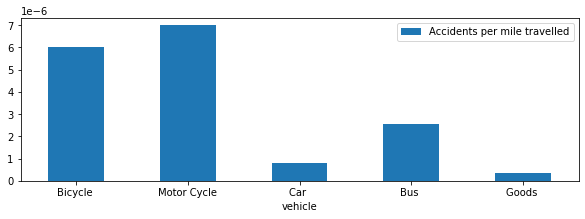

In [126]:
import matplotlib.pyplot as plt
x=[Accidentsofbyclerperbillionvechilemiles,AccidentsofMotorbyclerperbillionvechilemiles,AccidentsofCarrperbillionvechilemiles,AccidentsofBusrperbillionvechilemiles,AccidentsofGoodsrperbillionvechilemiles]
y=["Bicycle ",
"Motor Cycle",
"Car ",
"Bus ",
"Goods "]
plt.figure(figsize=(20, 3))
df = pd.DataFrame({'vehicle':y, 'Accidents per mile travelled':x})
df.plot.bar(x='vehicle', y='Accidents per mile travelled', rot=0,figsize=(10, 3))
#plt.plot(x, y)


In [34]:
Accident_Information20052019_df=Accident_Information20052019_df.withColumn(
    "Day_of_Week",
    when(
        col("Day_of_Week") == 1,
        "Sunday"
    ).
    when(
        col("Day_of_Week") == 2,
        "Monday"
    ).
    when(
        col("Day_of_Week") == 3,
        "Tuesday"
    ).
    when(
        col("Day_of_Week") == 4,
        "Wednesday"
    ).
    when(
        col("Day_of_Week") == 5,
        "Thursday"
    ).
    when(
        col("Day_of_Week") == 6,
        "Friday"
    ).
    when(
        col("Day_of_Week") == 7,
        "Saturday"
    ).otherwise(col("Day_of_Week")),
)

In [33]:
Accident_Information20052019_df

DataFrame[Accident_Index: string, 1st_Road_Class: string, 1st_Road_Number: string, 2nd_Road_Class: string, 2nd_Road_Number: string, Accident_Severity: string, Carriageway_Hazards: string, Date: string, Day_of_Week: string, Did_Police_Officer_Attend_Scene_of_Accident: string, Junction_Control: string, Junction_Detail: string, Latitude: string, Light_Conditions: string, Local_Authority_(District): string, Local_Authority_(Highway): string, Location_Easting_OSGR: string, Location_Northing_OSGR: string, Longitude: string, LSOA_of_Accident_Location: string, Number_of_Casualties: string, Number_of_Vehicles: string, Pedestrian_Crossing-Human_Control: string, Pedestrian_Crossing-Physical_Facilities: string, Police_Force: string, Road_Surface_Conditions: string, Road_Type: string, Special_Conditions_at_Site: string, Speed_limit: string, Time: string, Urban_or_Rural_Area: string, Weather_Conditions: string, Year: int]

In [35]:
DayAccidentwrtseverity_df = Accident_Information20052019_df.groupby('Accident_Severity','Day_of_Week').agg(F.count(Accident_Information20052019_df.Accident_Index).alias('Total accidents'))
#DayAccident_df.sort("Year").show(truncate=False)
DayAccidentwrtseverity_df.show()

+-----------------+-----------+---------------+
|Accident_Severity|Day_of_Week|Total accidents|
+-----------------+-----------+---------------+
|          Serious|     Friday|          52828|
|           Slight|     Sunday|         208376|
|            Fatal|   Thursday|           3946|
|            Fatal|   Saturday|           4999|
|           Slight|   Thursday|         292268|
|          Serious|  Wednesday|          47344|
|           Slight|  Wednesday|         292966|
|          Serious|     Monday|          44440|
|          Serious|   Saturday|          49372|
|          Serious|   Thursday|          48198|
|          Serious|    Tuesday|          46919|
|            Fatal|     Monday|           3872|
|           Slight|   Saturday|         257858|
|          Serious|     Sunday|          43825|
|           Slight|    Tuesday|         289922|
|            Fatal|     Friday|           4477|
|           Slight|     Friday|         314507|
|            Fatal|    Tuesday|         

In [36]:
#Day of week accidents
DayAccident_df = Accident_Information20052019_df.groupby('Day_of_Week').agg(F.count(Accident_Information20052019_df.Accident_Index).alias('Total accidents'))
#DayAccident_df.sort("Year").show(truncate=False)
DayAccident_df.show()


+-----------+---------------+
|Day_of_Week|Total accidents|
+-----------+---------------+
|  Wednesday|         344128|
|    Tuesday|         340675|
|     Friday|         371812|
|   Thursday|         344412|
|   Saturday|         312229|
|     Monday|         317218|
|     Sunday|         256953|
+-----------+---------------+



In [36]:
Accident_Information20052019_df

DataFrame[Accident_Index: string, 1st_Road_Class: string, 1st_Road_Number: string, 2nd_Road_Class: string, 2nd_Road_Number: string, Accident_Severity: string, Carriageway_Hazards: string, Date: string, Day_of_Week: string, Did_Police_Officer_Attend_Scene_of_Accident: string, Junction_Control: string, Junction_Detail: string, Latitude: string, Light_Conditions: string, Local_Authority_(District): string, Local_Authority_(Highway): string, Location_Easting_OSGR: string, Location_Northing_OSGR: string, Longitude: string, LSOA_of_Accident_Location: string, Number_of_Casualties: string, Number_of_Vehicles: string, Pedestrian_Crossing-Human_Control: string, Pedestrian_Crossing-Physical_Facilities: string, Police_Force: string, Road_Surface_Conditions: string, Road_Type: string, Special_Conditions_at_Site: string, Speed_limit: string, Time: string, Urban_or_Rural_Area: string, Weather_Conditions: string, Year: int]

In [146]:
from pyspark.sql.functions import *
#Timestamp String to DateType
Accident_Information20052019_dfff=Accident_Information20052019_df.withColumn("timestamp",to_timestamp("Time"))
Accident_Information20052019_dfff
TimeAccident_dfhour = Accident_Information20052019_dfff.withColumn('hour',hour(Accident_Information20052019_dfff.timestamp))
TimeAccident_dfhour.show()
#Time of week accidents
TimeAccident_df = TimeAccident_dfhour.groupby("Accident_Severity",'hour').agg(F.count(Accident_Information20052019_dfff.Accident_Index).alias('Total accidents'))
#TimeAccident_df= TimeAccident_df.withColumn('Time',F.col('Time').cast(IntegerType()))
TimeAccident_df.printSchema()
TimeAccident_df=TimeAccident_df.sort("hour")
TimeAccident_df.head()



+--------------+--------------+---------------+--------------+---------------+-----------------+-------------------+----------+-----------+-------------------------------------------+--------------------+--------------------+---------+--------------------+--------------------------+-------------------------+---------------------+----------------------+---------+-------------------------+--------------------+------------------+---------------------------------+---------------------------------------+-------------------+-----------------------+------------------+--------------------------+-----------+-----+-------------------+--------------------+----+-------------------+----+
|Accident_Index|1st_Road_Class|1st_Road_Number|2nd_Road_Class|2nd_Road_Number|Accident_Severity|Carriageway_Hazards|      Date|Day_of_Week|Did_Police_Officer_Attend_Scene_of_Accident|    Junction_Control|     Junction_Detail| Latitude|    Light_Conditions|Local_Authority_(District)|Local_Authority_(Highway)|Locatio

Row(Accident_Severity='Slight', hour=None, Total accidents=185)

In [147]:
TimeAccident_df.show()


+-----------------+----+---------------+
|Accident_Severity|hour|Total accidents|
+-----------------+----+---------------+
|           Slight|null|            185|
|            Fatal|null|              4|
|          Serious|null|             43|
|          Serious|   0|           6799|
|           Slight|   0|          26893|
|            Fatal|   0|           1052|
|          Serious|   1|           5124|
|           Slight|   1|          19407|
|            Fatal|   1|            809|
|           Slight|   2|          15119|
|          Serious|   2|           4228|
|            Fatal|   2|            708|
|            Fatal|   3|            624|
|          Serious|   3|           3362|
|           Slight|   3|          12324|
|          Serious|   4|           2652|
|            Fatal|   4|            499|
|           Slight|   4|           9838|
|            Fatal|   5|            626|
|          Serious|   5|           3674|
+-----------------+----+---------------+
only showing top

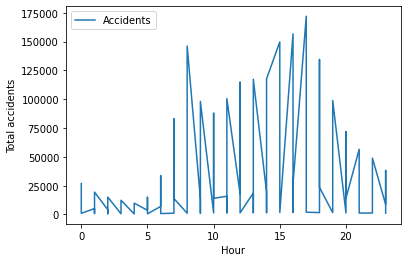

+-----------------+----+---------------+
|Accident_Severity|hour|Total accidents|
+-----------------+----+---------------+
|           Slight|null|            185|
|            Fatal|null|              4|
|          Serious|null|             43|
|          Serious|   0|           6799|
|            Fatal|   0|           1052|
|           Slight|   0|          26893|
|           Slight|   1|          19407|
|            Fatal|   1|            809|
|          Serious|   1|           5124|
|           Slight|   2|          15119|
|          Serious|   2|           4228|
|            Fatal|   2|            708|
|           Slight|   3|          12324|
|            Fatal|   3|            624|
|          Serious|   3|           3362|
|            Fatal|   4|            499|
|          Serious|   4|           2652|
|           Slight|   4|           9838|
|          Serious|   5|           3674|
|           Slight|   5|          14928|
+-----------------+----+---------------+
only showing top

In [38]:
import matplotlib.pyplot as plt

y_ans_val = [val for val in TimeAccident_df.select('Total accidents').collect()]
x_ts = [val for val in TimeAccident_df.select('hour').collect()]

plt.plot(x_ts, y_ans_val)

plt.ylabel('Total accidents')
plt.xlabel('Hour')
plt.legend(['Accidents'], loc='upper left')
plt.show()
TimeAccident_df.show()



In [39]:
import pandas as pd
import matplotlib.pyplot as plt
df = TimeAccident_df.toPandas()
#df.plot()
#display(plt.show())
df.plot.bar(x='hour', y='Total accidents')


<AxesSubplot:xlabel='hour'>

In [40]:
V20052014
Age_df = V20052014.groupby('Age_Band_of_Driver').agg(F.count(V20052014.Accident_Index).alias('Total accidents')).sort("Total accidents")
Age_df.show()


+--------------------+---------------+
|  Age_Band_of_Driver|Total accidents|
+--------------------+---------------+
|             Over 70|          96482|
|            Upto 20Y|         416735|
|Data missing or o...|         476400|
|          40Y to 70Y|        1115355|
|          20Y to 40Y|        2091514|
+--------------------+---------------+



In [42]:
V20052014

DataFrame[Accident_Index: string, Vehicle_Reference: string, Vehicle_Type: string, Towing_and_Articulation: string, Vehicle_Manoeuvre: string, Vehicle_Location-Restricted_Lane: string, Junction_Location: string, Skidding_and_Overturning: string, Hit_Object_in_Carriageway: string, Vehicle_Leaving_Carriageway: string, Hit_Object_off_Carriageway: string, 1st_Point_of_Impact: string, Was_Vehicle_Left_Hand_Drive?: string, Journey_Purpose_of_Driver: string, Sex_of_Driver: string, Age_of_Driver: string, Age_Band_of_Driver: string, Engine_Capacity_(CC): string, Propulsion_Code: string, Age_of_Vehicle: string, Driver_IMD_Decile: string, Driver_Home_Area_Type: string, Year: string]

In [41]:

VECHTYPE = V20052014.groupby('Accident_Index','Vehicle_Type').agg(F.count(V20052014.Accident_Index).alias('Total accidents')).sort("Total accidents")
VECHTYPE.sort(col('Accident_Index').desc()).show()


+--------------+--------------------+---------------+
|Accident_Index|        Vehicle_Type|Total accidents|
+--------------+--------------------+---------------+
| 201998QC01004|          Motorcycle|              1|
| 201997UD71205|                 Car|              1|
| 201997UD71005|                 Car|              3|
| 201997UD70905|                 Car|              2|
| 201997UD70905|          Motorcycle|              1|
| 201997UD70901|                 Bus|              1|
| 201997UD70901|                 Car|              1|
| 201997UD70805|                 Car|              2|
| 201997UD70803|                 Car|              2|
| 201997UD70801|                 Car|              2|
| 201997UD70706|          Motorcycle|              1|
| 201997UD70705|                 Car|              2|
| 201997UD70606|                 Car|              1|
| 201997UD70605|                 Car|              1|
| 201997UD70605|         Pedal cycle|              1|
| 201997UD70603|            

In [44]:
V20052014

DataFrame[Accident_Index: string, Vehicle_Reference: string, Vehicle_Type: string, Towing_and_Articulation: string, Vehicle_Manoeuvre: string, Vehicle_Location-Restricted_Lane: string, Junction_Location: string, Skidding_and_Overturning: string, Hit_Object_in_Carriageway: string, Vehicle_Leaving_Carriageway: string, Hit_Object_off_Carriageway: string, 1st_Point_of_Impact: string, Was_Vehicle_Left_Hand_Drive?: string, Journey_Purpose_of_Driver: string, Sex_of_Driver: string, Age_of_Driver: string, Age_Band_of_Driver: string, Engine_Capacity_(CC): string, Propulsion_Code: string, Age_of_Vehicle: string, Driver_IMD_Decile: string, Driver_Home_Area_Type: string, Year: string]

In [42]:
V20052014=V20052014.withColumn(
    "Sex_of_Driver",
    when(
        col("Sex_of_Driver") == 1,
        "Male"
    ).
    when(
        col("Sex_of_Driver") == 2,
        "Female"
    ).
    when(
        col("Sex_of_Driver") == 3,
        "Unkown"
    ).
    when(
        col("Sex_of_Driver") == -1,
        "Data missing or out of range"
    ).otherwise(col("Sex_of_Driver")),
)

In [43]:
TimeAccident_df.show()

+-----------------+----+---------------+
|Accident_Severity|hour|Total accidents|
+-----------------+----+---------------+
|           Slight|null|            185|
|            Fatal|null|              4|
|          Serious|null|             43|
|           Slight|   0|          26893|
|            Fatal|   0|           1052|
|          Serious|   0|           6799|
|           Slight|   1|          19407|
|          Serious|   1|           5124|
|            Fatal|   1|            809|
|            Fatal|   2|            708|
|          Serious|   2|           4228|
|           Slight|   2|          15119|
|            Fatal|   3|            624|
|          Serious|   3|           3362|
|           Slight|   3|          12324|
|          Serious|   4|           2652|
|            Fatal|   4|            499|
|           Slight|   4|           9838|
|          Serious|   5|           3674|
|           Slight|   5|          14928|
+-----------------+----+---------------+
only showing top

In [145]:
TimeAccident_df

NameError: name 'TimeAccident_df' is not defined

In [179]:

TimeAccident_dfwithbrack=TimeAccident_df.withColumn(
    "hour",
    when(
        col("hour") == 0,
        "Off peak"
    ). when(
        col("hour") == 1,
        "Off peak"
    ). when(
        col("hour") == 2,
        "Off peak"
    ). when(
        col("hour") == 3,
        "Off peak"
    ). when(
        col("hour") == 4,
        "Off peak"
    ). when(
        col("hour") == 5,
        "Off peak"
    ). when(
        col("hour") == 6,
        "Off peak"
    ). when(
        col("hour") == 7,
        "07:00-10:00 Rush Hour"
    ).
    when(
        col("hour") == 8,
        "07:00-10:00 Rush Hour"
    ).
    when(
        col("hour") == 9,
        "07:00-10:00 Rush Hour"
    ). when(
        col("hour") == 10,
        "07:00-10:00 Rush Hour"
    ). when(
        col("hour") == 11,
        "Off peak"
    ). when(
        col("hour") == 12,
        "Off peak"
    ). when(
        col("hour") == 13,
        "Off peak"
    ). when(
        col("hour") == 14,
        "Off peak"
    ). when(
        col("hour") == 15,
        "Off peak"
    ). when(
        col("hour") == 16,
        "16:00-19:00 Rush Hour"
    ). when(
        col("hour") == 17,
        "16:00-19:00 Rush Hour"
    ). when(
        col("hour") == 18,
        "16:00-19:00 Rush Hour"
    ). when(
        col("hour") == 19,
        "16:00-19:00 Rush Hour"
    ). when(
        col("hour") == 20,
        "Off peak"
    ). when(
        col("hour") == 21,
        "Off peak"
    ). when(
        col("hour") == 22,
        "Off peak"
    ). when(
        col("hour") == 23,
        "Off peak"
    ).
    when(
        col("hour") == -1,
        "Data missing or out of range"
    ).otherwise(col("hour")))

In [172]:
TimeAccident_dfwithbrack.show()

+-----------------+--------+---------------+
|Accident_Severity|    hour|Total accidents|
+-----------------+--------+---------------+
|           Slight|    null|            185|
|            Fatal|    null|              4|
|          Serious|    null|             43|
|            Fatal|Off peak|           1052|
|          Serious|Off peak|           6799|
|           Slight|Off peak|          26893|
|           Slight|Off peak|          19407|
|          Serious|Off peak|           5124|
|            Fatal|Off peak|            809|
|            Fatal|Off peak|            708|
|           Slight|Off peak|          15119|
|          Serious|Off peak|           4228|
|            Fatal|Off peak|            624|
|          Serious|Off peak|           3362|
|           Slight|Off peak|          12324|
|          Serious|Off peak|           2652|
|            Fatal|Off peak|            499|
|           Slight|Off peak|           9838|
|            Fatal|Off peak|            626|
|         

In [181]:

TimeAccident_dfwithbrack=TimeAccident_dfwithbrack.toPandas()
TimeAccident_dfwithbrack

Accident_Severity                   hour  Total_accidents
0              Fatal                   None                4
1            Serious                   None               43
2             Slight                   None              185
3              Fatal  07:00-10:00 Rush Hour             4600
4              Fatal  16:00-19:00 Rush Hour             7220
5              Fatal               Off peak            17874
6            Serious  07:00-10:00 Rush Hour            60337
7            Serious  16:00-19:00 Rush Hour            97439
8            Serious               Off peak           175107
9             Slight  07:00-10:00 Rush Hour           414871
10            Slight  16:00-19:00 Rush Hour           561996
11            Slight               Off peak           947751

In [182]:
TimeAccident_dfwithbrack = TimeAccident_dfwithbrack[TimeAccident_dfwithbrack.hour != "None"]
TimeAccident_dfwithbrack

Accident_Severity                   hour  Total_accidents
0              Fatal                   None                4
1            Serious                   None               43
2             Slight                   None              185
3              Fatal  07:00-10:00 Rush Hour             4600
4              Fatal  16:00-19:00 Rush Hour             7220
5              Fatal               Off peak            17874
6            Serious  07:00-10:00 Rush Hour            60337
7            Serious  16:00-19:00 Rush Hour            97439
8            Serious               Off peak           175107
9             Slight  07:00-10:00 Rush Hour           414871
10            Slight  16:00-19:00 Rush Hour           561996
11            Slight               Off peak           947751

In [183]:
TimeAccident_dfwithbrack = TimeAccident_dfwithbrack.iloc[3:]

In [184]:
TimeAccident_dfwithbrack

Accident_Severity                   hour  Total_accidents
3              Fatal  07:00-10:00 Rush Hour             4600
4              Fatal  16:00-19:00 Rush Hour             7220
5              Fatal               Off peak            17874
6            Serious  07:00-10:00 Rush Hour            60337
7            Serious  16:00-19:00 Rush Hour            97439
8            Serious               Off peak           175107
9             Slight  07:00-10:00 Rush Hour           414871
10            Slight  16:00-19:00 Rush Hour           561996
11            Slight               Off peak           947751

In [185]:

TimeAccident_dfwithbrack=TimeAccident_dfwithbrack.pivot(index ='hour', columns ='Accident_Severity')
#TimeAccident_dfwithbrack = TimeAccident_dfwithbrack.drop(labels=['None'], axis=0)
TimeAccident_dfwithbrack

Total_accidents                
Accident_Severity               Fatal Serious  Slight
hour                                                 
07:00-10:00 Rush Hour            4600   60337  414871
16:00-19:00 Rush Hour            7220   97439  561996
Off peak                        17874  175107  947751

(array([0, 1, 2]),
 [Text(0, 0, '07:00-10:00 Rush Hour'),
  Text(1, 0, '16:00-19:00 Rush Hour'),
  Text(2, 0, 'Off peak')])

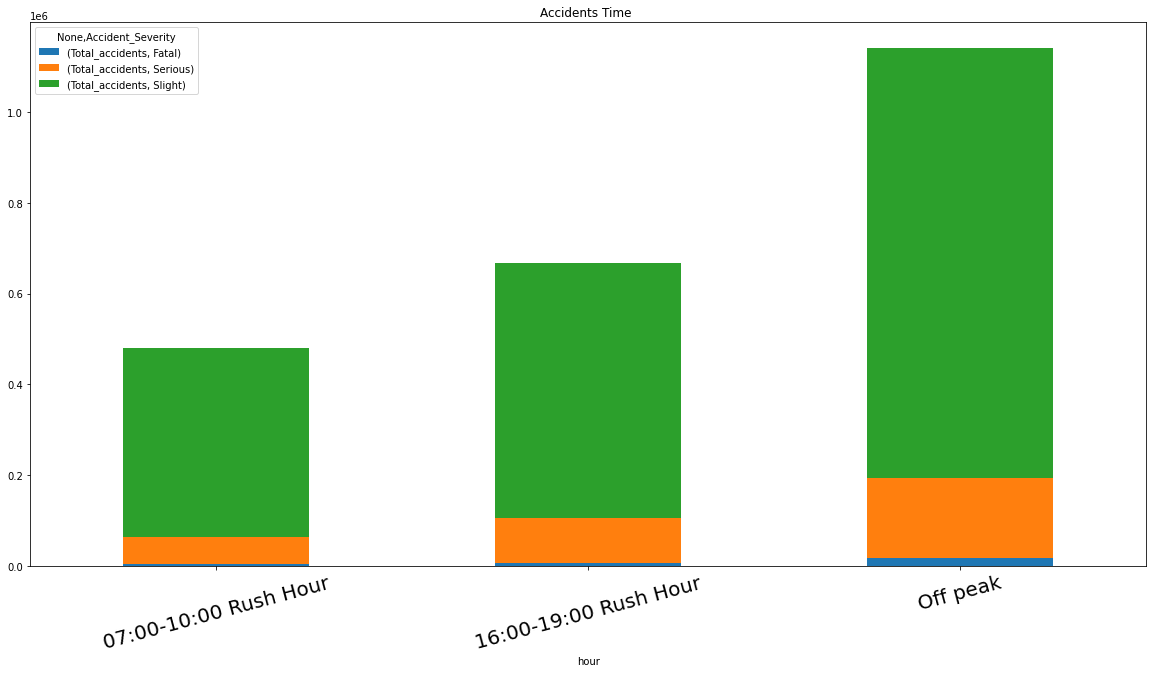

In [186]:

TimeAccident_dfwithbrack.plot.bar(stacked=True,rot=15, title="Accidents Time ",figsize=(20, 10))
plt.xticks(fontsize=20)

In [144]:
TimeAccident_dfwithbrack=TimeAccident_dfwithbrack.toPandas()
Accident_Information20052019_dfroadsurface = Accident_Information20052019_dfroadsurface.drop(labels=['Data missing or out of range'], axis=0)
Accident_Information20052019_dfroadsurface
Accident_Information20052019_dfroadsurface.plot.bar(stacked=True,rot=15, title="Accidents Road Surface ",figsize=(20, 10))
plt.xticks(fontsize=20)

NameError: name 'TimeAccident_dfwithbrack' is not defined

In [180]:
TimeAccident_dfwithbrack = TimeAccident_dfwithbrack.groupby('Accident_Severity','hour').agg(F.sum(TimeAccident_dfwithbrack['Total accidents']).alias('Total_accidents')).sort("Total_accidents")
TimeAccident_dfwithbrack.show()

+-----------------+--------------------+---------------+
|Accident_Severity|                hour|Total_accidents|
+-----------------+--------------------+---------------+
|            Fatal|                null|              4|
|          Serious|                null|             43|
|           Slight|                null|            185|
|            Fatal|07:00-10:00 Rush ...|           4600|
|            Fatal|16:00-19:00 Rush ...|           7220|
|            Fatal|            Off peak|          17874|
|          Serious|07:00-10:00 Rush ...|          60337|
|          Serious|16:00-19:00 Rush ...|          97439|
|          Serious|            Off peak|         175107|
|           Slight|07:00-10:00 Rush ...|         414871|
|           Slight|16:00-19:00 Rush ...|         561996|
|           Slight|            Off peak|         947751|
+-----------------+--------------------+---------------+



In [50]:
DayAccidentwrtseverity_df.show()

+-----------------+-----------+---------------+
|Accident_Severity|Day_of_Week|Total accidents|
+-----------------+-----------+---------------+
|          Serious|     Friday|          52828|
|           Slight|     Sunday|         208376|
|            Fatal|   Thursday|           3946|
|            Fatal|   Saturday|           4999|
|           Slight|   Thursday|         292268|
|          Serious|  Wednesday|          47344|
|           Slight|  Wednesday|         292966|
|          Serious|     Monday|          44440|
|          Serious|   Saturday|          49372|
|          Serious|   Thursday|          48198|
|          Serious|    Tuesday|          46919|
|            Fatal|     Monday|           3872|
|           Slight|   Saturday|         257858|
|          Serious|     Sunday|          43825|
|           Slight|    Tuesday|         289922|
|            Fatal|     Friday|           4477|
|           Slight|     Friday|         314507|
|            Fatal|    Tuesday|         

In [51]:
DayAccidentwrtseverity_df.show()

+-----------------+-----------+---------------+
|Accident_Severity|Day_of_Week|Total accidents|
+-----------------+-----------+---------------+
|          Serious|     Friday|          52828|
|           Slight|     Sunday|         208376|
|            Fatal|   Thursday|           3946|
|            Fatal|   Saturday|           4999|
|           Slight|   Thursday|         292268|
|          Serious|  Wednesday|          47344|
|           Slight|  Wednesday|         292966|
|          Serious|     Monday|          44440|
|          Serious|   Saturday|          49372|
|          Serious|   Thursday|          48198|
|          Serious|    Tuesday|          46919|
|            Fatal|     Monday|           3872|
|           Slight|   Saturday|         257858|
|          Serious|     Sunday|          43825|
|           Slight|    Tuesday|         289922|
|            Fatal|     Friday|           4477|
|           Slight|     Friday|         314507|
|            Fatal|    Tuesday|         

In [47]:
DayAccidentwrtseverity_dfupdate=DayAccidentwrtseverity_df.withColumn(
    "Day_of_Week",
    when(
        col("Day_of_Week") == "Sunday",
        "Weekend"
    ).
    when(
        col("Day_of_Week") == "Monday",
        "Week Day"
    ).
    when(
        col("Day_of_Week") == "Tuesday",
        "Week Day"
    ).
    when(
        col("Day_of_Week") == "Wednesday",
        "Week Day"
    ).
    when(
        col("Day_of_Week") == "Thursday",
        "Week Day"
    ).
    when(
        col("Day_of_Week") == "Friday",
        "Week Day"
    ).
    when(
        col("Day_of_Week") == "Saturday",
        "Weekend"
    ).otherwise(col("Day_of_Week")),
)

In [48]:

weekAccident_dfwithbrack = DayAccidentwrtseverity_dfupdate.groupby('Accident_Severity','Day_of_Week').agg(F.sum(DayAccidentwrtseverity_dfupdate['Total accidents']).alias('Total_accidents')).sort("Total_accidents")
weekAccident_dfwithbrack.show()

+-----------------+-----------+---------------+
|Accident_Severity|Day_of_Week|Total_accidents|
+-----------------+-----------+---------------+
|            Fatal|    Weekend|           9751|
|            Fatal|   Week Day|          19947|
|          Serious|    Weekend|          93197|
|          Serious|   Week Day|         239729|
|           Slight|    Weekend|         466234|
|           Slight|   Week Day|        1458569|
+-----------------+-----------+---------------+



In [31]:
Accident_Information20052019_dfjunction=Accident_Information20052019_df.withColumn(
    "Junction_Detail",
    when(
        col("Junction_Detail") == 0,
        "Not at junction or within 20 metres"
    ).
    when(
        col("Junction_Detail") == 1,
        "Roundabout"
    ).
    when(
        col("Junction_Detail") == 2,
        "Mini-roundabout"
    ).
    when(
        col("Junction_Detail") == 3,
        "T or staggered junction"
    ).
    when(
        col("Junction_Detail") == 5,
        "Slip road"
    ).
    when(
        col("Junction_Detail") == 6,
        "Crossroads"
    ).
    when(
        col("Junction_Detail") == 7,
        "More than 4 arms (not roundabout)"
    ).when(
        col("Junction_Detail") == 8,
        "Private drive or entrance"
    )
    .when(
        col("Junction_Detail") == 9,
        "Other junction"
    ).when(
        col("Junction_Detail") == -1,
        "Data missing or out of range"
    ).otherwise(col("Junction_Detail"))
)

In [55]:
Accident_Information20052019_dfjunction

DataFrame[Accident_Index: string, 1st_Road_Class: string, 1st_Road_Number: string, 2nd_Road_Class: string, 2nd_Road_Number: string, Accident_Severity: string, Carriageway_Hazards: string, Date: string, Day_of_Week: string, Did_Police_Officer_Attend_Scene_of_Accident: string, Junction_Control: string, Junction_Detail: string, Latitude: string, Light_Conditions: string, Local_Authority_(District): string, Local_Authority_(Highway): string, Location_Easting_OSGR: string, Location_Northing_OSGR: string, Longitude: string, LSOA_of_Accident_Location: string, Number_of_Casualties: string, Number_of_Vehicles: string, Pedestrian_Crossing-Human_Control: string, Pedestrian_Crossing-Physical_Facilities: string, Police_Force: string, Road_Surface_Conditions: string, Road_Type: string, Special_Conditions_at_Site: string, Speed_limit: string, Time: string, Urban_or_Rural_Area: string, Weather_Conditions: string, Year: int]

In [ ]:
Accident_Information20052019_dfweather_dffindex=Accident_Information20052019_dfweather_df.set_index('Weather_Conditions')
Accident_Information20052019_dfweather_dffindex3=Accident_Information20052019_dfweather_dffindex
Accident_Information20052019_dfweather_dffindex3

grouped = Accident_Information20052019_dfweather_dffindex3.groupby(Accident_Information20052019_dfweather_dffindex3.Accident_Severity)
Serious = grouped.get_group("Serious")
Serious=Serious["Total accidents"]
Serious=Serious.reset_index(drop=True)
Fatal = grouped.get_group("Fatal")
Fatal=Fatal["Total accidents"]
Fatal=Fatal.reset_index(drop=True)
Slight = grouped.get_group("Slight")
Slight=Slight["Total accidents"]
Slight=Slight.reset_index(drop=True)
Slight
Casulaty = pd.DataFrame({'period': ['Fine no high winds', 'Raining no high winds', 'Snowing no high winds', 'Fine + high winds', 'Raining + high winds', 'Snowing + high winds', 'Fog or mist', 'Unknown','Unknown','Unknown'],
                   'Serious': Serious,
                   'Fatal': Fatal,
                   'Slight': Slight})
Casulaty
dflist=['Serious','Fatal','Slight']
Casulaty['Total_casualties']=Casulaty[dflist].sum(axis=1)

Casulaty_spark=spark.createDataFrame(Casulaty)
Casulaty_spark=Casulaty_spark.withColumn('KSI', Casulaty_spark[2]+Casulaty_spark[1])
Casulaty_spark=Casulaty_spark.withColumn('"%"KSI', (Casulaty_spark[5]/Casulaty_spark[4])*100)
Casulaty_spark_df=Casulaty_spark.toPandas()

Casulaty_spark_df

In [51]:

DvrSex = V20052014.groupby('Accident_Index','Sex_of_Driver').agg(F.count(V20052014.Accident_Index).alias('Total accidents')).sort("Total accidents")
DvrSex.sort(col('Accident_Index').desc()).show()

+--------------+-------------+---------------+
|Accident_Index|Sex_of_Driver|Total accidents|
+--------------+-------------+---------------+
| 201998QC01004|         Male|              1|
| 201997UD71205|         Male|              1|
| 201997UD71005|       Female|              1|
| 201997UD71005|         Male|              2|
| 201997UD70905|         Male|              2|
| 201997UD70905|       Female|              1|
| 201997UD70901|         Male|              2|
| 201997UD70805|         Male|              2|
| 201997UD70803|         Male|              2|
| 201997UD70801|         Male|              1|
| 201997UD70801|       Female|              1|
| 201997UD70706|         Male|              1|
| 201997UD70705|         Male|              2|
| 201997UD70606|       Female|              1|
| 201997UD70605|         Male|              2|
| 201997UD70603|         Male|              1|
| 201997UD70506|         Male|              1|
| 201997UD70506|       Female|              1|
| 201997UD705

In [52]:

DvrAge = V20052014.groupby('Accident_Index','Age_Band_of_Driver').agg(F.count(V20052014.Accident_Index).alias('Total accidents')).sort("Total accidents")
DvrAge.sort(col('Accident_Index').desc()).show()

+--------------+------------------+---------------+
|Accident_Index|Age_Band_of_Driver|Total accidents|
+--------------+------------------+---------------+
| 201998QC01004|        40Y to 70Y|              1|
| 201997UD71205|        40Y to 70Y|              1|
| 201997UD71005|        20Y to 40Y|              1|
| 201997UD71005|        40Y to 70Y|              2|
| 201997UD70905|        40Y to 70Y|              3|
| 201997UD70901|        20Y to 40Y|              1|
| 201997UD70901|        40Y to 70Y|              1|
| 201997UD70805|           Over 70|              2|
| 201997UD70803|           Over 70|              1|
| 201997UD70803|        20Y to 40Y|              1|
| 201997UD70801|          Upto 20Y|              1|
| 201997UD70801|        20Y to 40Y|              1|
| 201997UD70706|        40Y to 70Y|              1|
| 201997UD70705|        20Y to 40Y|              1|
| 201997UD70705|        40Y to 70Y|              1|
| 201997UD70606|        40Y to 70Y|              1|
| 201997UD70

In [53]:

Accidensev = Accident_Information20052019_df.groupby('Accident_Index','Accident_Severity').agg(F.count(Accident_Information20052019_df.Accident_Index).alias('Total accidents')).sort("Total accidents")
Accidensev.sort(col('Accident_Index').desc()).show()


+--------------+-----------------+---------------+
|Accident_Index|Accident_Severity|Total accidents|
+--------------+-----------------+---------------+
| 201998QC01004|          Serious|              1|
| 201997UD71205|           Slight|              1|
| 201997UD71005|           Slight|              1|
| 201997UD70905|          Serious|              1|
| 201997UD70901|           Slight|              1|
| 201997UD70805|           Slight|              1|
| 201997UD70803|           Slight|              1|
| 201997UD70801|           Slight|              1|
| 201997UD70706|          Serious|              1|
| 201997UD70705|           Slight|              1|
| 201997UD70606|          Serious|              1|
| 201997UD70605|          Serious|              1|
| 201997UD70603|            Fatal|              1|
| 201997UD70506|           Slight|              1|
| 201997UD70505|          Serious|              1|
| 201997UD70503|           Slight|              1|
| 201997UD70501|           Slig

In [99]:
Accident_Information20052019_df

DataFrame[Accident_Index: string, 1st_Road_Class: string, 1st_Road_Number: string, 2nd_Road_Class: string, 2nd_Road_Number: string, Accident_Severity: string, Carriageway_Hazards: string, Date: string, Day_of_Week: string, Did_Police_Officer_Attend_Scene_of_Accident: string, Junction_Control: string, Junction_Detail: string, Latitude: string, Light_Conditions: string, Local_Authority_(District): string, Local_Authority_(Highway): string, Location_Easting_OSGR: string, Location_Northing_OSGR: string, Longitude: string, LSOA_of_Accident_Location: string, Number_of_Casualties: string, Number_of_Vehicles: string, Pedestrian_Crossing-Human_Control: string, Pedestrian_Crossing-Physical_Facilities: string, Police_Force: string, Road_Surface_Conditions: string, Road_Type: string, Special_Conditions_at_Site: string, Speed_limit: string, Time: string, Urban_or_Rural_Area: string, Weather_Conditions: string, Year: int]

In [102]:
Accident_Information20052019_dfweather=Accident_Information20052019_df.withColumn(
    "Weather_Conditions",
    when(
        col("Weather_Conditions") == 1,
        "Fine no high winds"
    ).
    when(
        col("Weather_Conditions") == 2,
        "Raining no high winds"
    ).
    when(
        col("Weather_Conditions") == 3,
        "Snowing no high winds"
    ).
    when(
        col("Weather_Conditions") == 4,
        "Fine + high winds"
    ).
    when(
        col("Weather_Conditions") == 5,
        "Raining + high winds"
    ).
    when(
        col("Weather_Conditions") == 6,
        "Snowing + high winds"
    ).
    when(
        col("Weather_Conditions") == 7,
        "Fog or mist"
    ).when(
        col("Weather_Conditions") == 8,
        "Unknown"
    )
    .when(
        col("Weather_Conditions") == 9,
        "Unknown"
    ).when(
        col("Weather_Conditions") == -1,
        "Unknown"
    ).otherwise(col("Weather_Conditions"))
)

In [103]:

Accident_Information20052019_dfweather = Accident_Information20052019_dfweather.groupby('Accident_Severity','Weather_Conditions').agg(F.count(Accident_Information20052019_dfweather.Accident_Index).alias('Total accidents'))
Accident_Information20052019_dfweather.show()

+-----------------+--------------------+---------------+
|Accident_Severity|  Weather_Conditions|Total accidents|
+-----------------+--------------------+---------------+
|           Slight|Snowing no high w...|          13123|
|            Fatal|         Fog or mist|            278|
|           Slight|  Fine no high winds|        1533207|
|            Fatal|   Fine + high winds|            540|
|            Fatal|  Fine no high winds|          24527|
|          Serious|         Fog or mist|           1818|
|           Slight|Data missing or o...|            157|
|            Fatal|             Unknown|            465|
|          Serious|Raining no high w...|          35321|
|           Slight|         Fog or mist|           9815|
|           Slight|             Unknown|          48872|
|           Slight|   Fine + high winds|          23207|
|           Slight|Raining no high w...|         229164|
|          Serious|Data missing or o...|             13|
|          Serious|  Fine no hi

In [109]:
Accident_Information20052019_dfweather_df=Accident_Information20052019_dfweather.toPandas()
Accident_Information20052019_dfweather_df

Accident_Severity            Weather_Conditions  Total accidents
0             Slight         Snowing no high winds            13123
1              Fatal                   Fog or mist              278
2             Slight            Fine no high winds          1533207
3              Fatal             Fine + high winds              540
4              Fatal            Fine no high winds            24527
5            Serious                   Fog or mist             1818
6             Slight  Data missing or out of range              157
7              Fatal                       Unknown              465
8            Serious         Raining no high winds            35321
9             Slight                   Fog or mist             9815
10            Slight                       Unknown            48872
11            Slight             Fine + high winds            23207
12            Slight         Raining no high winds           229164
13           Serious  Data missing or out of range               13
14           Serious            Fine no high winds           273898
15           Serious         Snowing no high winds             1565
16             Fatal  Data missing or out of range                5
17             Fatal          Snowing + high winds               17
18            Slight                         Other            38627
19             Fatal         Raining no high winds             2879
20           Serious          Snowing + high winds              365
21           Serious                       Unknown             5951
22             Fatal          Raining + high winds              462
23           Serious                         Other             5058
24            Slight          Snowing + high winds             2547
25            Slight          Raining + high winds            26084
26             Fatal         Snowing no high winds              127
27           Serious          Raining + high winds             4504
28             Fatal                         Other              398
29           Serious             Fine + high winds             4433

In [115]:
import pandas as pd
import matplotlib.pyplot as plt



Accident_Information20052019_dfweather_dffindex=Accident_Information20052019_dfweather_df.set_index('Weather_Conditions')
Accident_Information20052019_dfweather_dffindex3=Accident_Information20052019_dfweather_dffindex
Accident_Information20052019_dfweather_dffindex3

grouped = Accident_Information20052019_dfweather_dffindex3.groupby(Accident_Information20052019_dfweather_dffindex3.Accident_Severity)
Serious = grouped.get_group("Serious")
Serious=Serious["Total accidents"]
Serious=Serious.reset_index(drop=True)
Fatal = grouped.get_group("Fatal")
Fatal=Fatal["Total accidents"]
Fatal=Fatal.reset_index(drop=True)
Slight = grouped.get_group("Slight")
Slight=Slight["Total accidents"]
Slight=Slight.reset_index(drop=True)
Slight
Casulaty = pd.DataFrame({'period': ['Fine no high winds', 'Raining no high winds', 'Snowing no high winds', 'Fine + high winds', 'Raining + high winds', 'Snowing + high winds', 'Fog or mist', 'Unknown','Unknown','Unknown'],
                   'Serious': Serious,
                   'Fatal': Fatal,
                   'Slight': Slight})
Casulaty
dflist=['Serious','Fatal','Slight']
Casulaty['Total_casualties']=Casulaty[dflist].sum(axis=1)

Casulaty_spark=spark.createDataFrame(Casulaty)
Casulaty_spark=Casulaty_spark.withColumn('KSI', Casulaty_spark[2]+Casulaty_spark[1])
Casulaty_spark=Casulaty_spark.withColumn('"%"KSI', (Casulaty_spark[5]/Casulaty_spark[4])*100)
Casulaty_spark_df=Casulaty_spark.toPandas()

Casulaty_spark_df


period  Serious  Fatal   Slight  Total_casualties     KSI  \
0     Fine no high winds     1818    278    13123             15219    2096   
1  Raining no high winds    35321    540  1533207           1569068   35861   
2  Snowing no high winds       13  24527      157             24697   24540   
3      Fine + high winds   273898    465     9815            284178  274363   
4   Raining + high winds     1565      5    48872             50442    1570   
5   Snowing + high winds      365     17    23207             23589     382   
6            Fog or mist     5951   2879   229164            237994    8830   
7                Unknown     5058    462    38627             44147    5520   
8                Unknown     4504    127     2547              7178    4631   
9                Unknown     4433    398    26084             30915    4831   

      "%"KSI  
0  13.772258  
1   2.285497  
2  99.364295  
3  96.546179  
4   3.112486  
5   1.619399  
6   3.710178  
7  12.503681  
8  64.516578  
9  15.626718

In [127]:
Accident_Information20052019_df

DataFrame[Accident_Index: string, 1st_Road_Class: string, 1st_Road_Number: string, 2nd_Road_Class: string, 2nd_Road_Number: string, Accident_Severity: string, Carriageway_Hazards: string, Date: string, Day_of_Week: string, Did_Police_Officer_Attend_Scene_of_Accident: string, Junction_Control: string, Junction_Detail: string, Latitude: string, Light_Conditions: string, Local_Authority_(District): string, Local_Authority_(Highway): string, Location_Easting_OSGR: string, Location_Northing_OSGR: string, Longitude: string, LSOA_of_Accident_Location: string, Number_of_Casualties: string, Number_of_Vehicles: string, Pedestrian_Crossing-Human_Control: string, Pedestrian_Crossing-Physical_Facilities: string, Police_Force: string, Road_Surface_Conditions: string, Road_Type: string, Special_Conditions_at_Site: string, Speed_limit: string, Time: string, Urban_or_Rural_Area: string, Weather_Conditions: string, Year: int]

In [138]:
Accident_Information20052019_dfroadsurface=Accident_Information20052019_df.withColumn(
    "Road_Surface_Conditions",
    when(
        col("Road_Surface_Conditions") == 1,
        "Dry"
    ).when(
        col("Road_Surface_Conditions") == 2,
        "Wet or damp"
    ).when(
        col("Road_Surface_Conditions") == 3,
        "Snow"
    ).
    when(
        col("Road_Surface_Conditions") == 4,
        "Frost or ice"
    ).
    when(
        col("Road_Surface_Conditions") == 5,
        "Flood over 3cm. deep"
    ).
    when(
        col("Road_Surface_Conditions") == 6,
        "Oil or diesel"
    ).
    when(
        col("Road_Surface_Conditions") == 7,
        "Mud"
    ).when(
        col("Road_Surface_Conditions") == -1,
        "Data missing or out of range"
    ).otherwise(col("Road_Surface_Conditions"))
)

In [139]:

Accident_Information20052019_dfroadsurface = Accident_Information20052019_dfroadsurface.groupby('Accident_Severity','Road_Surface_Conditions').agg(F.count(Accident_Information20052019_dfroadsurface.Accident_Index).alias('Total accidents'))
Accident_Information20052019_dfroadsurface.show()

+-----------------+-----------------------+---------------+
|Accident_Severity|Road_Surface_Conditions|Total accidents|
+-----------------+-----------------------+---------------+
|          Serious|           Frost or ice|           5313|
|           Slight|   Data missing or o...|           7036|
|           Slight|                    Dry|        1335619|
|          Serious|   Data missing or o...|            659|
|          Serious|                   Snow|           1429|
|          Serious|   Flood over 3cm. deep|            456|
|          Serious|                    Dry|         235406|
|            Fatal|            Wet or damp|           9007|
|           Slight|           Frost or ice|          37160|
|            Fatal|   Data missing or o...|             22|
|           Slight|            Wet or damp|         530367|
|           Slight|   Flood over 3cm. deep|           2638|
|          Serious|            Wet or damp|          89663|
|           Slight|                   Sn

In [140]:
Accident_Information20052019_dfroadsurface=Accident_Information20052019_dfroadsurface.toPandas()
Accident_Information20052019_dfroadsurface=Accident_Information20052019_dfroadsurface.pivot(index ='Road_Surface_Conditions', columns ='Accident_Severity')

In [141]:
Accident_Information20052019_dfroadsurface

Total accidents                 
Accident_Severity                      Fatal Serious   Slight
Road_Surface_Conditions                                      
Data missing or out of range              22     659     7036
Dry                                    20057  235406  1335619
Flood over 3cm. deep                      63     456     2638
Frost or ice                             450    5313    37160
Snow                                      99    1429    11983
Wet or damp                             9007   89663   530367

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Dry'),
  Text(1, 0, 'Flood over 3cm. deep'),
  Text(2, 0, 'Frost or ice'),
  Text(3, 0, 'Snow'),
  Text(4, 0, 'Wet or damp')])

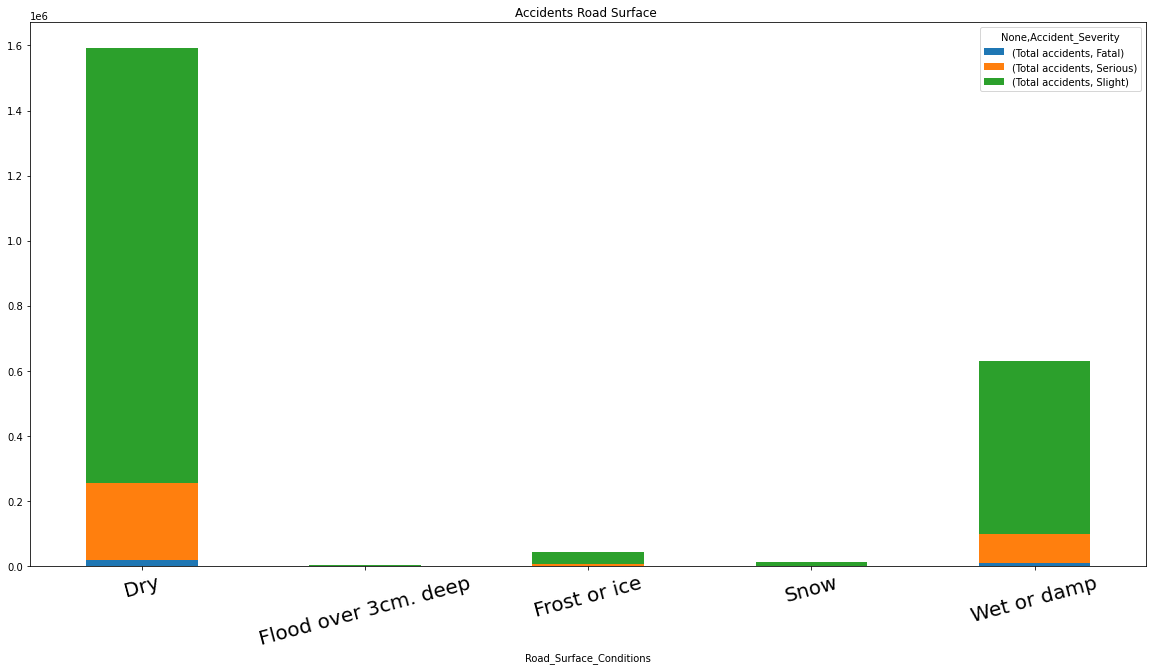

In [143]:
Accident_Information20052019_dfroadsurface = Accident_Information20052019_dfroadsurface.drop(labels=['Data missing or out of range'], axis=0)
Accident_Information20052019_dfroadsurface
Accident_Information20052019_dfroadsurface.plot.bar(stacked=True,rot=15, title="Accidents Road Surface ",figsize=(20, 10))
plt.xticks(fontsize=20)

In [116]:
Accident_Information20052019_df

DataFrame[Accident_Index: string, 1st_Road_Class: string, 1st_Road_Number: string, 2nd_Road_Class: string, 2nd_Road_Number: string, Accident_Severity: string, Carriageway_Hazards: string, Date: string, Day_of_Week: string, Did_Police_Officer_Attend_Scene_of_Accident: string, Junction_Control: string, Junction_Detail: string, Latitude: string, Light_Conditions: string, Local_Authority_(District): string, Local_Authority_(Highway): string, Location_Easting_OSGR: string, Location_Northing_OSGR: string, Longitude: string, LSOA_of_Accident_Location: string, Number_of_Casualties: string, Number_of_Vehicles: string, Pedestrian_Crossing-Human_Control: string, Pedestrian_Crossing-Physical_Facilities: string, Police_Force: string, Road_Surface_Conditions: string, Road_Type: string, Special_Conditions_at_Site: string, Speed_limit: string, Time: string, Urban_or_Rural_Area: string, Weather_Conditions: string, Year: int]

In [43]:
Accident_Information20052019_dfLight_Conditions=Accident_Information20052019_df.withColumn(
    "Light_Conditions",
    when(
        col("Light_Conditions") == 1,
        "Daylight"
    ).
    when(
        col("Light_Conditions") == 4,
        "Darkness - lights lit"
    ).
    when(
        col("Light_Conditions") == 5,
        "Darkness - lights unlit"
    ).
    when(
        col("Light_Conditions") == 6,
        "Darkness - no lighting"
    ).
    when(
        col("Light_Conditions") == 7,
        "Darkness - lighting unknown"
    ).when(
        col("Light_Conditions") == -1,
        "Data missing or out of range"
    ).otherwise(col("Light_Conditions"))
)

In [44]:

Accident_Information20052019_dfLight_Conditions = Accident_Information20052019_dfLight_Conditions.groupby('Accident_Severity','Light_Conditions').agg(F.count(Accident_Information20052019_dfLight_Conditions.Accident_Index).alias('Total accidents'))
Accident_Information20052019_dfLight_Conditions.show()

+-----------------+--------------------+---------------+
|Accident_Severity|    Light_Conditions|Total accidents|
+-----------------+--------------------+---------------+
|            Fatal|Darkness - lights...|            234|
|           Slight|Darkness - lights...|         375595|
|            Fatal|Darkness - lights...|           6149|
|           Slight|Data missing or o...|             14|
|          Serious|            Daylight|         229762|
|            Fatal|Darkness - no lig...|           5521|
|          Serious|Darkness - no lig...|          25689|
|           Slight|Darkness - no lig...|          93646|
|           Slight|Darkness - lighti...|          25134|
|          Serious|Darkness - lights...|          71553|
|          Serious|Darkness - lights...|           1947|
|            Fatal|Data missing or o...|              1|
|            Fatal|            Daylight|          17429|
|          Serious|Darkness - lighti...|           3975|
|           Slight|            

In [45]:
Accident_Information20052019_dfLight_Conditions=Accident_Information20052019_dfLight_Conditions.toPandas()
Accident_Information20052019_dfLight_Conditions=Accident_Information20052019_dfLight_Conditions.pivot(index ='Light_Conditions', columns ='Accident_Severity')
Accident_Information20052019_dfLight_Conditions

Total accidents                     
Accident_Severity                      Fatal   Serious     Slight
Light_Conditions                                                 
Darkness - lighting unknown            364.0    3975.0    25134.0
Darkness - lights lit                 6149.0   71553.0   375595.0
Darkness - lights unlit                234.0    1947.0     9538.0
Darkness - no lighting                5521.0   25689.0    93646.0
Data missing or out of range             1.0       NaN       14.0
Daylight                             17429.0  229762.0  1420876.0

In [46]:
Accident_Information20052019_dfLight_Conditions = Accident_Information20052019_dfLight_Conditions.drop(labels=['Data missing or out of range'], axis=0)
Accident_Information20052019_dfLight_Conditions

Total accidents                     
Accident_Severity                     Fatal   Serious     Slight
Light_Conditions                                                
Darkness - lighting unknown           364.0    3975.0    25134.0
Darkness - lights lit                6149.0   71553.0   375595.0
Darkness - lights unlit               234.0    1947.0     9538.0
Darkness - no lighting               5521.0   25689.0    93646.0
Daylight                            17429.0  229762.0  1420876.0

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Darkness - lighting unknown'),
  Text(1, 0, 'Darkness - lights lit'),
  Text(2, 0, 'Darkness - lights unlit'),
  Text(3, 0, 'Darkness - no lighting'),
  Text(4, 0, 'Daylight')])

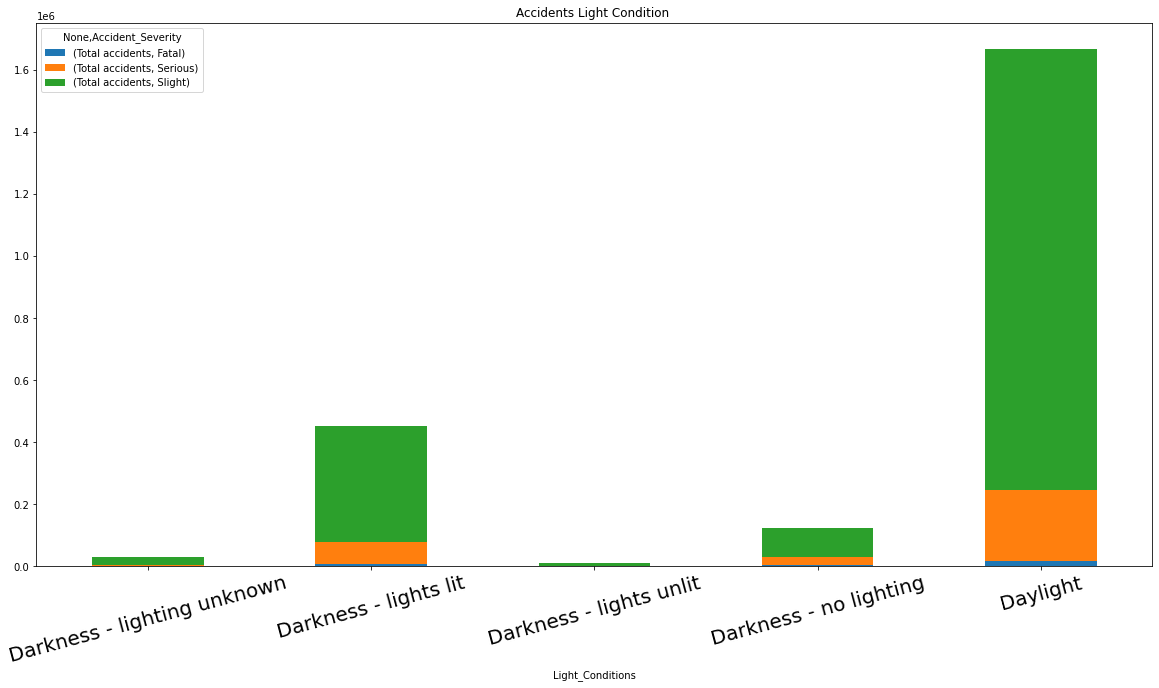

In [47]:
Accident_Information20052019_dfLight_Conditions.plot.bar(stacked=True,rot=15, title="Accidents Light Condition ",figsize=(20, 10))
plt.xticks(fontsize=20)


In [120]:
import pandas as pd
import matplotlib.pyplot as plt
Accident_Information20052019_dfLight_Conditions_df=Accident_Information20052019_dfLight_Conditions.toPandas()


Accident_Information20052019_dfLight_Conditions_dfindex=Accident_Information20052019_dfLight_Conditions_df.set_index('Light_Conditions')
Accident_Information20052019_dfLight_Conditions_dfindex3=Accident_Information20052019_dfLight_Conditions_dfindex
Accident_Information20052019_dfLight_Conditions_dfindex3

grouped = Accident_Information20052019_dfLight_Conditions_dfindex3.groupby(Accident_Information20052019_dfLight_Conditions_dfindex3.Accident_Severity)
Serious = grouped.get_group("Serious")
Serious=Serious["Total accidents"]
Serious=Serious.reset_index(drop=True)
Fatal = grouped.get_group("Fatal")
Fatal=Fatal["Total accidents"]
Fatal=Fatal.reset_index(drop=True)
Slight = grouped.get_group("Slight")
Slight=Slight["Total accidents"]
Slight=Slight.reset_index(drop=True)
Slight
Casulaty = pd.DataFrame({'period': ['Daylight', 'Darkness - lights lit', 'Darkness - lights unlit', 'Darkness - no lighting', 'Darkness - lighting unknown', 'Data missing or out of range'],
                   'Serious': Serious,
                   'Fatal': Fatal,
                   'Slight': Slight})
Casulaty
dflist=['Serious','Fatal','Slight']
Casulaty['Total_casualties']=Casulaty[dflist].sum(axis=1)

Casulaty_spark=spark.createDataFrame(Casulaty)
Casulaty_spark=Casulaty_spark.withColumn('KSI', Casulaty_spark[2]+Casulaty_spark[1])
Casulaty_spark=Casulaty_spark.withColumn('"%"KSI', (Casulaty_spark[5]/Casulaty_spark[4])*100)
Casulaty_spark_df=Casulaty_spark.toPandas()

Casulaty_spark_df

period   Serious  Fatal   Slight  Total_casualties  \
0                      Daylight  229762.0    234   375595          605591.0   
1         Darkness - lights lit   25689.0   6149       14           31852.0   
2       Darkness - lights unlit   71553.0   5521    93646          170720.0   
3        Darkness - no lighting    1947.0      1    25134           27082.0   
4   Darkness - lighting unknown    3975.0  17429  1420876         1442280.0   
5  Data missing or out of range       NaN    364     9538            9902.0   

        KSI     "%"KSI  
0  229996.0  37.978768  
1   31838.0  99.956047  
2   77074.0  45.146439  
3    1948.0   7.192970  
4   21404.0   1.484039  
5       NaN        NaN

In [48]:
Accident_Information20052019_df

DataFrame[Accident_Index: string, 1st_Road_Class: string, 1st_Road_Number: string, 2nd_Road_Class: string, 2nd_Road_Number: string, Accident_Severity: string, Carriageway_Hazards: string, Date: string, Day_of_Week: string, Did_Police_Officer_Attend_Scene_of_Accident: string, Junction_Control: string, Junction_Detail: string, Latitude: string, Light_Conditions: string, Local_Authority_(District): string, Local_Authority_(Highway): string, Location_Easting_OSGR: string, Location_Northing_OSGR: string, Longitude: string, LSOA_of_Accident_Location: string, Number_of_Casualties: string, Number_of_Vehicles: string, Pedestrian_Crossing-Human_Control: string, Pedestrian_Crossing-Physical_Facilities: string, Police_Force: string, Road_Surface_Conditions: string, Road_Type: string, Special_Conditions_at_Site: string, Speed_limit: string, Time: string, Urban_or_Rural_Area: string, Weather_Conditions: string, Year: int]

In [27]:
Accident_Information20052019_dfroadtype=Accident_Information20052019_df.withColumn(
    "Road_Type",
    when(
        col("Road_Type") == 1,
        "Roundabout"
    ).when(
        col("Road_Type") == 2,
        "One way street"
    ).when(
        col("Road_Type") == 3,
        "Dual carriageway"
    ).when(
        col("Road_Type") == 6,
        "Single carriageway"
    ).when(
        col("Road_Type") == 7,
        "Slip road"
    ).when(
        col("Road_Type") == 9,
        "Unknown"
    ).when(
        col("Road_Type") == 12,
        "One way street/Slip road"
    ).when(
        col("Road_Type") == -1,
        "Data missing or out of range"
    ).otherwise(col("Road_Type"))
)
/Users/Asfandyar/Desktop/uk/from1997.ipynb

In [28]:
dangeorusroadtype = Accident_Information20052019_dfroadtype.groupby('Accident_Severity','Road_Type').agg(F.count(Accident_Information20052019_dfroadtype.Accident_Index).alias('Total accidents'))
dangeorusroadtype.show()

+-----------------+--------------------+---------------+
|Accident_Severity|           Road_Type|Total accidents|
+-----------------+--------------------+---------------+
|            Fatal|           Slip road|            205|
|          Serious|           Slip road|           2494|
|           Slight|  Single carriageway|        1415946|
|           Slight|    Dual carriageway|         291262|
|           Slight|Data missing or o...|              1|
|            Fatal|             Unknown|            116|
|           Slight|             Unknown|          16850|
|            Fatal|          Roundabout|            471|
|           Slight|          Roundabout|         136061|
|           Slight|      One way street|          42377|
|          Serious|          Roundabout|          14675|
|           Slight|           Slip road|          22306|
|          Serious|             Unknown|           1965|
|            Fatal|      One way street|            328|
|            Fatal|  Single car

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
dangerousroad_df=dangeorusroadtype.toPandas()


dangerousroad_dfindex=dangerousroad_df.set_index('Road_Type')
dangerousroad_dfindex3=dangerousroad_dfindex
dangerousroad_dfindex3

grouped = dangerousroad_dfindex3.groupby(dangerousroad_dfindex3.Accident_Severity)
Serious = grouped.get_group("Serious")
Serious=Serious["Total accidents"]
Serious=Serious.reset_index(drop=True)
Fatal = grouped.get_group("Fatal")
Fatal=Fatal["Total accidents"]
Fatal=Fatal.reset_index(drop=True)
Slight = grouped.get_group("Slight")
Slight=Slight["Total accidents"]
Slight=Slight.reset_index(drop=True)
Slight
Casulaty = pd.DataFrame({'period': ['Slip road', 'One way street', 'Single carriageway','Dual carriageway', 'Roundabout','Unknown','Data missing or out of range'],
                   'Serious': Serious,
                   'Fatal': Fatal,
                   'Slight': Slight})
Casulaty
dflist=['Serious','Fatal','Slight']
Casulaty['Total_casualties']=Casulaty[dflist].sum(axis=1)

Casulaty_spark=spark.createDataFrame(Casulaty)
Casulaty_spark=Casulaty_spark.withColumn('KSI', Casulaty_spark[2]+Casulaty_spark[1])
Casulaty_spark=Casulaty_spark.withColumn('"%"KSI', (Casulaty_spark[5]/Casulaty_spark[4])*100)
Casulaty_spark_df=Casulaty_spark.toPandas()

Casulaty_spark_df

period   Serious    Fatal   Slight  Total_casualties  \
0                     Slip road    2494.0    205.0  1415946         1418645.0   
1                One way street   14675.0    116.0   291262          306053.0   
2            Single carriageway    1965.0    471.0        1            2437.0   
3              Dual carriageway   44225.0    328.0    16850           61403.0   
4                    Roundabout    6583.0  22595.0   136061          165239.0   
5                       Unknown  262984.0   5983.0    42377          311344.0   
6  Data missing or out of range       NaN      NaN    22306           22306.0   

        KSI     "%"KSI  
0    2699.0   0.190252  
1   14791.0   4.832823  
2    2436.0  99.958966  
3   44553.0  72.558344  
4   29178.0  17.658059  
5  268967.0  86.389010  
6       NaN        NaN

In [19]:
Accident_Information20052019_df=Accident_Information20052019_df.withColumn(
    "1st_Road_Class",
    when(
        col("1st_Road_Class") == 'Unclassified',
        "U"
    ).when(
        col("1st_Road_Class") == 'M',
        "Motorway"
    ).otherwise(col("1st_Road_Class"))
)

In [20]:
Accident_Information20052019_df
dangerousroad = Accident_Information20052019_df.groupby('Accident_Severity','1st_Road_Class').agg(F.count(Accident_Information20052019_df.Accident_Index).alias('Total accidents'))
dangerousroad.show()

+-----------------+--------------+---------------+
|Accident_Severity|1st_Road_Class|Total accidents|
+-----------------+--------------+---------------+
|           Slight|             C|         159036|
|            Fatal|          A(M)|            115|
|          Serious|             U|         100648|
|            Fatal|             A|          16630|
|           Slight|      Motorway|          75254|
|          Serious|             B|          45662|
|          Serious|             A|         149873|
|           Slight|          A(M)|           4717|
|          Serious|             C|          26768|
|           Slight|             A|         866728|
|            Fatal|      Motorway|           1534|
|           Slight|             B|         237083|
|          Serious|          A(M)|            657|
|           Slight|             U|         581985|
|          Serious|      Motorway|           9318|
|            Fatal|             B|           4079|
|            Fatal|            

In [24]:
#dangerousroad=dangerousroad.toPandas()
dangerousroad=dangerousroad.pivot(index ='1st_Road_Class', columns ='Accident_Severity')
dangerousroad


Total accidents                
Accident_Severity           Fatal Serious  Slight
1st_Road_Class                                   
A                           16630  149873  866728
A(M)                          115     657    4717
B                            4079   45662  237083
C                            2221   26768  159036
Motorway                     1534    9318   75254
U                            5119  100648  581985

In [30]:
dangerousroadd['total'] = dangerousroad['Accident_Severity']['Slight'].sum()  
dangerousroadd

KeyError: 'Accident_Severity'

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'A'),
  Text(1, 0, 'A(M)'),
  Text(2, 0, 'B'),
  Text(3, 0, 'C'),
  Text(4, 0, 'Motorway'),
  Text(5, 0, 'U')])

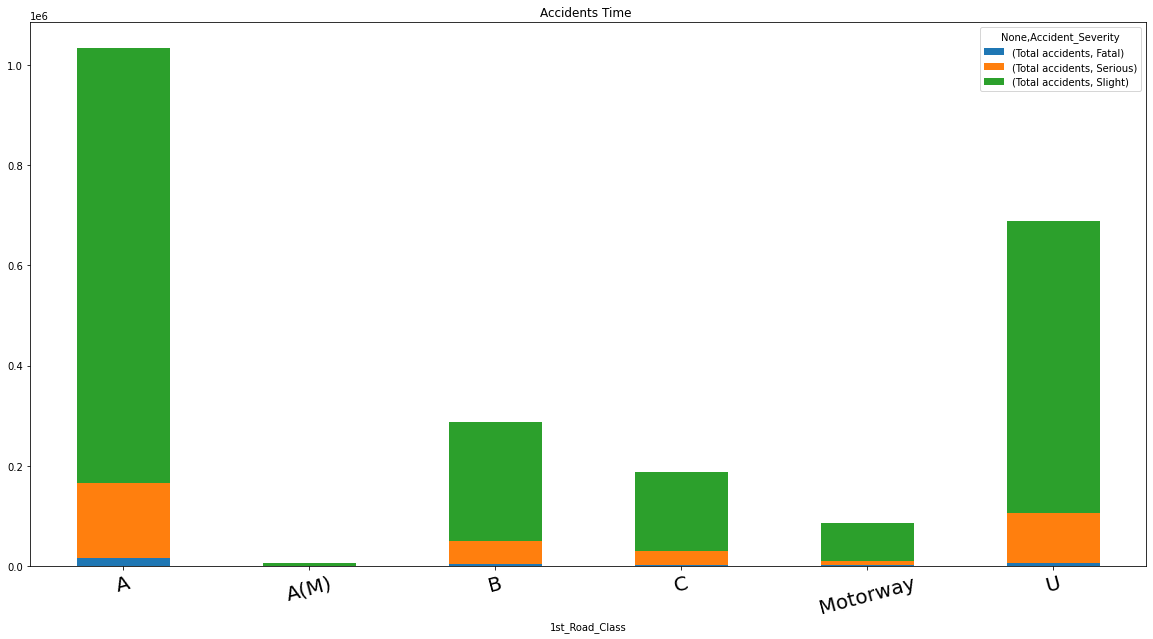

In [25]:
# Draw a vertical bar chart

dangerousroad.plot.bar(stacked=True,rot=15, title="Accidents Time ",figsize=(20, 10))
plt.xticks(fontsize=20)

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
dangerousroad_df=dangerousroad.toPandas()


dangerousroad_dfindex=dangerousroad_df.set_index('1st_Road_Class')
dangerousroad_dfindex3=dangerousroad_dfindex
dangerousroad_dfindex3

grouped = dangerousroad_dfindex3.groupby(dangerousroad_dfindex3.Accident_Severity)
Serious = grouped.get_group("Serious")
Serious=Serious["Total accidents"]
Serious=Serious.reset_index(drop=True)
Fatal = grouped.get_group("Fatal")
Fatal=Fatal["Total accidents"]
Fatal=Fatal.reset_index(drop=True)
Slight = grouped.get_group("Slight")
Slight=Slight["Total accidents"]
Slight=Slight.reset_index(drop=True)
Slight
Casulaty = pd.DataFrame({'period': ['A(M)', 'A', 'B','C','U','Motorway'],
                   'Serious': Serious,
                   'Fatal': Fatal,
                   'Slight': Slight})
Casulaty
dflist=['Serious','Fatal','Slight']
Casulaty['Total_casualties']=Casulaty[dflist].sum(axis=1)

Casulaty_spark=spark.createDataFrame(Casulaty)
Casulaty_spark=Casulaty_spark.withColumn('KSI', Casulaty_spark[2]+Casulaty_spark[1])
Casulaty_spark=Casulaty_spark.withColumn('"%"KSI', (Casulaty_spark[5]/Casulaty_spark[4])*100)
Casulaty_spark_df=Casulaty_spark.toPandas()

Casulaty_spark_df
#comherelater

period  Serious  Fatal  Slight  Total_casualties     KSI     "%"KSI
0      A(M)   100648    115  159036            259799  100763  38.784984
1         A    45662  16630   75254            137546   62292  45.288122
2         B   149873   1534    4717            156124  151407  96.978684
3         C    26768   4079  866728            897575   30847   3.436704
4         U      657   2221  237083            239961    2878   1.199362
5  Motorway     9318   5119  581985            596422   14437   2.420602

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
dangerousroad_df=dangerousroad.toPandas()


dangerousroad_dfindex=dangerousroad_df.set_index('1st_Road_Class')
dangerousroad_dfindex3=dangerousroad_dfindex
dangerousroad_dfindex3

grouped = dangerousroad_dfindex3.groupby(dangerousroad_dfindex3.Accident_Severity)
Serious = grouped.get_group("Serious")
Serious=Serious["Total accidents"]
Serious=Serious.reset_index(drop=True)
Fatal = grouped.get_group("Fatal")
Fatal=Fatal["Total accidents"]
Fatal=Fatal.reset_index(drop=True)
Slight = grouped.get_group("Slight")
Slight=Slight["Total accidents"]
Slight=Slight.reset_index(drop=True)
Slight
Casulaty = pd.DataFrame({'period': ['A(M)', 'A', 'B','C', 'M','U','Motorway'],
                   'Serious': Serious,
                   'Fatal': Fatal,
                   'Slight': Slight})
Casulaty
dflist=['Serious','Fatal','Slight']
Casulaty['Total_casualties']=Casulaty[dflist].sum(axis=1)

Casulaty_spark=spark.createDataFrame(Casulaty)
Casulaty_spark=Casulaty_spark.withColumn('KSI', Casulaty_spark[2]+Casulaty_spark[1])
Casulaty_spark=Casulaty_spark.withColumn('"%"KSI', (Casulaty_spark[5]/Casulaty_spark[4])*100)
Casulaty_spark_df=Casulaty_spark.toPandas()

Casulaty_spark_df
#comherelater

period  Serious  Fatal  Slight  Total_casualties     KSI     "%"KSI
0      A(M)   100648    115  159036            259799  100763  38.784984
1         A     1238  16630   68635             86503   17868  20.655931
2         B    45662   1356    4717             51735   47018  90.882381
3         C   149873    178  866728           1016779  150051  14.757484
4         M    26768   4079  237083            267930   30847  11.513082
5         U      657   2221    6619              9497    2878  30.304307
6  Motorway     8080   5119  581985            595184   13199   2.217634

In [54]:
DvrAge
resultage = Accidensev.join(DvrAge,on=['Accident_Index'])
resultage = resultage.groupby('Accident_Severity','Age_Band_of_Driver').agg(F.count(resultage.Accident_Index).alias('Total accidents'))
resultage.show()

+-----------------+--------------------+---------------+
|Accident_Severity|  Age_Band_of_Driver|Total accidents|
+-----------------+--------------------+---------------+
|           Slight|Data missing or o...|         304989|
|          Serious|          40Y to 70Y|         101012|
|            Fatal|          40Y to 70Y|          10720|
|           Slight|          40Y to 70Y|         620252|
|           Slight|            Upto 20Y|         280929|
|          Serious|            Upto 20Y|          45292|
|            Fatal|            Upto 20Y|           3828|
|          Serious|Data missing or o...|          32055|
|            Fatal|Data missing or o...|           1560|
|            Fatal|             Over 70|           1859|
|           Slight|          20Y to 40Y|        1074279|
|           Slight|             Over 70|          56391|
|          Serious|          20Y to 40Y|         159200|
|          Serious|             Over 70|          11763|
|            Fatal|          20

In [55]:
result = Accidensev.join(VECHTYPE,on=['Accident_Index'])
result = result.groupby('Accident_Severity','Vehicle_Type').agg(F.count(result.Accident_Index).alias('Total accidents'))
result.show()



+-----------------+--------------------+---------------+
|Accident_Severity|        Vehicle_Type|Total accidents|
+-----------------+--------------------+---------------+
|           Slight|               Goods|         192757|
|            Fatal|Agricultural vehicle|            309|
|            Fatal|        Ridden horse|             48|
|           Slight|         Pedal cycle|         171809|
|           Slight|Data missing or o...|            469|
|            Fatal|         Pedal cycle|           1441|
|           Slight|       Other vehicle|          21436|
|          Serious|                 Car|         202353|
|            Fatal|          Motorcycle|           5117|
|           Slight|          Motorcycle|         174054|
|          Serious|Data missing or o...|             59|
|            Fatal|                 Car|          18530|
|           Slight|        Ridden horse|           1031|
|            Fatal|Data missing or o...|             29|
|          Serious|            

In [56]:
Car_AS=result.filter(result.Vehicle_Type.contains("Pedal cycle")|result.Vehicle_Type.contains("Motorcycle")|result.Vehicle_Type.contains("Car")|result.Vehicle_Type.contains("Bus")|result.Vehicle_Type.contains("Goods"))
Car_AS.show()


+-----------------+------------+---------------+
|Accident_Severity|Vehicle_Type|Total accidents|
+-----------------+------------+---------------+
|           Slight|       Goods|         192757|
|           Slight| Pedal cycle|         171809|
|            Fatal| Pedal cycle|           1441|
|          Serious|         Car|         202353|
|            Fatal|  Motorcycle|           5117|
|           Slight|  Motorcycle|         174054|
|            Fatal|         Car|          18530|
|          Serious|         Bus|          10917|
|            Fatal|         Bus|           1157|
|          Serious| Pedal cycle|          32844|
|            Fatal|       Goods|           5259|
|          Serious|  Motorcycle|          61906|
|           Slight|         Car|        1388224|
|           Slight|         Bus|          80324|
|          Serious|       Goods|          29198|
+-----------------+------------+---------------+



In [57]:
result2 = Accidensev.join(DvrSex,on=['Accident_Index'])
result2 = result2.groupby('Accident_Severity','Sex_of_Driver').agg(F.count(result2.Accident_Index).alias('Total accidents'))
result2.show()


+-----------------+--------------------+---------------+
|Accident_Severity|       Sex_of_Driver|Total accidents|
+-----------------+--------------------+---------------+
|            Fatal|              Female|           6322|
|           Slight|Data missing or o...|             30|
|          Serious|Data missing or o...|              4|
|           Slight|                Male|        1272839|
|          Serious|              Unkown|          20700|
|            Fatal|Data missing or o...|              2|
|            Fatal|                Male|          21417|
|           Slight|              Unkown|         159819|
|          Serious|              Female|          83216|
|          Serious|                Male|         210294|
|            Fatal|              Unkown|           1078|
|           Slight|              Female|         701888|
+-----------------+--------------------+---------------+



In [68]:
Vehicle_factors=result.toPandas()
import pandas as pd
import matplotlib.pyplot as plt
Vechile_Severity=Vehicle_factors["Accident_Severity"]
Total_accidents=Vehicle_factors["Total accidents"]

Vehicle_factorsindex=Vehicle_factors.set_index('Accident_Severity')
Vehicle_factorsindex3=Vehicle_factorsindex[:3]

#Accident_Severitydfindex3.plot.bar(rot=4)
grouped = Vehicle_factors.groupby(Vehicle_factors.Accident_Severity)
Serious = grouped.get_group("Serious")
Serious=Serious["Total accidents"]
Serious=Serious.reset_index(drop=True)
Fatal = grouped.get_group("Fatal")
Fatal=Fatal["Total accidents"]
Fatal=Fatal.reset_index(drop=True)
Slight = grouped.get_group("Slight")
Slight=Slight["Total accidents"]
Slight=Slight.reset_index(drop=True)
Slight
Casulaty1 = pd.DataFrame({'period': ['Car'],
                   'Serious': Serious,
                   'Fatal': Fatal,
                   'Slight': Slight})
Casulaty1
dflist=['Serious','Fatal','Slight']
Casulaty1['Total_casualties']=Casulaty1[dflist].sum(axis=1)

Casulaty_spark1=spark.createDataFrame(Casulaty1)
Casulaty_spark1.show()
#Casulaty_spark1=Casulaty_spark1.withColumn('KSI', Casulaty_spark1[2]+Casulaty_spark1[1])
#Casulaty_spark_df=Casulaty_spark.toPandas()

#Casulaty_spark_df


ValueError: array length 1 does not match index length 9

In [59]:
Accident_Severity_Vech_df = Accident_Information20052019_df.groupby('Accident_Severity').agg(F.count(Accident_Information20052019_df.Accident_Index).alias('Total accidents'))


+-----------------+---------------+
|Accident_Severity|Total accidents|
+-----------------+---------------+
|           Slight|        1924803|
|            Fatal|          29698|
|          Serious|         332926|
+-----------------+---------------+



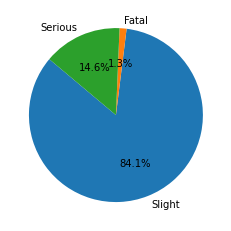

In [60]:
Accident_SeverityKSI_df = Accident_Information20052019_df.groupby('Accident_Severity').agg(F.count(Accident_Information20052019_df.Accident_Index).alias('Total accidents'))
#Accident_Severity_df.sort("Year").show(truncate=False)
Accident_SeverityKSI_df.show()
df2 = Accident_SeverityKSI_df.toPandas()
#Creating Visualization
fig = plt.pie(df2['Total accidents'], autopct='%1.1f%%', startangle=140,labels=df2['Accident_Severity'])
#plt.title('No of age group where lstat < 2')
plt.show()



In [61]:
Accident_Severity_df = Accident_Information20052019_df.groupby('Accident_Severity','Year').agg(F.count(Accident_Information20052019_df.Accident_Index).alias('Total accidents'))
Accident_Severity_df=Accident_Severity_df.sort("Year")
Accident_Severity_df.show(40)


+-----------------+----+---------------+
|Accident_Severity|Year|Total accidents|
+-----------------+----+---------------+
|          Serious|2005|          25029|
|            Fatal|2005|           2913|
|           Slight|2005|         170793|
|          Serious|2006|          24946|
|           Slight|2006|         161289|
|            Fatal|2006|           2926|
|          Serious|2007|          24322|
|            Fatal|2007|           2714|
|           Slight|2007|         155079|
|          Serious|2008|          23121|
|           Slight|2008|         145129|
|            Fatal|2008|           2341|
|           Slight|2009|         139500|
|          Serious|2009|          21997|
|            Fatal|2009|           2057|
|            Fatal|2010|           1731|
|          Serious|2010|          20440|
|           Slight|2010|         132243|
|          Serious|2011|          20986|
|            Fatal|2011|           1797|
|           Slight|2011|         128691|
|            Fat

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
Accident_Severitydf = Accident_Severity_df.toPandas()
#df.plot()
#display(plt.show())
Year=Accident_Severitydf["Year"]
Accident_Severity=Accident_Severitydf["Accident_Severity"]
Total_accidents=Accident_Severitydf["Total accidents"]
dddd=Accident_Severitydf[["Year","Accident_Severity"]]
dddd
##Accident_Severitydf.plot.bar(x='Year', y='Total accidents')
#dff =(dddd, index=Year)
#Accident_Severitydf.plot.bar(rot=0)

Accident_Severitydfindex=Accident_Severitydf.set_index('Year')
Accident_Severitydfindex3=Accident_Severitydfindex[:3]
Accident_Severitydfindex3
Accident_Severitydf
#Accident_Severitydfindex3.plot.bar(rot=4)
grouped = Accident_Severitydf.groupby(Accident_Severitydf.Accident_Severity)
Serious = grouped.get_group("Serious")
Serious=Serious["Total accidents"]
Serious=Serious.reset_index(drop=True)
Fatal = grouped.get_group("Fatal")
Fatal=Fatal["Total accidents"]
Fatal=Fatal.reset_index(drop=True)
Slight = grouped.get_group("Slight")
Slight=Slight["Total accidents"]
Slight=Slight.reset_index(drop=True)
Slight
Casulaty = pd.DataFrame({'period': [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,2013,2014,2015,2016,2017,2018,2019],
                   'Serious': Serious,
                   'Fatal': Fatal,
                   'Slight': Slight})
Casulaty
dflist=['Serious','Fatal','Slight']
Casulaty['Total_casualties']=Casulaty[dflist].sum(axis=1)

Casulaty_spark=spark.createDataFrame(Casulaty)
Casulaty_spark=Casulaty_spark.withColumn('KSI', Casulaty_spark[2]+Casulaty_spark[1])
Casulaty_spark_df=Casulaty_spark.toPandas()

Casulaty_spark_df



period  Serious  Fatal  Slight  Total_casualties    KSI
0     2005    25029   2913  170793            198735  27942
1     2006    24946   2926  161289            189161  27872
2     2007    24322   2714  155079            182115  27036
3     2008    23121   2341  145129            170591  25462
4     2009    21997   2057  139500            163554  24054
5     2010    20440   1731  132243            154414  22171
6     2011    20986   1797  128691            151474  22783
7     2012    20901   1637  123033            145571  22538
8     2013    19624   1608  117428            138660  21232
9     2014    20676   1658  123988            146322  22334
10    2015    20038   1616  118402            140056  21654
11    2016    21725   1695  113201            136621  23420
12    2017    22534   1676  105772            129982  24210
13    2018    23165   1671   97799            122635  24836
14    2019    23422   1658   92456            117536  25080

Text(0.5, 0, 'Year ')

<Figure size 648x216 with 0 Axes>

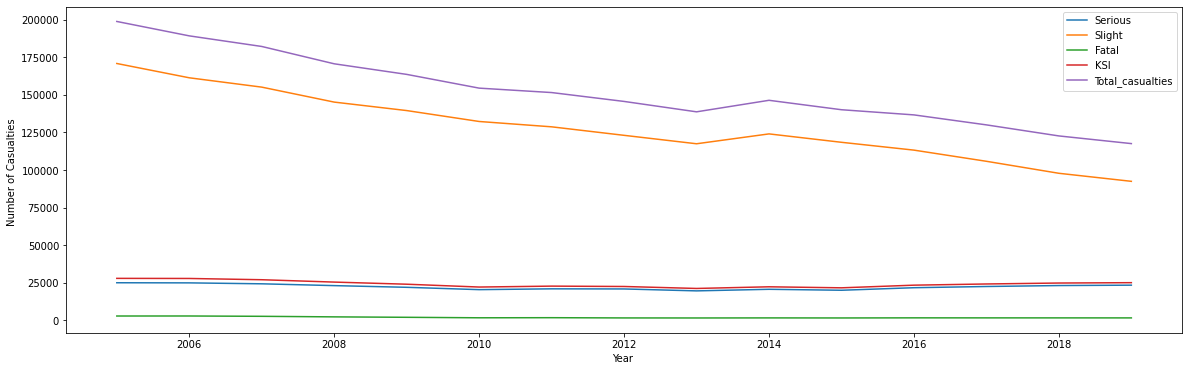

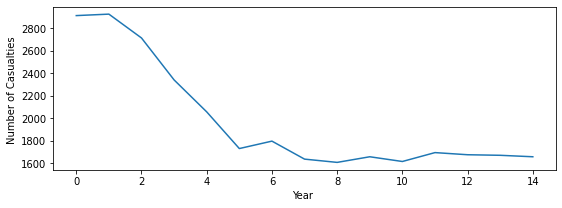

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 3))
Casulaty_spark_df[['period', 'Serious','Slight', 'Fatal','KSI','Total_casualties']].plot(x='period', kind='line',figsize=(20,6))
plt.ylabel('Number of Casualties ')
plt.xlabel('Year ')
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 3))
#, kind='line',figsize=(20,6)
Casulaty_spark_df['Fatal'].plot(x='period')
plt.ylabel('Number of Casualties ')
plt.xlabel('Year ')


In [ ]:
Accident_Information20052019_df

DataFrame[Accident_Index: string, 1st_Road_Class: string, 1st_Road_Number: string, 2nd_Road_Class: string, 2nd_Road_Number: string, Accident_Severity: string, Carriageway_Hazards: string, Date: string, Day_of_Week: string, Did_Police_Officer_Attend_Scene_of_Accident: string, Junction_Control: string, Junction_Detail: string, Latitude: string, Light_Conditions: string, Local_Authority_(District): string, Local_Authority_(Highway): string, Location_Easting_OSGR: string, Location_Northing_OSGR: string, Longitude: string, LSOA_of_Accident_Location: string, Number_of_Casualties: string, Number_of_Vehicles: string, Pedestrian_Crossing-Human_Control: string, Pedestrian_Crossing-Physical_Facilities: string, Police_Force: string, Road_Surface_Conditions: string, Road_Type: string, Special_Conditions_at_Site: string, Speed_limit: string, Time: string, Urban_or_Rural_Area: string, Weather_Conditions: string, Year: int]

In [33]:
Accident_Information20052019_df=Accident_Information20052019_df.withColumn(
    "Junction_Detail",
    when(
        col("Junction_Detail") == 0,
        "Not at or within 20 metres of junction"
    ).when(
        col("Junction_Detail") == 1,
        "Roundabout"
    ).when(
        col("Junction_Detail") == 2,
        "Mini-roundabout"
    ).
    when(
        col("Junction_Detail") == 3,
        "T or staggered junction"
    ).
    when(
        col("Junction_Detail") == 5,
        "Slip road"
    ).
    when(
        col("Junction_Detail") == 6,
        "Crossroads"
    ).
    when(
        col("Junction_Detail") == 7,
        "More than 4 arms (not roundabout)"
    ).
    when(
        col("Junction_Detail") == 8,
        "Private drive or entrance"
    ).
    when(
        col("Junction_Detail") == 9,
        "Other junction"
    ).
    when(
        col("Junction_Detail") == -1,
        "Data missing or out of range"
    ).otherwise(col("Junction_Detail")),
)

In [34]:
Junction_Detail_df= Accident_Information20052019_df.groupby('Junction_Detail').agg(F.count(Accident_Information20052019_df.Accident_Index).alias('Total accidents'))
Junction_Detail_df.sort("Total accidents").show(truncate=False)

#Junction_Detail_df.show


+--------------------------------------+---------------+
|Junction_Detail                       |Total accidents|
+--------------------------------------+---------------+
|Data missing or out of range          |2903           |
|Mini-roundabout                       |25668          |
|More than 4 arms (not roundabout)     |28617          |
|Slip road                             |33401          |
|Other junction                        |70008          |
|Private drive or entrance             |78274          |
|Not at or within 20 metres of junction|101069         |
|Roundabout                            |196371         |
|Crossroads                            |218926         |
|T or staggered junction               |704967         |
|Not at junction or within 20 metres   |827223         |
+--------------------------------------+---------------+



In [ ]:
Accident_Information20052019_df

DataFrame[Accident_Index: string, 1st_Road_Class: string, 1st_Road_Number: string, 2nd_Road_Class: string, 2nd_Road_Number: string, Accident_Severity: string, Carriageway_Hazards: string, Date: string, Day_of_Week: string, Did_Police_Officer_Attend_Scene_of_Accident: string, Junction_Control: string, Junction_Detail: string, Latitude: string, Light_Conditions: string, Local_Authority_(District): string, Local_Authority_(Highway): string, Location_Easting_OSGR: string, Location_Northing_OSGR: string, Longitude: string, LSOA_of_Accident_Location: string, Number_of_Casualties: string, Number_of_Vehicles: string, Pedestrian_Crossing-Human_Control: string, Pedestrian_Crossing-Physical_Facilities: string, Police_Force: string, Road_Surface_Conditions: string, Road_Type: string, Special_Conditions_at_Site: string, Speed_limit: string, Time: string, Urban_or_Rural_Area: string, Weather_Conditions: string, Year: int]

In [35]:
Junction_Detailyearly_df= Accident_Information20052019_df.groupby('Junction_Detail','Accident_Severity',).agg(F.count(Accident_Information20052019_df.Accident_Index).alias('Total accidents'))
Junction_Detailyearly_df.sort("Total accidents").show(truncate=False)

#Junction_Detail_df.show


+--------------------------------------+-----------------+---------------+
|Junction_Detail                       |Accident_Severity|Total accidents|
+--------------------------------------+-----------------+---------------+
|Data missing or out of range          |Fatal            |1              |
|Mini-roundabout                       |Fatal            |96             |
|Data missing or out of range          |Serious          |158            |
|More than 4 arms (not roundabout)     |Fatal            |177            |
|Slip road                             |Fatal            |480            |
|Roundabout                            |Fatal            |669            |
|Other junction                        |Fatal            |690            |
|Private drive or entrance             |Fatal            |770            |
|Crossroads                            |Fatal            |1636           |
|Not at or within 20 metres of junction|Fatal            |2118           |
|Mini-roundabout         

In [36]:
Junction_Detailwithbrack=Junction_Detailyearly_df.toPandas()
Junction_Detailwithbrack=Junction_Detailwithbrack.pivot(index ='Junction_Detail', columns ='Accident_Severity')
Junction_Detailwithbrack

Total accidents                
Accident_Severity                                Fatal Serious  Slight
Junction_Detail                                                       
Crossroads                                        1636   28086  189204
Data missing or out of range                         1     158    2744
Mini-roundabout                                     96    2678   22894
More than 4 arms (not roundabout)                  177    3551   24889
Not at junction or within 20 metres              16891  133816  676516
Not at or within 20 metres of junction            2118   21490   77461
Other junction                                     690    9562   59756
Private drive or entrance                          770   11266   66238
Roundabout                                         669   18574  177128
Slip road                                          480    3786   29135
T or staggered junction                           6170   99959  598838

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Crossroads'),
  Text(1, 0, 'Data missing or out of range'),
  Text(2, 0, 'Mini-roundabout'),
  Text(3, 0, 'More than 4 arms (not roundabout)'),
  Text(4, 0, 'Not at junction or within 20 metres'),
  Text(5, 0, 'Not at or within 20 metres of junction'),
  Text(6, 0, 'Other junction'),
  Text(7, 0, 'Private drive or entrance'),
  Text(8, 0, 'Roundabout'),
  Text(9, 0, 'Slip road'),
  Text(10, 0, 'T or staggered junction')])

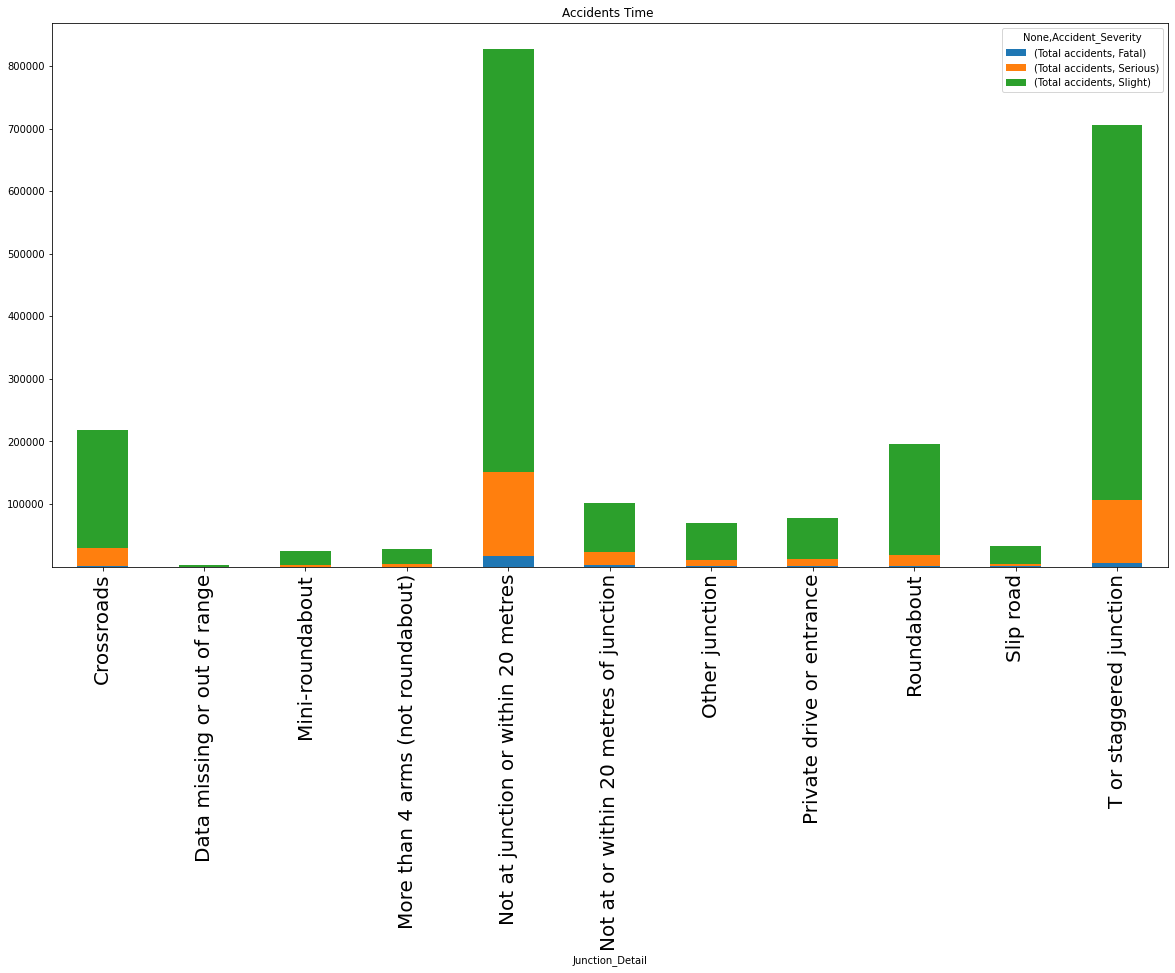

In [38]:
Junction_Detailwithbrack.plot.bar(stacked=True,rot=90, title="Accidents Time ",figsize=(20, 10))
plt.xticks(fontsize=20)

In [67]:

#Junction_Detailyearly_df = Junction_Detailyearly_df.toPandas()
#df.plot()
#display(plt.show())
Year=Junction_Detailyearly_df["Year"]
Junction_Detail=Junction_Detailyearly_df["Junction_Detail"]
Total_accidents=Accident_Severitydf["Total accidents"]
Junction_Detailyearly_dff=Junction_Detailyearly_df.toPandas()
grouped = Junction_Detailyearly_dff.groupby(Junction_Detailyearly_df.Junction_Detail)
J0 = grouped.get_group("Not at junction or within 20 metres")
J0=J0["Total accidents"]
J0=J0.reset_index(drop=True)
J1 = grouped.get_group("Roundabout")
J1=J1["Total accidents"]
J1=J1.reset_index(drop=True)
J2 = grouped.get_group("Mini-roundabout")
J2=J2["Total accidents"]
J2=J2.reset_index(drop=True)
J3 = grouped.get_group("T or staggered junction")
J3=J3["Total accidents"]
J3=J3.reset_index(drop=True)
J5= grouped.get_group("Slip road")
J5=J5["Total accidents"]
J5=J5.reset_index(drop=True)
J6 = grouped.get_group("Crossroads")
J6=J6["Total accidents"]
J6=J6.reset_index(drop=True)
J7 = grouped.get_group("More than 4 arms (not roundabout)")
J7=J7["Total accidents"]
J7=J7.reset_index(drop=True)
J8 = grouped.get_group("Private drive or entrance")
J8=J8["Total accidents"]
J8=J8.reset_index(drop=True)
J9 = grouped.get_group("Other junction")
J9=J9["Total accidents"]
J9=J9.reset_index(drop=True)
J11 = grouped.get_group("Data missing or out of range")
J11=J11["Total accidents"]
J11=J11.reset_index(drop=True)
JUNCTION = pd.DataFrame({'period': [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,2013,2014,2015,2016,2017,2018,2019],
                   'Not at junction or within 20 metres': J0,
                   'Roundabout': J1,
                   'Mini-roundabout': J2,
                   'T or staggered junction': J3,
                   'Slip road': J5,
                   'Crossroads': J6,
                   'not roundabout': J7,
                   'Private drive or entrance': J8,
                   'Other junction': J9,
                   'Data missing or out of range': J11})
JUNCTION
dflist=['Not at junction or within 20 metres',
                   'Roundabout',
                   'Mini-roundabout',
                   'T or staggered junction',
                   'Slip road',
                   'Crossroads',
                   'not roundabout',
                   'Private drive or entrance',
                   'Other junction',
                   'Data missing or out of range']
#JUNCTION[]=JUNCTION[dflist].sum(axis=1)

JUNCTION_spark=spark.createDataFrame(JUNCTION)
#JUNCTION_spark=JUNCTION_spark.withColumn('KSI', Casulaty_spark[2]+Casulaty_spark[1])
JUNCTION_spark=JUNCTION_spark.toPandas()

JUNCTION_spark

AttributeError: 'numpy.int32' object has no attribute '_get_object_id'

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
Junction_Detaildf = Junction_Detail_df.toPandas()
#df.plot()
#display(plt.show())
Junction_Detaildf.plot.bar(x='Junction_Detail', y='Total accidents')
Accident_SeverityDATEYEAR_df = Accident_Information20052019_df.groupby('Date','Year').agg(F.count(Accident_Information20052019_df.Accident_Index).alias('Total accidents')).sort('Date')
#Accident_SeverityDATEYEARrrrr_df=Accident_SeverityDATEYEAR_df.withColumn("timestamp",to_timestamp("Date"))
#Accident_SeverityDATEYEARrrrrmm_df = Accident_SeverityDATEYEARrrrr_df.withColumn('month',hour(Accident_Information_df.timestamp))


#Accident_SeverityDATEYEARrrrrmm_df.show(50)
Accident_SeverityDATEYEAR_df.show()


+----------+----+---------------+
|      Date|Year|Total accidents|
+----------+----+---------------+
|01/01/2018|2018|            234|
|01/01/2019|2019|            231|
|01/02/2018|2018|            408|
|01/02/2019|2019|            318|
|01/03/2018|2018|            231|
|01/03/2019|2019|            305|
|01/04/2018|2018|            225|
|01/04/2019|2019|            312|
|01/05/2018|2018|            342|
|01/05/2019|2019|            309|
|01/06/2018|2018|            330|
|01/06/2019|2019|            320|
|01/07/2018|2018|            322|
|01/07/2019|2019|            329|
|01/08/2018|2018|            313|
|01/08/2019|2019|            351|
|01/09/2018|2018|            328|
|01/09/2019|2019|            268|
|01/10/2018|2018|            382|
|01/10/2019|2019|            372|
+----------+----+---------------+
only showing top 20 rows



In [42]:
from pyspark.sql.functions import *
#Timestamp String to DateType
Accident_Information_df=Accident_Information20052019_df.withColumn("timestamp",to_timestamp("Date"))
#Accident_Information_df
TimeAccident_dfmonth = Accident_Information_df.withColumn('month',month(Accident_Information_df.timestamp))
TimeAccident_dfmonth.show()


+--------------+--------------+---------------+--------------+---------------+-----------------+-------------------+----------+-----------+-------------------------------------------+--------------------+--------------------+---------+--------------------+--------------------------+-------------------------+---------------------+----------------------+---------+-------------------------+--------------------+------------------+---------------------------------+---------------------------------------+-------------------+-----------------------+------------------+--------------------------+-----------+-----+-------------------+--------------------+----+-------------------+-----+
|Accident_Index|1st_Road_Class|1st_Road_Number|2nd_Road_Class|2nd_Road_Number|Accident_Severity|Carriageway_Hazards|      Date|Day_of_Week|Did_Police_Officer_Attend_Scene_of_Accident|    Junction_Control|     Junction_Detail| Latitude|    Light_Conditions|Local_Authority_(District)|Local_Authority_(Highway)|Locati

In [35]:

TimeAccident_dfmonth_weath=TimeAccident_dfmonth.withColumn(
    "month",
    when(
        col("month") == 1,
        "Winter"
    ).
    when(
        col("month") == 2,
        "Winter"
    ).
    when(
        col("month") == 12,
        "Winter"
    ).
    when(
        col("month") == 3,
        "Spring"
    ).
    when(
        col("month") == 4,
        "Spring"
    ).
    when(
        col("month") == 5,
        "Spring"
    ).
    when(
        col("month") == 6,
        "Summer"
    ).
    when(
        col("month") == 7,
        "Summer"
    ).
    when(
        col("month") == 8,
        "Summer"
    ).
    when(
        col("month") == 9,
        "Fall"
    ).
    when(
        col("month") == 11,
        "Winter"
    ).
    when(
        col("month") == 10,
        "Fall"
    ).otherwise(col("month")),
)

In [36]:
TimeAccident_dfmonth_weath

DataFrame[Accident_Index: string, 1st_Road_Class: string, 1st_Road_Number: string, 2nd_Road_Class: string, 2nd_Road_Number: string, Accident_Severity: string, Carriageway_Hazards: string, Date: string, Day_of_Week: string, Did_Police_Officer_Attend_Scene_of_Accident: string, Junction_Control: string, Junction_Detail: string, Latitude: string, Light_Conditions: string, Local_Authority_(District): string, Local_Authority_(Highway): string, Location_Easting_OSGR: string, Location_Northing_OSGR: string, Longitude: string, LSOA_of_Accident_Location: string, Number_of_Casualties: string, Number_of_Vehicles: string, Pedestrian_Crossing-Human_Control: string, Pedestrian_Crossing-Physical_Facilities: string, Police_Force: string, Road_Surface_Conditions: string, Road_Type: string, Special_Conditions_at_Site: string, Speed_limit: string, Time: string, Urban_or_Rural_Area: string, Weather_Conditions: string, Year: int, timestamp: timestamp, month: string]

In [33]:
TimeAccident_dfmonth_weath = TimeAccident_dfmonth_weath.groupby('Accident_Severity','month','Year').agg(F.count(TimeAccident_dfmonth_weath.Accident_Index).alias('Total_accidents'))
TimeAccident_dfmonth_weath.show()

+-----------------+------+----+---------------+
|Accident_Severity| month|Year|Total_accidents|
+-----------------+------+----+---------------+
|          Serious|Winter|2007|           7655|
|            Fatal|Winter|2012|            552|
|            Fatal|Winter|2010|            502|
|            Fatal|  Fall|2013|            299|
|          Serious|  Fall|2014|           3672|
|            Fatal|Summer|2017|            416|
|          Serious|Spring|2007|           6019|
|          Serious|  Fall|2015|           3573|
|           Slight|Spring|2007|          38315|
|           Slight|Spring|2016|          27459|
|          Serious|Spring|2006|           5781|
|           Slight|  Fall|2007|          26115|
|           Slight|Summer|2015|          30531|
|           Slight|Spring|2017|          25553|
|            Fatal|  Fall|2012|            274|
|           Slight|Summer|2016|          28134|
|            Fatal|Spring|2011|            433|
|            Fatal|Summer|2014|         

In [40]:


TimeAccident_dfmonth_weathslight=TimeAccident_dfmonth_weath.filter(TimeAccident_dfmonth_weath.Accident_Severity.contains("Slight"))
TimeAccident_dfmonth_weathslight = TimeAccident_dfmonth_weathslight.groupby('month').agg(F.count(TimeAccident_dfmonth_weathslight.Accident_Index).alias('Total_accidents'))

TimeAccident_dfmonth_weathslight.show()

TimeAccident_dfmonth_weathKSI=TimeAccident_dfmonth_weath.filter(TimeAccident_dfmonth_weath.Accident_Severity.contains("Fatal")|TimeAccident_dfmonth_weath.Accident_Severity.contains("Serious"))
TimeAccident_dfmonth_weathKSI = TimeAccident_dfmonth_weathKSI.groupby('month').agg(F.count(TimeAccident_dfmonth_weathKSI.Accident_Index).alias('Total_accidents'))

TimeAccident_dfmonth_weathKSI.show()


+------+---------------+
| month|Total_accidents|
+------+---------------+
|  null|         190255|
|Spring|         418586|
|Summer|         437905|
|  Fall|         304152|
|Winter|         573905|
+------+---------------+



+------+---------------+
| month|Total_accidents|
+------+---------------+
|  null|          49916|
|Spring|          75851|
|Summer|          82871|
|  Fall|          55863|
|Winter|          98123|
+------+---------------+



In [41]:
import pandas as pd
import matplotlib.pyplot as plt
TimeAccident_dfmonth_weathslight = TimeAccident_dfmonth_weathslight.toPandas()
TimeAccident_dfmonth_weathslight['Total_accidents %'] = (TimeAccident_dfmonth_weathslight['Total_accidents'] / TimeAccident_dfmonth_weathslight['Total_accidents'].sum()) * 100
TimeAccident_dfmonth_weathslight.plot.bar(x='month', y='Total_accidents %')
plt.xlabel("Speed_limit of Non Serious Accident")
plt.ylabel("Total_accidents %")

TimeAccident_dfmonth_weathKSI = TimeAccident_dfmonth_weathKSI.toPandas()
TimeAccident_dfmonth_weathKSI['Total_accidents %'] = (TimeAccident_dfmonth_weathKSI['Total_accidents'] / TimeAccident_dfmonth_weathKSI['Total_accidents'].sum()) * 100

TimeAccident_dfmonth_weathKSI.plot.bar(x='month', y='Total_accidents %')
plt.xlabel("Season")
plt.ylabel("Total_accidents %")


Text(0, 0.5, 'Total_accidents %')

In [45]:
TimeAccident_dfmonth

DataFrame[Accident_Index: string, 1st_Road_Class: string, 1st_Road_Number: string, 2nd_Road_Class: string, 2nd_Road_Number: string, Accident_Severity: string, Carriageway_Hazards: string, Date: string, Day_of_Week: string, Did_Police_Officer_Attend_Scene_of_Accident: string, Junction_Control: string, Junction_Detail: string, Latitude: string, Light_Conditions: string, Local_Authority_(District): string, Local_Authority_(Highway): string, Location_Easting_OSGR: string, Location_Northing_OSGR: string, Longitude: string, LSOA_of_Accident_Location: string, Number_of_Casualties: string, Number_of_Vehicles: string, Pedestrian_Crossing-Human_Control: string, Pedestrian_Crossing-Physical_Facilities: string, Police_Force: string, Road_Surface_Conditions: string, Road_Type: string, Special_Conditions_at_Site: string, Speed_limit: string, Time: string, Urban_or_Rural_Area: string, Weather_Conditions: string, Year: int, timestamp: timestamp, month: int]

In [75]:
TimeAccident_dfmonthly = TimeAccident_dfmonth.groupby('month','Accident_Severity').agg(F.count(TimeAccident_dfmonth.Accident_Index).alias('Total accidents'))
#TimeAccident_df= TimeAccident_df.withColumn('Time',F.col('Time').cast(IntegerType()))
TimeAccident_dfmonthly.printSchema()
TimeAccident_dfmonthly=TimeAccident_dfmonthly.sort("month")
TimeAccident_dfmonthly.show()


root
 |-- month: integer (nullable = true)
 |-- Accident_Severity: string (nullable = true)
 |-- Total accidents: long (nullable = false)



+-----+-----------------+---------------+
|month|Accident_Severity|Total accidents|
+-----+-----------------+---------------+
| null|            Fatal|           3329|
| null|           Slight|         190255|
| null|          Serious|          46587|
|    1|          Serious|          21716|
|    1|            Fatal|           2140|
|    1|           Slight|         141148|
|    2|           Slight|         130153|
|    2|          Serious|          20035|
|    2|            Fatal|           1875|
|    3|            Fatal|           1991|
|    3|          Serious|          22307|
|    3|           Slight|         139827|
|    4|            Fatal|           2032|
|    4|           Slight|         132877|
|    4|          Serious|          22409|
|    5|          Serious|          24934|
|    5|            Fatal|           2178|
|    5|           Slight|         145882|
|    6|          Serious|          25183|
|    6|           Slight|         146027|
+-----+-----------------+---------

In [76]:

TimeAccident_dfmonthly_new=TimeAccident_dfmonthly.withColumn(
    "month",
    when(
        col("month") == 1,
        "Jan"
    ).
    when(
        col("month") == 2,
        "Feb"
    ).
    when(
        col("month") == 3,
        "March"
    ).
    when(
        col("month") == 4,
        "April"
    ).
    when(
        col("month") == 5,
        "May"
    ).
    when(
        col("month") == 6,
        "June"
    ).
    when(
        col("month") == 7,
        "July"
    ).
    when(
        col("month") == 8,
        "August"
    ).
    when(
        col("month") == 9,
        "September"
    ).
    when(
        col("month") == 10,
        "October"
    ).
    when(
        col("month") == 11,
        "November"
    ).
    when(
        col("month") == 12,
        "December"
    ).otherwise(col("month")),
)

In [96]:
TimeAccident_dfmonthly_new=TimeAccident_dfmonthly.toPandas()
TimeAccident_dfmonthly_new=TimeAccident_dfmonthly_new.pivot(index ='month', columns ='Accident_Severity')
TimeAccident_dfmonthly_new

Total accidents                
Accident_Severity           Fatal Serious  Slight
month                                            
NaN                          3329   46587  190255
1.0                          2140   21716  141148
2.0                          1875   20035  130153
3.0                          1991   22307  139827
4.0                          2032   22409  132877
5.0                          2178   24934  145882
6.0                          2139   25183  146027
7.0                          2236   26248  151367
8.0                          2367   24698  140511
9.0                          2293   25538  148185
10.0                         2390   25642  155967
11.0                         2362   25278  159843
12.0                         2366   22351  142761

In [97]:
TimeAccident_dfmonthly_new['month1'] = month_name
TimeAccident_dfmonthly_new

Total accidents                     month1
Accident_Severity           Fatal Serious  Slight           
month                                                       
NaN                          3329   46587  190255       Null
1.0                          2140   21716  141148    January
2.0                          1875   20035  130153   February
3.0                          1991   22307  139827      March
4.0                          2032   22409  132877      April
5.0                          2178   24934  145882        May
6.0                          2139   25183  146027       June
7.0                          2236   26248  151367       July
8.0                          2367   24698  140511     August
9.0                          2293   25538  148185  September
10.0                         2390   25642  155967    October
11.0                         2362   25278  159843   November
12.0                         2366   22351  142761   December

In [101]:
TimeAccident_dfmonthly_new.plot.bar(stacked=True,rot=15, title="Accidents Time ",figsize=(20, 10),label=month_name)
plt.xticks(fontsize=20,label='month_name')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Null'),
  Text(1, 0, 'January'),
  Text(2, 0, 'February'),
  Text(3, 0, 'March'),
  Text(4, 0, 'April'),
  Text(5, 0, 'May'),
  Text(6, 0, 'June'),
  Text(7, 0, 'July'),
  Text(8, 0, 'August'),
  Text(9, 0, 'September'),
  Text(10, 0, 'October'),
  Text(11, 0, 'November'),
  Text(12, 0, 'December')])

In [48]:
TimeAccident_dfmonthly

Total accidents                
Accident_Severity           Fatal Serious  Slight
month                                            
NaN                          3329   46587  190255
1.0                          2140   21716  141148
2.0                          1875   20035  130153
3.0                          1991   22307  139827
4.0                          2032   22409  132877
5.0                          2178   24934  145882
6.0                          2139   25183  146027
7.0                          2236   26248  151367
8.0                          2367   24698  140511
9.0                          2293   25538  148185
10.0                         2390   25642  155967
11.0                         2362   25278  159843
12.0                         2366   22351  142761

In [65]:
month_name=['Null','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_name

['Null',
 'January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [51]:
month=TimeAccident_dfmonthly.toPandas()
month

month Accident_Severity  Total accidents
0     NaN            Slight           190255
1     NaN             Fatal             3329
2     NaN           Serious            46587
3     1.0            Slight           141148
4     1.0             Fatal             2140
5     1.0           Serious            21716
6     2.0           Serious            20035
7     2.0            Slight           130153
8     2.0             Fatal             1875
9     3.0             Fatal             1991
10    3.0           Serious            22307
11    3.0            Slight           139827
12    4.0            Slight           132877
13    4.0             Fatal             2032
14    4.0           Serious            22409
15    5.0            Slight           145882
16    5.0             Fatal             2178
17    5.0           Serious            24934
18    6.0            Slight           146027
19    6.0           Serious            25183
20    6.0             Fatal             2139
21    7.0           Serious            26248
22    7.0             Fatal             2236
23    7.0            Slight           151367
24    8.0            Slight           140511
25    8.0             Fatal             2367
26    8.0           Serious            24698
27    9.0            Slight           148185
28    9.0           Serious            25538
29    9.0             Fatal             2293
30   10.0             Fatal             2390
31   10.0            Slight           155967
32   10.0           Serious            25642
33   11.0             Fatal             2362
34   11.0           Serious            25278
35   11.0            Slight           159843
36   12.0            Slight           142761
37   12.0           Serious            22351
38   12.0             Fatal             2366

In [72]:
import matplotlib.pyplot as plt

y_ans_val = [val for val in TimeAccident_dfmonthly.select('Total accidents').collect()]
x_ts = [val for val in TimeAccident_dfmonthly.select('month').collect()]

plt.plot(x_ts, y_ans_val)

plt.ylabel('Total accidents')
plt.xlabel('Month')
#plt.title('ASN values for time')
plt.legend(['Accidents'], loc='upper left')

plt.show()


In [73]:
from pyspark.sql.functions import *
#Timestamp String to DateType
Accident_Information_df=Accident_Information_df.withColumn("timestamp",to_timestamp("Time"))
#Accident_Information_df
TimeAccident_dfhour = Accident_Information_df.withColumn('hour',hour(Accident_Information_df.timestamp))
TimeAccident_dfhour.show()
# Using Cast to convert TimestampType to DateType
#TimeAccident_df.withColumn('timestamp_string', \
#         to_timestamp('Time').cast('string')) \
#  .show(truncate=False)
Roadtype_df = Accident_Information_df.groupby('Road_Type').agg(F.count(Accident_Information_df.Accident_Index).alias('Total accidents')).sort("Total accidents")
Roadtype_df.show()


+--------------+--------------+---------------+--------------+---------------+-----------------+-------------------+----------+-----------+-------------------------------------------+--------------------+--------------------+---------+--------------------+--------------------------+-------------------------+---------------------+----------------------+---------+-------------------------+--------------------+------------------+---------------------------------+---------------------------------------+-------------------+-----------------------+------------------+--------------------------+-----------+-----+-------------------+--------------------+----+-------------------+----+
|Accident_Index|1st_Road_Class|1st_Road_Number|2nd_Road_Class|2nd_Road_Number|Accident_Severity|Carriageway_Hazards|      Date|Day_of_Week|Did_Police_Officer_Attend_Scene_of_Accident|    Junction_Control|     Junction_Detail| Latitude|    Light_Conditions|Local_Authority_(District)|Local_Authority_(Highway)|Locatio

+--------------------+---------------+
|           Road_Type|Total accidents|
+--------------------+---------------+
|Data missing or o...|              1|
|                   7|           3447|
|                   9|           4535|
|                   2|           6030|
|             Unknown|          14396|
|                   1|          14453|
|           Slip road|          21558|
|                   3|          38063|
|      One way street|          43258|
|          Roundabout|         136754|
|                   6|         173643|
|    Dual carriageway|         303407|
|  Single carriageway|        1527882|
+--------------------+---------------+



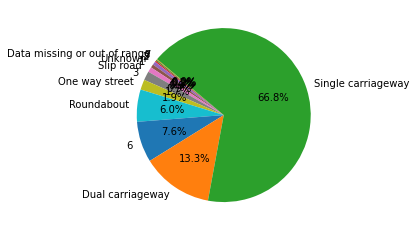

In [74]:
Roadtype = Roadtype_df.toPandas()
#Creating Visualization
fig = plt.pie(Roadtype['Total accidents'], autopct='%1.1f%%', startangle=140,labels=Roadtype['Road_Type'])
#plt.title('No of age group where lstat < 2')
plt.show()


In [21]:
Speed_df = Accident_Information_df.groupby('Speed_limit').agg(F.count(Accident_Information_df.Accident_Index).alias('Total accidents')).sort("Total accidents")
Speed_df=Speed_df.sort("Speed_limit")
Speed_df.show()
import pandas as pd
import matplotlib.pyplot as plt
Speed_df = Speed_df.toPandas()
#df.plot()
#display(plt.show())
Speed_df.plot.bar(x='Speed_limit', y='Total accidents')
plt.xlabel("Speed_limit of Serious Accident")
plt.ylabel("Total accidents")



+-----------+---------------+
|Speed_limit|Total accidents|
+-----------+---------------+
|          0|              1|
|         10|             19|
|         15|             16|
|         20|          38399|
|         30|        1306174|
|         40|         168357|
|         50|          69479|
|         60|         317469|
|         70|         147305|
|         NA|             37|
+-----------+---------------+



Text(0, 0.5, 'Total accidents')

In [19]:
Accident_Speed_Severity_df = Accident_Information_df.groupby('Accident_Severity','Speed_limit','Year').agg(F.count(Accident_Information_df.Accident_Index).alias('Total_accidents'))

Accident_Speed_Severity_df=Accident_Speed_Severity_df.sort("Speed_limit")
Accident_Speed_Severity_df=Accident_Speed_Severity_df.sort("Year")
Accident_Speed_Severity_df.show(60)
#Accident_Severitydf

CarAccidentfatal_dfslight=Accident_Information_df.filter(Accident_Information_df.Accident_Severity.contains("Slight"))
CarAccidentfatal_dfslight = CarAccidentfatal_dfslight.groupby('Speed_limit').agg(F.count(CarAccidentfatal_dfslight.Accident_Index).alias('Total_accidents')).sort("Speed_limit")

CarAccidentfatal_dfslight.show()

CarAccidentfatal_dfKSI=Accident_Information_df.filter(Accident_Information_df.Accident_Severity.contains("Fatal")|Accident_Information_df.Accident_Severity.contains("Serious"))
CarAccidentfatal_dfKSI = CarAccidentfatal_dfKSI.groupby('Speed_limit').agg(F.count(CarAccidentfatal_dfKSI.Accident_Index).alias('Total_accidents')).sort("Speed_limit")

CarAccidentfatal_dfKSI.show()



+-----------------+-----------+----+---------------+
|Accident_Severity|Speed_limit|Year|Total_accidents|
+-----------------+-----------+----+---------------+
|           Slight|         70|2005|          13084|
|            Fatal|         50|2005|            118|
|            Fatal|         10|2005|              1|
|           Slight|         30|2005|         110399|
|            Fatal|         70|2005|            394|
|           Slight|         20|2005|            841|
|            Fatal|         20|2005|              7|
|            Fatal|         40|2005|            239|
|            Fatal|         30|2005|            943|
|           Slight|         60|2005|          28573|
|          Serious|         10|2005|              1|
|            Fatal|         60|2005|           1211|
|          Serious|         50|2005|            664|
|           Slight|         40|2005|          13643|
|          Serious|         60|2005|           6136|
|          Serious|         20|2005|          

+-----------+---------------+
|Speed_limit|Total_accidents|
+-----------+---------------+
|          0|              1|
|         10|             14|
|         15|             15|
|         20|          32568|
|         30|        1130677|
|         40|         142139|
|         50|          57313|
|         60|         246181|
|         70|         125606|
|         NA|             34|
+-----------+---------------+



+-----------+---------------+
|Speed_limit|Total_accidents|
+-----------+---------------+
|         10|              5|
|         15|              1|
|         20|           5831|
|         30|         175497|
|         40|          26218|
|         50|          12166|
|         60|          71288|
|         70|          21699|
|         NA|              3|
+-----------+---------------+



Text(0, 0.5, 'Total_accidents %')

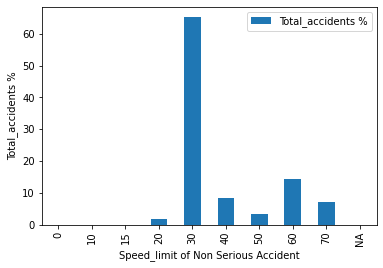

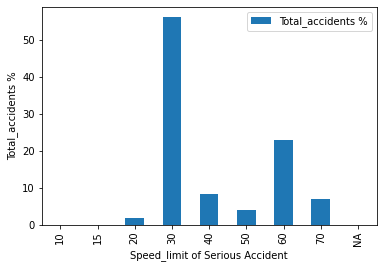

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
CarAccidentfatal_dfslight = CarAccidentfatal_dfslight.toPandas()
CarAccidentfatal_dfslight['Total_accidents %'] = (CarAccidentfatal_dfslight['Total_accidents'] / CarAccidentfatal_dfslight['Total_accidents'].sum()) * 100
CarAccidentfatal_dfslight.plot.bar(x='Speed_limit', y='Total_accidents %')
plt.xlabel("Speed_limit of Non Serious Accident")
plt.ylabel("Total_accidents %")

CarAccidentfatal_dfKSI = CarAccidentfatal_dfKSI.toPandas()
CarAccidentfatal_dfKSI['Total_accidents %'] = (CarAccidentfatal_dfKSI['Total_accidents'] / CarAccidentfatal_dfKSI['Total_accidents'].sum()) * 100

CarAccidentfatal_dfKSI.plot.bar(x='Speed_limit', y='Total_accidents %')
plt.xlabel("Speed_limit of Serious Accident")
plt.ylabel("Total_accidents %")


Text(0, 0.5, 'Total_accidents %')

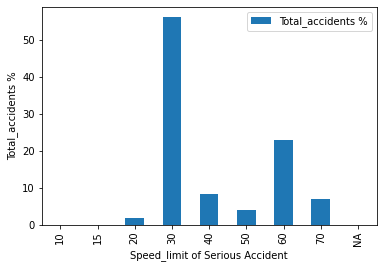

In [18]:
CarAccidentfatal_dfKSI.plot.bar(x='Speed_limit', y='Total_accidents %')
plt.xlabel("Speed_limit of Serious Accident")
plt.ylabel("Total_accidents %")

In [ ]:
Accident_Information_df

DataFrame[Accident_Index: string, 1st_Road_Class: string, 1st_Road_Number: string, 2nd_Road_Class: string, 2nd_Road_Number: string, Accident_Severity: string, Carriageway_Hazards: string, Date: string, Day_of_Week: string, Did_Police_Officer_Attend_Scene_of_Accident: string, Junction_Control: string, Junction_Detail: string, Latitude: string, Light_Conditions: string, Local_Authority_(District): string, Local_Authority_(Highway): string, Location_Easting_OSGR: string, Location_Northing_OSGR: string, Longitude: string, LSOA_of_Accident_Location: string, Number_of_Casualties: string, Number_of_Vehicles: string, Pedestrian_Crossing-Human_Control: string, Pedestrian_Crossing-Physical_Facilities: string, Police_Force: string, Road_Surface_Conditions: string, Road_Type: string, Special_Conditions_at_Site: string, Speed_limit: string, Time: string, Urban_or_Rural_Area: string, Weather_Conditions: string, Year: int, timestamp: timestamp]

In [78]:
Accident_Sex_Severity_df = Accident_Information_df.groupby('Accident_Severity','Year').agg(F.count(Accident_Information_df.Accident_Index).alias('Total_accidents'))

Accident_Speed_Severity_df=Accident_Speed_Severity_df.sort("Speed_limit")
Accident_Speed_Severity_df=Accident_Speed_Severity_df.sort("Year")
Accident_Speed_Severity_df.show(60)
#Accident_Severitydf
CarAccidentfatal_df=Accident_Speed_Severity_df.filter(Accident_Speed_Severity_df.Accident_Severity.contains("Fatal")).show()
#CarAccidentfatal_df = CarAccidentfatal_df.groupby('Accident_Severity','Speed_limit','Year').agg(F.count(CarAccidentfatal_df.Accident_Index).alias('Total_accidents'))


CarAccidentfatal_df=Accident_Information_df.filter(Accident_Information_df.Accident_Severity.contains("Fatal"))
CarAccidentfatal_df = CarAccidentfatal_df.groupby('Speed_limit').agg(F.count(CarAccidentfatal_df.Accident_Index).alias('Total_accidents')).sort("Speed_limit")

CarAccidentfatal_df.show()



+-----------------+-----------+----+---------------+
|Accident_Severity|Speed_limit|Year|Total_accidents|
+-----------------+-----------+----+---------------+
|          Serious|         20|2005|            124|
|          Serious|         50|2005|            664|
|           Slight|         70|2005|          13084|
|            Fatal|         50|2005|            118|
|            Fatal|         30|2005|            943|
|            Fatal|         40|2005|            239|
|            Fatal|         10|2005|              1|
|          Serious|         70|2005|           1822|
|            Fatal|         70|2005|            394|
|           Slight|         40|2005|          13643|
|            Fatal|         60|2005|           1211|
|           Slight|         20|2005|            841|
|            Fatal|         20|2005|              7|
|          Serious|         10|2005|              1|
|           Slight|         30|2005|         110399|
|           Slight|         60|2005|          

+-----------------+-----------+----+---------------+
|Accident_Severity|Speed_limit|Year|Total_accidents|
+-----------------+-----------+----+---------------+
|            Fatal|         40|2005|            239|
|            Fatal|         70|2005|            394|
|            Fatal|         10|2005|              1|
|            Fatal|         20|2005|              7|
|            Fatal|         30|2005|            943|
|            Fatal|         60|2005|           1211|
|            Fatal|         50|2005|            118|
|            Fatal|         30|2006|            909|
|            Fatal|         50|2006|            121|
|            Fatal|         70|2006|            384|
|            Fatal|         60|2006|           1204|
|            Fatal|         20|2006|             15|
|            Fatal|         40|2006|            293|
|            Fatal|         40|2007|            244|
|            Fatal|         60|2007|           1109|
|            Fatal|         50|2007|          

+-----------+---------------+
|Speed_limit|Total_accidents|
+-----------+---------------+
|         10|              3|
|         20|            304|
|         30|           9838|
|         40|           2828|
|         50|           1792|
|         60|          11106|
|         70|           3827|
+-----------+---------------+



+----+----------------------+--------------+--------------------------+
|Year|Total accidents of Car|Cars and Taxis|Accidents per billion mile|
+----+----------------------+--------------+--------------------------+
|2005|                280583|           244|        1149.9303278688524|
|2006|                266965|         246.9|        1081.2677197245848|
|2007|                254885|         247.3|         1030.671249494541|
|2008|                235996|         245.4|         961.6788916055419|
|2009|                226447|         244.8|         925.0285947712418|
|2010|                211934|         241.9|         876.1223646134766|
|2011|                203978|         244.3|         834.9488334015555|
|2012|                196651|         245.5|         801.0224032586558|
|2013|                185174|         246.6|         750.9083536090835|
|2014|                194997|         253.5|         769.2189349112426|
|2015|                188374|         258.1|         729.8488957

<AxesSubplot:xlabel='Year'>

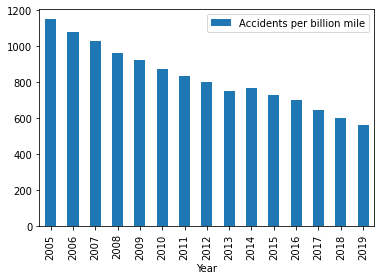

In [79]:
Billionvehiclemiles20052017Car_df=Billionvehiclemiles20052017_df.select(col("Year"),col("Cars and Taxis"))
resultcarperbill = CarAccidentovertheyeards_df.join(Billionvehiclemiles20052017Car_df, on=['Year'], how='left_outer').sort('Year')
resultcarperbill=resultcarperbill.withColumn('Accidents per billion mile', resultcarperbill[1]/resultcarperbill[2])
resultcarperbill.show()

resultcarperbillp = resultcarperbill.toPandas()
resultcarperbillp.plot.bar(x="Year", y="Accidents per billion mile")



+----+----------------------+---------------+--------------------------+
|Year|Total accidents of Bus|Buses & Coaches|Accidents per billion mile|
+----+----------------------+---------------+--------------------------+
|2005|                 11253|            3.2|                 3516.5625|
|2006|                 10185|            3.3|        3086.3636363636365|
|2007|                  9590|            3.4|        2820.5882352941176|
|2008|                  9325|            3.1|         3008.064516129032|
|2009|                  8661|            3.1|        2793.8709677419356|
|2010|                  8237|            3.2|                 2574.0625|
|2011|                  7988|              3|        2662.6666666666665|
|2012|                  7070|            2.8|                    2525.0|
|2013|                  6511|            2.9|        2245.1724137931037|
|2014|                  6705|            2.9|        2312.0689655172414|
|2015|                  5897|            2.8|      

<AxesSubplot:xlabel='Year'>

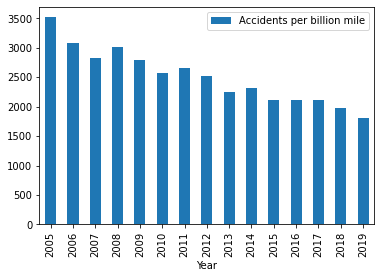

In [80]:
Billionvehiclemiles20052017Bus_df=Billionvehiclemiles20052017_df.select(col("Year"),col("Buses & Coaches"))
resultBusperbill=BusAccidentovertheyeards_df.join(Billionvehiclemiles20052017Bus_df, on=['Year'], how='left_outer').sort('Year')
#resultBusperbill.show()
resultBusperbill=resultBusperbill.withColumn('Accidents per billion mile', resultBusperbill[1]/resultBusperbill[2])
resultBusperbill.show()
resultBusperbillp = resultBusperbill.toPandas()
resultBusperbillp.plot.bar(x="Year", y="Accidents per billion mile")


+----+-----------------------------+-----------+
|Year|Total accidents of Motorcycle|Motorcycles|
+----+-----------------------------+-----------+
|2005|                        25870|        3.3|
|2006|                        24323|        3.2|
|2007|                        24381|        3.4|
|2008|                        22427|        3.1|
|2009|                        21590|        3.2|
|2010|                        19534|        2.9|
|2011|                        21069|        2.9|
|2012|                        20255|        2.9|
|2013|                        19694|        2.8|
|2014|                        21587|        2.9|
|2015|                        21218|        2.9|
|2016|                        20683|          3|
|2017|                        19440|          3|
|2018|                        18139|          3|
|2019|                        17619|          3|
+----+-----------------------------+-----------+



+----+-----------------------------+-----------+--------------------------+
|Year|Total accidents of Motorcycle|Motorcycles|Accidents per billion mile|
+----+-----------------------------+-----------+--------------------------+
|2005|                        25870|        3.3|          7839.39393939394|
|2006|                        24323|        3.2|                 7600.9375|
|2007|                        24381|        3.4|         7170.882352941177|
|2008|                        22427|        3.1|         7234.516129032258|
|2009|                        21590|        3.2|                  6746.875|
|2010|                        19534|        2.9|         6735.862068965517|
|2011|                        21069|        2.9|         7265.172413793103|
|2012|                        20255|        2.9|          6984.48275862069|
|2013|                        19694|        2.8|         7033.571428571429|
|2014|                        21587|        2.9|         7443.793103448276|
|2015|      

<AxesSubplot:xlabel='Year'>

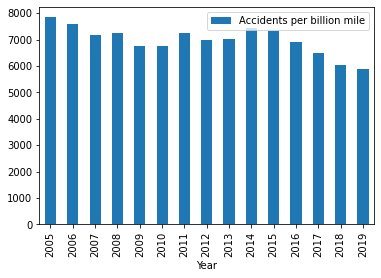

In [81]:
#MotorcycleAccidentovertheyeards_df
Billionvehiclemiles20052017Bycycle_df=Billionvehiclemiles20052017_df.select(col("Year"),col("Motorcycles")).sort("Year")
resultMCperbill=MotorcycleAccidentovertheyeards_df.join(Billionvehiclemiles20052017Bycycle_df, on=['Year'], how='left_outer').sort('Year')
resultMCperbill.show()
resultMCperbill=resultMCperbill.withColumn('Accidents per billion mile', resultMCperbill[1]/resultMCperbill[2])
resultMCperbill.show()
resultMCperbillp = resultMCperbill.toPandas()
resultMCperbillp.plot.bar(x="Year", y="Accidents per billion mile")


In [82]:
#Billionvehiclemiles20052017_df.show()
Totalmilesofgoods=Billionvehiclemiles20052017_df.select("Year","Light Commercial,Vehicles 1","Heavy Goods Vehicles 2")
Totalmilesofgoods=Totalmilesofgoods.withColumn('Total billion mile', Totalmilesofgoods[1]+Totalmilesofgoods[2])
Totalmilesofgoods.show()




Billionvehiclemiles20052017Goods_df=Totalmilesofgoods
resultGoodsperbilll=GoodsVechileAccidentovertheyeards_df.join(Billionvehiclemiles20052017Goods_df, on=['Year'], how='left_outer').sort('Year')


+----+---------------------------+----------------------+------------------+
|Year|Light Commercial,Vehicles 1|Heavy Goods Vehicles 2|Total billion mile|
+----+---------------------------+----------------------+------------------+
|2005|                       38.4|                    18|              56.4|
|2006|                       39.9|                    18|              57.9|
|2007|                       41.9|                  18.2|60.099999999999994|
|2008|                       41.6|                  17.8|59.400000000000006|
|2009|                       40.7|                  16.3|              57.0|
|2010|                       41.4|                  16.4|              57.8|
|2011|                         42|                    16|              58.0|
|2012|                       42.2|                  15.6|57.800000000000004|
|2013|                       43.8|                  15.8|59.599999999999994|
|2014|                       46.6|                  16.2|              62.8|

In [ ]:
resultGoodsperbilll.show()

+----+-------------------------------+---------------------------+----------------------+------------------+
|Year|Total accidents of GoodsVechile|Light Commercial,Vehicles 1|Heavy Goods Vehicles 2|Total billion mile|
+----+-------------------------------+---------------------------+----------------------+------------------+
|2005|                          28198|                       38.4|                    18|              56.4|
|2006|                          26929|                       39.9|                    18|              57.9|
|2007|                          25308|                       41.9|                  18.2|60.099999999999994|
|2008|                          22661|                       41.6|                  17.8|59.400000000000006|
|2009|                          20701|                       40.7|                  16.3|              57.0|
|2010|                          20481|                       41.4|                  16.4|              57.8|
|2011|             

+----+-------------------------------+---------------------------+----------------------+------------------+--------------------------+
|Year|Total accidents of GoodsVechile|Light Commercial,Vehicles 1|Heavy Goods Vehicles 2|Total billion mile|Accidents per billion mile|
+----+-------------------------------+---------------------------+----------------------+------------------+--------------------------+
|2005|                          28198|                       38.4|                    18|              56.4|         499.9645390070922|
|2006|                          26929|                       39.9|                    18|              57.9|        465.09499136442145|
|2007|                          25308|                       41.9|                  18.2|60.099999999999994|        421.09816971713815|
|2008|                          22661|                       41.6|                  17.8|59.400000000000006|        381.49831649831646|
|2009|                          20701|          

+----+--------------+---------------------------+----------------------+-----------+---------------+-------+------------------+-----------+
|Year|Cars and Taxis|Light Commercial,Vehicles 1|Heavy Goods Vehicles 2|Motorcycles|Buses & Coaches|Total 3|All motor vehicles|Pedal Cycle|
+----+--------------+---------------------------+----------------------+-----------+---------------+-------+------------------+-----------+
|2005|           244|                       38.4|                    18|        3.3|            3.2|    6.5|             306.9|        2.7|
|2006|         246.9|                       39.9|                    18|        3.2|            3.3|    6.5|             311.4|        2.8|
|2007|         247.3|                       41.9|                  18.2|        3.4|            3.4|    6.8|             314.1|        2.6|
|2008|         245.4|                       41.6|                  17.8|        3.1|            3.1|    6.3|               311|        2.8|
|2009|         244.8

+----+------------------------------+
|Year|Total accidents of Pedal Cycle|
+----+------------------------------+
|2007|                         16607|
|2018|                         18125|
|2015|                         19440|
|2006|                         16611|
|2013|                         20049|
|2014|                         21979|
|2019|                         17437|
|2012|                         19708|
|2009|                         17599|
|2016|                         19047|
|2005|                         17039|
|2010|                         17811|
|2011|                         19883|
|2008|                         16797|
|2017|                         18954|
+----+------------------------------+



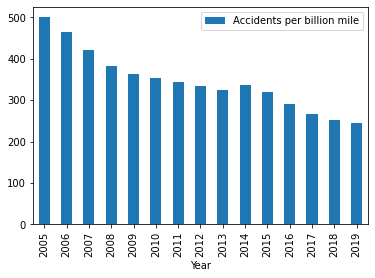

In [83]:
#resultBusperbill.show()
resultGoodsperbill=resultGoodsperbilll.withColumn('Accidents per billion mile', resultGoodsperbilll[1]/resultGoodsperbilll[4])
resultGoodsperbill.show()
resultGoodsperbillp = resultGoodsperbill.toPandas()
resultGoodsperbillp.plot.bar(x="Year", y="Accidents per billion mile")


Billionvehiclemiles20052017_df.show()
#Billionvehiclemiles20052017PedalCycle_df.show()
cycleAccidentovertheyeards_df.show()


+----+------------------------------+-----------+
|Year|Total accidents of Pedal Cycle|Pedal Cycle|
+----+------------------------------+-----------+
|2005|                         17039|        2.7|
|2006|                         16611|        2.8|
|2007|                         16607|        2.6|
|2008|                         16797|        2.8|
|2009|                         17599|          3|
|2010|                         17811|          3|
|2011|                         19883|        3.1|
|2012|                         19708|        3.1|
|2013|                         20049|        3.1|
|2014|                         21979|        3.5|
|2015|                         19440|        3.2|
|2016|                         19047|        3.2|
|2017|                         18954|        3.3|
|2018|                         18125|        3.3|
|2019|                         17437|        3.5|
+----+------------------------------+-----------+



+----+------------------------------+-----------+--------------------------+
|Year|Total accidents of Pedal Cycle|Pedal Cycle|Accidents per billion mile|
+----+------------------------------+-----------+--------------------------+
|2005|                         17039|        2.7|          6310.74074074074|
|2006|                         16611|        2.8|                    5932.5|
|2007|                         16607|        2.6|         6387.307692307692|
|2008|                         16797|        2.8|         5998.928571428572|
|2009|                         17599|          3|         5866.333333333333|
|2010|                         17811|          3|                    5937.0|
|2011|                         19883|        3.1|         6413.870967741936|
|2012|                         19708|        3.1|         6357.419354838709|
|2013|                         20049|        3.1|         6467.419354838709|
|2014|                         21979|        3.5|         6279.714285714285|

<AxesSubplot:xlabel='Year'>

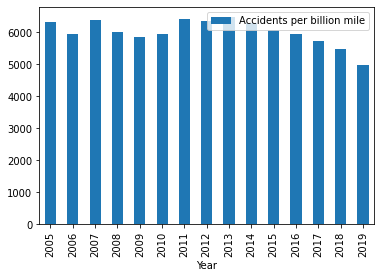

In [84]:
#MotorcycleAccidentovertheyeards_df
Billionvehiclemiles20052017PedalCycle_df=Billionvehiclemiles20052017_df.select(col("Year"),col("Pedal Cycle")).sort("Year")
resultBCperbill=cycleAccidentovertheyeards_df.join(Billionvehiclemiles20052017PedalCycle_df, on=['Year'], how='left_outer').sort('Year')
resultBCperbill.show()
resultBCperbill=resultBCperbill.withColumn('Accidents per billion mile', resultBCperbill[1]/resultBCperbill[2])
resultBCperbill.show()
resultBCperbillmm = resultBCperbill.toPandas()
resultBCperbillmm.plot.bar(x="Year", y="Accidents per billion mile")


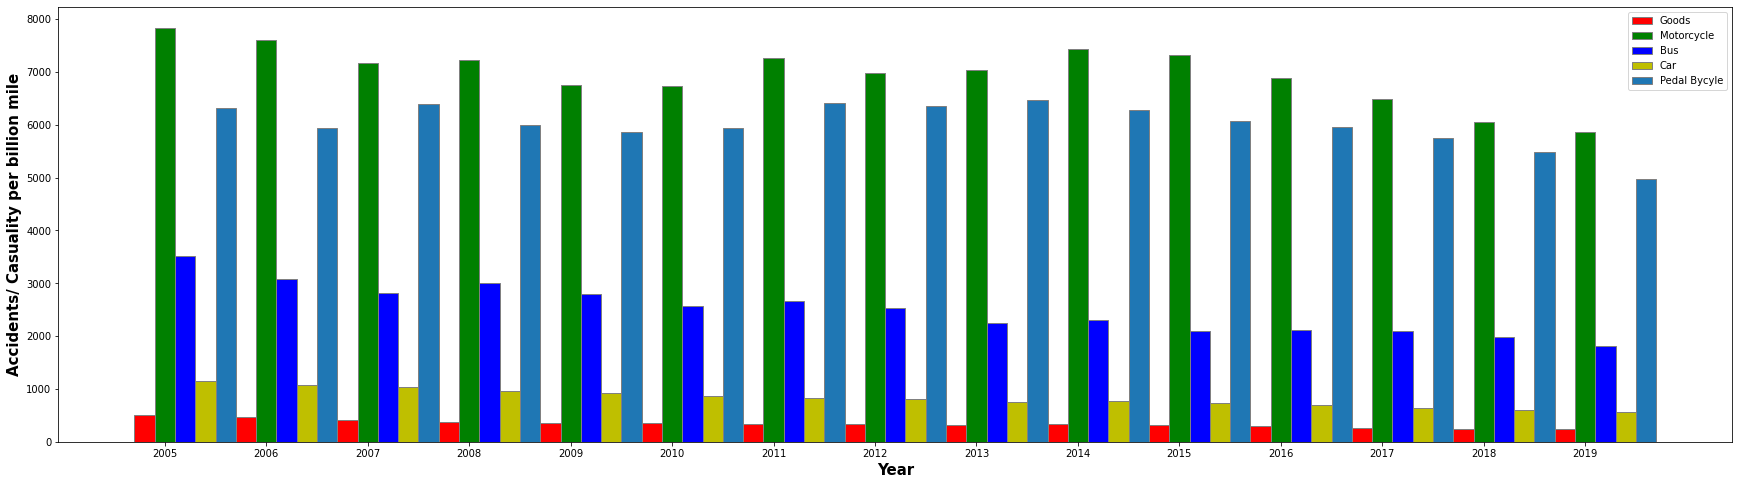

In [85]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.2
fig = plt.subplots(figsize =(30, 8))
 
# set height of bar
#resultGoodsperbillp.plot.bar(x="Year", y="Accidents per billion mile")
IT = resultGoodsperbillp["Accidents per billion mile"]
ECE = resultMCperbillp["Accidents per billion mile"]
CSE = resultBusperbillp["Accidents per billion mile"]
CAR = resultcarperbillp["Accidents per billion mile"]
by = resultBCperbillmm["Accidents per billion mile"]
# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
#resultcarperbillp
 
# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth,
        edgecolor ='grey', label ='Goods')
plt.bar(br2, ECE, color ='g', width = barWidth,
        edgecolor ='grey', label ='Motorcycle')
plt.bar(br3, CSE, color ='b', width = barWidth,
        edgecolor ='grey', label ='Bus')
plt.bar(br4, CAR, color ='y', width = barWidth,
        edgecolor ='grey', label ='Car')
plt.bar(br5, by, width = barWidth,
        edgecolor ='grey', label ='Pedal Bycyle')
 
 
# Adding Xticks
plt.xlabel('Year', fontweight ='bold', fontsize = 15)
plt.ylabel('Accidents/ Casuality per billion mile', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
        resultBusperbillp["Year"])
 
plt.legend()
plt.show()


In [86]:
Traffic_Information_df = spark.read.format('csv')\
            .option('header',True).option('escape','"')\
            .load('/Users/Asfandyar/Downloads/archive/dft_traffic_counts_raw_counts.csv')
Traffic_Information_df.show()

Roadname = Traffic_Information_df.groupby('road_name').agg(F.count(Traffic_Information_df.id).alias('Total Traffic'))
Roadname.show(1500)
from pyspark.sql.functions import concat, col, lit
Roadnamemodified=Roadname.withColumn('road_name_new_column', concat(Roadname.road_name.substr(1, 1),
                                   Roadname.road_name.substr(8, 1)))
Roadnamemodified.show(150)
Roadnamemodifiedtotal = Roadnamemodified.groupby('road_name_new_column').agg(F.sum(Roadnamemodified['Total Traffic']).alias('Total Traffic'))
Roadnamemodifiedtotal.show()



+---+--------------+-------------------+----+----------+----+---------+------------------+---------+-------------+---------+------------------------+----------------------+-------+--------+-----------+-----------+--------------+-----------------+--------+----+------------+--------------------------+--------------+-----------------+----+-----------------+-----------------+-------------------------+----------------------------+-----------------------+-----------------------+--------+------------------+
| id|count_point_id|direction_of_travel|year|count_date|hour|region_id|local_authority_id|road_name|road_category|road_type|start_junction_road_name|end_junction_road_name|easting|northing|   latitude|  longitude|link_length_km|link_length_miles|sequence|ramp|pedal_cycles|two_wheeled_motor_vehicles|cars_and_taxis|buses_and_coaches|lgvs|hgvs_2_rigid_axle|hgvs_3_rigid_axle|hgvs_4_or_more_rigid_axle|hgvs_3_or_4_articulated_axle|hgvs_5_articulated_axle|hgvs_6_articulated_axle|all_hgvs|all_moto

+---------+-------------+
|road_name|Total Traffic|
+---------+-------------+
|      A23|        10608|
|    A6010|         1488|
|     A736|          840|
|    A1009|          408|
|     A644|         1248|
|     A287|         1608|
|     A762|          144|
|    A2208|          480|
|    A1421|           96|
|     A197|          816|
|    A3044|          624|
|    A6089|          192|
|    A5137|          168|
|    B5231|          576|
|    A1192|           24|
|    B4283|           24|
|    B5157|           48|
|    B1099|           48|
|    B3191|           24|
|    B5129|          960|
|     A659|         1152|
|     A428|         4776|
|     A194|         1320|
|    A2211|          216|
|    B6165|          312|
|    B3048|          720|
|    B1112|          792|
|    B7018|          432|
|    A5460|          840|
|    A1039|          192|
|     A826|           48|
|     B251|          264|
|    B5132|          456|
|    B6104|          360|
|     B111|           24|
|    B1080| 

+---------+-------------+--------------------+
|road_name|Total Traffic|road_name_new_column|
+---------+-------------+--------------------+
|      A23|        10608|                   A|
|    A6010|         1488|                   A|
|     A736|          840|                   A|
|    A1009|          408|                   A|
|     A644|         1248|                   A|
|     A287|         1608|                   A|
|     A762|          144|                   A|
|    A2208|          480|                   A|
|    A1421|           96|                   A|
|     A197|          816|                   A|
|    A3044|          624|                   A|
|    A6089|          192|                   A|
|    A5137|          168|                   A|
|    B5231|          576|                   B|
|    A1192|           24|                   A|
|    B4283|           24|                   B|
|    B5157|           48|                   B|
|    B1099|           48|                   B|
|    B3191|  

+--------------------+-------------+
|road_name_new_column|Total Traffic|
+--------------------+-------------+
|                   B|       539088|
|                   M|       178572|
|                   U|      1308888|
|                   C|       606864|
|                   A|      1858428|
+--------------------+-------------+



In [87]:
from pyspark.sql.functions import concat, col, lit
RoadnameAA=Accident_Information_df.withColumn('1st_Road_Class', concat(Accident_Information_df['1st_Road_Class'].substr(1, 1),Accident_Information_df['1st_Road_Class'].substr(13, 1)))
#RoadnameAA.show(1500)
RoadnameAA = RoadnameAA.groupby('1st_Road_Class').agg(F.count(RoadnameAA.Accident_Index).alias('Total A'))
RoadnameAA = RoadnameAA.withColumn('Total A',F.col('Total A').cast(IntegerType()))


RoadnameAA.show(1500)
from pyspark.sql.functions import concat, col, lit
RoadnameAA=RoadnameAA.withColumn('road_name_new_column', concat(RoadnameAA['1st_Road_Class'].substr(1, 1),RoadnameAA['1st_Road_Class'].substr(13, 1)))
RoadnameAA.show(1500)
TrafficCar=Traffic_Information_df.filter(Traffic_Information_df.year<2020)
TrafficCar=TrafficCar.filter(TrafficCar.year>2004)
TrafficCar = TrafficCar.groupby('year').agg(F.sum('cars_and_taxis').alias('Total Car Traffic')).sort('Year')
TrafficCar.show()

+--------------+-------+
|1st_Road_Class|Total A|
+--------------+-------+
|             B| 286824|
|             M|  86106|
|             U| 687752|
|             C| 188025|
|             A|1038720|
+--------------+-------+



+--------------+-------+--------------------+
|1st_Road_Class|Total A|road_name_new_column|
+--------------+-------+--------------------+
|             B| 286824|                   B|
|             M|  86106|                   M|
|             U| 687752|                   U|
|             C| 188025|                   C|
|             A|1038720|                   A|
+--------------+-------+--------------------+



+----+-----------------+
|year|Total Car Traffic|
+----+-----------------+
|2005|      9.2766517E7|
|2006|      9.7602126E7|
|2007|      9.6845918E7|
|2008|     1.05637815E8|
|2009|     1.17599098E8|
|2010|     1.02291226E8|
|2011|      8.4719961E7|
|2012|      8.9234522E7|
|2013|      8.6574897E7|
|2014|      7.4808552E7|
|2015|      7.4801088E7|
|2016|      5.9471537E7|
|2017|      8.4906251E7|
|2018|      6.3794973E7|
|2019|      8.7997293E7|
+----+-----------------+



In [88]:
TrafficMotorbike=Traffic_Information_df.filter(Traffic_Information_df.year<2020)
TrafficMotorbike=TrafficMotorbike.filter(TrafficMotorbike.year>2004)
TrafficMotorbike = TrafficMotorbike.groupby('year').agg(F.sum('two_wheeled_motor_vehicles').alias('Total motor_vehicles Traffic')).sort('Year')
TrafficMotorbike.show()


+----+----------------------------+
|year|Total motor_vehicles Traffic|
+----+----------------------------+
|2005|                   1115317.0|
|2006|                   1168934.0|
|2007|                   1138034.0|
|2008|                   1315257.0|
|2009|                   1507060.0|
|2010|                   1273367.0|
|2011|                    950644.0|
|2012|                    958121.0|
|2013|                    967069.0|
|2014|                    784029.0|
|2015|                    856466.0|
|2016|                    666533.0|
|2017|                    853334.0|
|2018|                    771576.0|
|2019|                    804999.0|
+----+----------------------------+



In [89]:
TrafficBus=Traffic_Information_df.filter(Traffic_Information_df.year<2020)
TrafficBus=TrafficBus.filter(TrafficBus.year>2004)
TrafficBus = TrafficBus.groupby('year').agg(F.sum('buses_and_coaches').alias('Total buses_and_coaches Traffic')).sort('Year')
TrafficBus.show()


+----+-------------------------------+
|year|Total buses_and_coaches Traffic|
+----+-------------------------------+
|2005|                      1362999.0|
|2006|                      1508627.0|
|2007|                      1384637.0|
|2008|                      1571692.0|
|2009|                      1691613.0|
|2010|                      1296666.0|
|2011|                      1033484.0|
|2012|                      1072480.0|
|2013|                      1069725.0|
|2014|                       737729.0|
|2015|                       755523.0|
|2016|                       737774.0|
|2017|                       897009.0|
|2018|                       916189.0|
|2019|                       849027.0|
+----+-------------------------------+



In [90]:
TrafficGoods=Traffic_Information_df.filter(Traffic_Information_df.year<2020)
TrafficGoods=TrafficGoods.filter(TrafficGoods.year>2004)
TrafficGoods = TrafficGoods.groupby('year').agg(F.sum('all_hgvs').alias('Total Goods Traffic')).sort('Year')
TrafficGoods.show()


+----+-------------------+
|year|Total Goods Traffic|
+----+-------------------+
|2005|          8607455.0|
|2006|          9318097.0|
|2007|          9018842.0|
|2008|          8991471.0|
|2009|          8687451.0|
|2010|          8615195.0|
|2011|          7251054.0|
|2012|          7666973.0|
|2013|          7129170.0|
|2014|          6949892.0|
|2015|          7157127.0|
|2016|          4232998.0|
|2017|          6439283.0|
|2018|          3744201.0|
|2019|          7066061.0|
+----+-------------------+



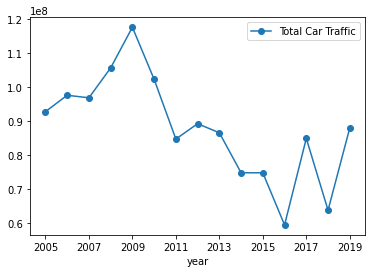

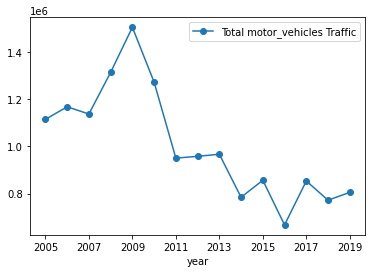

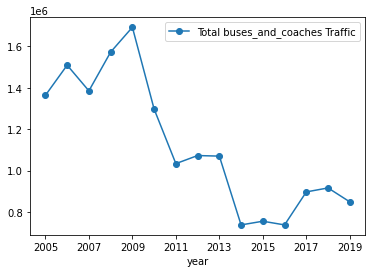

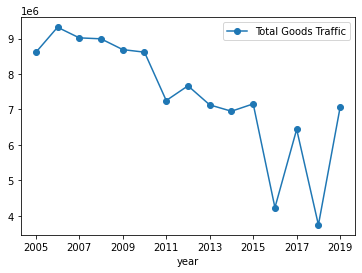

In [91]:
TrafficCar_df = TrafficCar.toPandas()
TrafficMotorbike_df=TrafficMotorbike.toPandas()
TrafficBus_df=TrafficBus.toPandas()
TrafficGoods_df=TrafficGoods.toPandas()
#display(plt.show())
TrafficCar_df.plot(x='year', y='Total Car Traffic',marker='o')
TrafficMotorbike_df.plot(x='year', y='Total motor_vehicles Traffic',marker='o')
TrafficBus_df.plot(x='year', y='Total buses_and_coaches Traffic',marker='o')
TrafficGoods_df.plot(x='year', y='Total Goods Traffic',marker='o')

plt.show()


In [92]:
#Trafficeeachyear = Traffic_Information_df.groupby('road_name').agg(F.count(Traffic_Information_df.id).alias('Total Traffic'))
#Trafficeeachyear.show(1500)
from pyspark.sql.functions import concat, col, lit
Trafficeeachyear=Traffic_Information_df.withColumn('road_name_new_column', concat(Traffic_Information_df.road_name.substr(1, 1),Traffic_Information_df.road_name.substr(8, 1)))
Trafficeeachyear=Trafficeeachyear.filter(Trafficeeachyear.year<2020)
#Trafficeeachyear=Trafficeeachyear.filter(Trafficeeachyear.year>2004)
Trafficeeachyear.show(150)



+---+--------------+-------------------+----+----------+----+---------+------------------+---------+-------------+---------+------------------------+----------------------+-------+--------+-----------+-----------+--------------+-----------------+--------+----+------------+--------------------------+--------------+-----------------+----+-----------------+-----------------+-------------------------+----------------------------+-----------------------+-----------------------+--------+------------------+--------------------+
| id|count_point_id|direction_of_travel|year|count_date|hour|region_id|local_authority_id|road_name|road_category|road_type|start_junction_road_name|end_junction_road_name|easting|northing|   latitude|  longitude|link_length_km|link_length_miles|sequence|ramp|pedal_cycles|two_wheeled_motor_vehicles|cars_and_taxis|buses_and_coaches|lgvs|hgvs_2_rigid_axle|hgvs_3_rigid_axle|hgvs_4_or_more_rigid_axle|hgvs_3_or_4_articulated_axle|hgvs_5_articulated_axle|hgvs_6_articulated_a

In [93]:
Trafficeeachyear_df = Trafficeeachyear.groupby('road_name_new_column','year').agg(F.sum(Trafficeeachyear.all_motor_vehicles).alias('Total_Traffic')).sort('year')
Trafficeeachyear_df.show()
#Trafficeeachyearrr_df = Trafficeeachyear.groupby('road_name_new_column','year').
A=Trafficeeachyear_df.filter(Trafficeeachyear_df.road_name_new_column.contains("A")).toPandas()
B=Trafficeeachyear_df.filter(Trafficeeachyear_df.road_name_new_column.contains("B")).toPandas()
C=Trafficeeachyear_df.filter(Trafficeeachyear_df.road_name_new_column.contains("C")).toPandas()
M=Trafficeeachyear_df.filter(Trafficeeachyear_df.road_name_new_column.contains("M")).toPandas()
U=Trafficeeachyear_df.filter(Trafficeeachyear_df.road_name_new_column.contains("U")).toPandas()
U
#BusAccident_df=Vehicle_Information_df.filter(Vehicle_Information_df.Vehicle_Type.contains("bus")|Vehicle_Information_df.Vehicle_Type.contains("Bus"))



+--------------------+----+-------------+
|road_name_new_column|year|Total_Traffic|
+--------------------+----+-------------+
|                   C|2000|    2110295.0|
|                   U|2000|    2341215.0|
|                   B|2000|    2957168.0|
|                   M|2000|  3.1670389E7|
|                   A|2000|  9.0800748E7|
|                   B|2001|    3280136.0|
|                   U|2001|    2339426.0|
|                   A|2001|  9.9314421E7|
|                   M|2001|  3.1703444E7|
|                   C|2001|    2263570.0|
|                   M|2002|  2.9488912E7|
|                   C|2002|    2366815.0|
|                   A|2002|  9.5485006E7|
|                   U|2002|    2415006.0|
|                   B|2002|    3722732.0|
|                   M|2003|  2.6506861E7|
|                   A|2003|  8.7778804E7|
|                   B|2003|    5249863.0|
|                   U|2003|    8329385.0|
|                   C|2003|    4100266.0|
+--------------------+----+-------

road_name_new_column  year  Total_Traffic
0                     U  2000      2341215.0
1                     U  2001      2339426.0
2                     U  2002      2415006.0
3                     U  2003      8329385.0
4                     U  2004      8312359.0
5                     U  2005      7369477.0
6                     U  2006      8209734.0
7                     U  2007      7824099.0
8                     U  2008     10962590.0
9                     U  2009     10734396.0
10                    U  2010      2739797.0
11                    U  2011      2691316.0
12                    U  2012      2673956.0
13                    U  2013      2638774.0
14                    U  2014      2590397.0
15                    U  2015      2572862.0
16                    U  2016      2444829.0
17                    U  2017      2552781.0
18                    U  2018      8770359.0
19                    U  2019      7501575.0

In [95]:
from pyspark.sql.functions import concat, col, lit
Accidenteeachyearwrtroad=Accident_Information20052019_df.withColumn('road_name_new_column', concat(Accident_Information20052019_df['1st_Road_Class'].substr(1, 1),Accident_Information20052019_df['1st_Road_Class'].substr(13, 1)))
#Trafficeeachyear=Trafficeeachyear.filter(Trafficeeachyear.year<2017)
#Trafficeeachyear=Trafficeeachyear.filter(Trafficeeachyear.year>2004)
#Accidenteeachyearwrtroad.show(150)
Accidenteeachyearwrtroad = Accidenteeachyearwrtroad.groupby('road_name_new_column','Year').agg(F.count(Accidenteeachyearwrtroad.Accident_Index).alias('Total_Accident')).sort('Year')
Accidenteeachyearwrtroad.show(150)


+--------------------+----+--------------+
|road_name_new_column|Year|Total_Accident|
+--------------------+----+--------------+
|                   M|2005|          8198|
|                   C|2005|         16500|
|                   B|2005|         24991|
|                   U|2005|         60026|
|                   A|2005|         89020|
|                   B|2006|         23826|
|                   C|2006|         16615|
|                   M|2006|          7920|
|                   U|2006|         56291|
|                   A|2006|         84509|
|                   B|2007|         23292|
|                   M|2007|          7488|
|                   U|2007|         53284|
|                   C|2007|         16247|
|                   A|2007|         81804|
|                   A|2008|         77266|
|                   U|2008|         49140|
|                   M|2008|          6822|
|                   C|2008|         15600|
|                   B|2008|         21763|
|          

In [96]:
A=Accidenteeachyearwrtroad.filter(Accidenteeachyearwrtroad.road_name_new_column.contains("A")).toPandas()
B=Accidenteeachyearwrtroad.filter(Accidenteeachyearwrtroad.road_name_new_column.contains("B")).toPandas()
C=Accidenteeachyearwrtroad.filter(Accidenteeachyearwrtroad.road_name_new_column.contains("C")).toPandas()
M=Accidenteeachyearwrtroad.filter(Accidenteeachyearwrtroad.road_name_new_column.contains("M")).toPandas()
U=Accidenteeachyearwrtroad.filter(Accidenteeachyearwrtroad.road_name_new_column.contains("U")).toPandas()


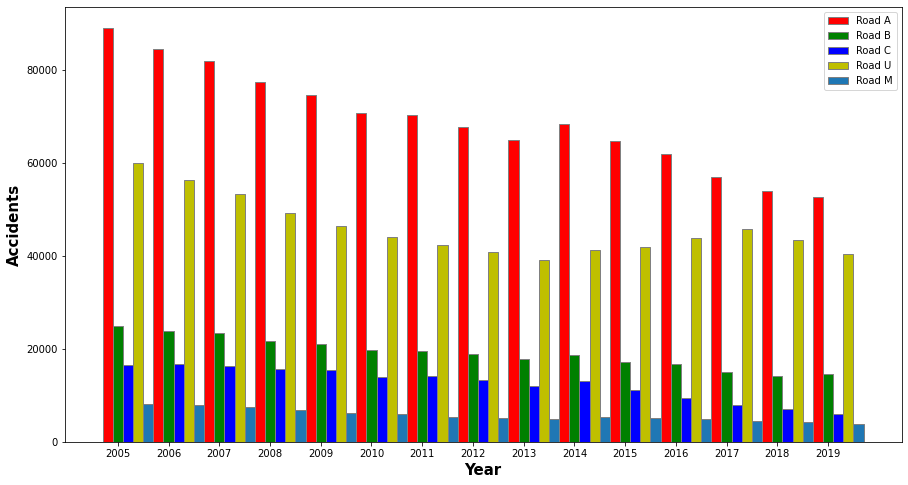

In [97]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.2
fig = plt.subplots(figsize =(15, 8))
 
# set height of bar
#resultGoodsperbillp.plot.bar(x="Year", y="Accidents per billion mile")
IT = A["Total_Accident"]
ECE = B["Total_Accident"]
CAC = C["Total_Accident"]
CSE = M["Total_Accident"]
CAR = U["Total_Accident"]

# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
 
# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth,
        edgecolor ='grey', label ='Road A')
plt.bar(br2, ECE, color ='g', width = barWidth,
        edgecolor ='grey', label ='Road B')
plt.bar(br3, CAC, color ='b', width = barWidth,
        edgecolor ='grey', label ='Road C')
plt.bar(br4, CAR, color ='y', width = barWidth,
        edgecolor ='grey', label ='Road U')
plt.bar(br5, CSE, width = barWidth,
        edgecolor ='grey', label ='Road M')
 
 
# Adding Xticks
plt.xlabel('Year', fontweight ='bold', fontsize = 15)
plt.ylabel('Accidents', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
        A["Year"])
 
plt.legend()
plt.show()


KeyError: 'Total_Traffic'

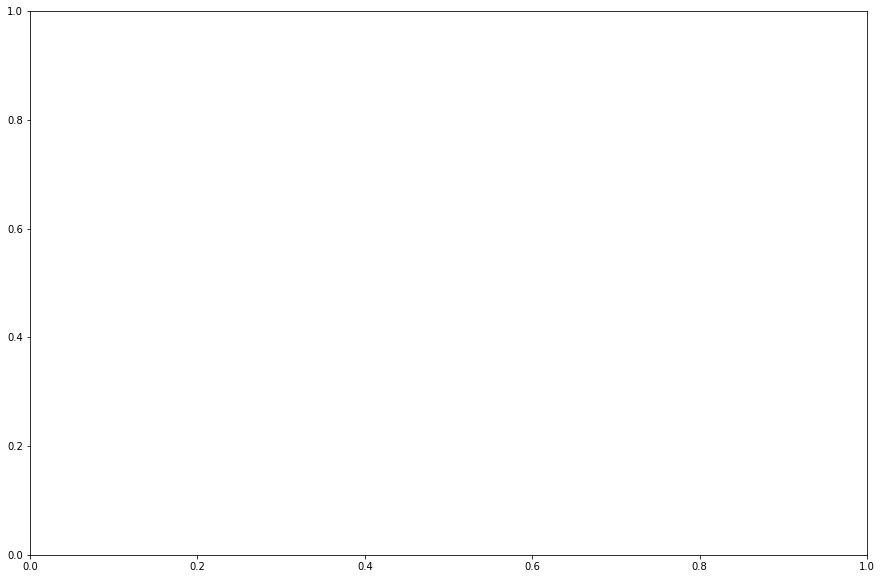

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.2
fig = plt.subplots(figsize =(15, 10))
 
# set height of bar
#resultGoodsperbillp.plot.bar(x="Year", y="Accidents per billion mile")
IT = A["Total_Traffic"]
ECE = B["Total_Traffic"]
CSE = M["Total_Traffic"]
CAR = U["Total_Traffic"]
CAC = C["Total_Traffic"]
# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
 
# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth,
        edgecolor ='grey', label ='Road A')
plt.bar(br2, ECE, color ='g', width = barWidth,
        edgecolor ='grey', label ='Road B')
plt.bar(br3, CSE, color ='b', width = barWidth,
        edgecolor ='grey', label ='Road M')
plt.bar(br4, CAR, color ='y', width = barWidth,
        edgecolor ='grey', label ='Road U')
plt.bar(br5, CAC, width = barWidth,
        edgecolor ='grey', label ='Road C')
 
 
# Adding Xticks
plt.xlabel('Year', fontweight ='bold', fontsize = 15)
plt.ylabel('Traffic', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
        A["year"])
 
plt.legend()
plt.show()


+----+------------------------------+-----------+
|Year|Total accidents of Pedal Cycle|Pedal Cycle|
+----+------------------------------+-----------+
|2005|                         17039|        2.7|
|2006|                         16611|        2.8|
|2007|                         16607|        2.6|
|2008|                         16797|        2.8|
|2009|                         17599|          3|
|2010|                         17811|          3|
|2011|                         19883|        3.1|
|2012|                         19708|        3.1|
|2013|                         20049|        3.1|
|2014|                         21979|        3.5|
|2015|                         19440|        3.2|
|2016|                         19047|        3.2|
|2017|                         18954|        3.3|
|2018|                         18125|        3.3|
|2019|                         17437|        3.5|
+----+------------------------------+-----------+



+----+------------------------------+-----------+--------------------------+
|Year|Total accidents of Pedal Cycle|Pedal Cycle|Accidents per billion mile|
+----+------------------------------+-----------+--------------------------+
|2005|                         17039|        2.7|          6310.74074074074|
|2006|                         16611|        2.8|                    5932.5|
|2007|                         16607|        2.6|         6387.307692307692|
|2008|                         16797|        2.8|         5998.928571428572|
|2009|                         17599|          3|         5866.333333333333|
|2010|                         17811|          3|                    5937.0|
|2011|                         19883|        3.1|         6413.870967741936|
|2012|                         19708|        3.1|         6357.419354838709|
|2013|                         20049|        3.1|         6467.419354838709|
|2014|                         21979|        3.5|         6279.714285714285|

NameError: name 'AT' is not defined

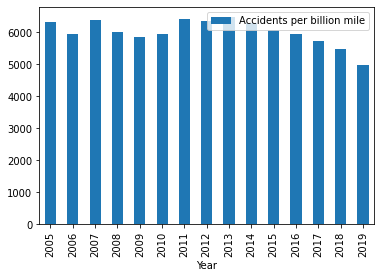

In [98]:
#MotorcycleAccidentovertheyeards_df
Billionvehiclemiles20052017PedalCycle_df=Billionvehiclemiles20052017_df.select(col("Year"),col("Pedal Cycle")).sort("Year")
resultBCperbill=cycleAccidentovertheyeards_df.join(Billionvehiclemiles20052017PedalCycle_df, on=['Year'], how='left_outer').sort('Year')
resultBCperbill.show()
resultBCperbill=resultBCperbill.withColumn('Accidents per billion mile', resultBCperbill[1]/resultBCperbill[2])
resultBCperbill.show()
resultBCperbillmm = resultBCperbill.toPandas()
resultBCperbillmm.plot.bar(x="Year", y="Accidents per billion mile")


ForA=AA.join(AT, on=['Year'], how='left_outer').sort('Year')
ForA=ForA.withColumn('Accidents per Year Traffic probabilty', ForA[2]/ForA[4])

ForA.show()
ForA = ForA.toPandas()
ForA.plot.bar(x="Year", y="Accidents per Year Traffic probabilty")

AA=Accidenteeachyearwrtroad.filter(Accidenteeachyearwrtroad.road_name_new_column.contains("A"))
AT=Trafficeeachyear_df.filter(Trafficeeachyear_df.road_name_new_column.contains("A"))
AA.show()
AT.show()

